## Aims

Time series analysis is aways an interesting topic to me, and the gold price is another one. In this notebook I will analysis the global monthly gold price data during 1970 to 2021. I will first analysis its instincts as a time series, and then try to predict the gold price for the next month by some famous time series prediction methods. After that, I will go further and collect some data from website to dig out what're the factors that will influence the global gold price.


# Table of contents
1. [Load the Data](#dataloading)
2. [EDA](#EDA)
    1. [Single time series EDA](#singleTS)
    2. [Fill in missing value](#fillna)
    3. [Move, Smoothe and Decompose](#move)
    4. [Change](#change)
    5. [Compare two time series](#2TS)
3. [Time Series Features](#TimeSeriesFeatures)
4. [Change Point Detection](#ChangePointDetection)
5. [Spilt the Dataset](#splitdata)
6. [Evaluation Methods](#evaluation)
7. [Time Series Forecasting](#TSForecasting)
    1. [ARIMA](#ARIMA)
    2. [LSTM](#LSTM)
    3. [Prophet](#Prophet)
    4. [Boosting](#Boosting)
8. [Comparison and Summary](#comparison)

In [117]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
from chart_studio import plotly
#import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

## Load the data <a name="dataloading"></a>

In [3]:
initial_data = pd.read_csv("1979-2021.csv", index_col="Date")

In [4]:
initial_data.head()

United States(USD)  Europe(EUR)  Japan(JPY)  United Kingdom(GBP)  \
Date                                                                           
31-01-1979               233.7        144.8     45160.3                117.4   
28-02-1979               251.3        154.6     50209.1                124.2   
30-03-1979               240.1        148.0     50274.3                116.2   
30-04-1979               245.3        152.8     54144.6                118.8   
31-05-1979               274.6        172.0     61057.1                132.7   

            Canada(CAD)  Switzerland(CHF)  India(INR)  China(CNY)  \
Date                                                                
31-01-1979        267.1             379.3      1840.8         NaN   
28-02-1979        295.5             413.6      2011.7         NaN   
30-03-1979        278.2             406.2      1940.2         NaN   
30-04-1979        278.5             420.0      2013.1         NaN   
31-05-1979        321.6             478.0      2253.4         NaN   

            Turkey(TRY)  Saudi Arabia(SAR)  Indonesia(IDR)  \
Date                                                         
31-01-1979          NaN              745.2        139739.3   
28-02-1979          NaN              827.8        154683.1   
30-03-1979          NaN              796.7        148844.2   
30-04-1979          NaN              819.4        152453.6   
31-05-1979          NaN              933.3        171656.1   

            United Arab Emirates(AED)  Thailand(THB)  Vietnam(VND)  \
Date                                                                 
31-01-1979                      856.1         4511.3           NaN   
28-02-1979                      946.6         4985.7           NaN   
30-03-1979                      910.4         4812.9           NaN   
30-04-1979                      930.2         4891.0           NaN   
31-05-1979                     1048.4         5560.8           NaN   

            Egypt(EGP)  South Korean(KRW)  Australia(AUD)  South Africa(ZAR)  
Date                                                                          
31-01-1979         NaN           108235.8           197.2              194.5  
28-02-1979         NaN           119929.3           219.6              209.4  
30-03-1979         NaN           116123.6           214.6              202.4  
30-04-1979         NaN           117423.3           221.1              206.9  
31-05-1979         NaN           133889.6           250.7              233.7

In [5]:
initial_data.describe()

United States(USD)  Europe(EUR)     Japan(JPY)  United Kingdom(GBP)  \
count          511.000000   511.000000     511.000000           511.000000   
mean           693.703914   572.909393   82947.785519           450.144618   
std            473.936956   381.421398   44427.426076           346.745470   
min            233.700000   144.800000   27937.500000           116.200000   
25%            354.200000   306.950000   43095.750000           218.400000   
50%            415.100000   364.100000   70455.900000           256.400000   
75%           1166.650000   929.250000  124847.450000           742.150000   
max           1964.900000  1661.700000  207845.000000          1497.100000   

       Canada(CAD)  Switzerland(CHF)     India(INR)    China(CNY)  \
count   511.000000        511.000000     511.000000    439.000000   
mean    843.504110        826.123288   33124.286301   4883.284510   
std     546.995978        365.533745   36068.222143   3298.648486   
min     267.100000        379.300000    1840.800000    821.100000   
25%     454.300000        501.650000    6273.750000   2171.350000   
50%     532.300000        698.200000   13027.200000   3287.800000   
75%    1326.950000       1126.950000   61884.750000   7991.050000   
max    2632.000000       1787.500000  146999.100000  13714.000000   

        Turkey(TRY)  Saudi Arabia(SAR)  Indonesia(IDR)  \
count    464.000000         511.000000    5.110000e+02   
mean    1739.875862        2580.532290    6.207427e+06   
std     3058.649089        1789.369815    7.326262e+06   
min        0.100000         745.200000    1.397393e+05   
25%        2.475000        1311.350000    6.979736e+05   
50%      446.050000        1502.600000    2.536803e+06   
75%     2595.025000        4375.950000    1.202164e+07   
max    16105.400000        7369.200000    2.868754e+07   

       United Arab Emirates(AED)  Thailand(THB)  Vietnam(VND)    Egypt(EGP)  \
count                 511.000000     511.000000  3.800000e+02    392.000000   
mean                 2549.201370   21659.532681  1.512633e+07   6759.577551   
std                  1740.398752   15607.655346  1.276571e+07   8061.721765   
min                   856.100000    4511.300000  1.571728e+06    870.100000   
25%                  1297.550000    9612.400000  4.090357e+06   1176.125000   
50%                  1528.900000   12140.500000  7.502084e+06   2578.900000   
75%                  4285.000000   38774.350000  2.754781e+07   9149.475000   
max                  7217.400000   61270.500000  4.553950e+07  31379.500000   

       South Korean(KRW)  Australia(AUD)  South Africa(ZAR)  
count       5.110000e+02      511.000000         511.000000  
mean        7.176915e+05      869.875342        5950.795108  
std         5.795862e+05      573.937496        7352.362603  
min         1.082358e+05      197.200000         194.500000  
25%         3.012518e+05      474.550000         972.500000  
50%         3.749796e+05      554.100000        1864.700000  
75%         1.304939e+06     1372.600000        9549.350000  
max         2.340982e+06     2739.900000       33459.800000

In [6]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 31-01-1979 to 30-07-2021
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   United States(USD)         511 non-null    float64
 1   Europe(EUR)                511 non-null    float64
 2   Japan(JPY)                 511 non-null    float64
 3   United Kingdom(GBP)        511 non-null    float64
 4   Canada(CAD)                511 non-null    float64
 5   Switzerland(CHF)           511 non-null    float64
 6   India(INR)                 511 non-null    float64
 7   China(CNY)                 439 non-null    float64
 8   Turkey(TRY)                464 non-null    float64
 9   Saudi Arabia(SAR)          511 non-null    float64
 10  Indonesia(IDR)             511 non-null    float64
 11  United Arab Emirates(AED)  511 non-null    float64
 12  Thailand(THB)              511 non-null    float64
 13  Vietnam(VND)               380 non-null

In [7]:
print("The size of the initial data is", initial_data.shape)
print("The gold price starts from", initial_data.index[0])
print("And it ends at", initial_data.index[-1])

The size of the initial data is (511, 18)
The gold price starts from 31-01-1979
And it ends at 30-07-2021


### At the first glance
1. There are monthly gold price data for 18 contries during 1979 to 2021. The size of the data is 511*19
2. Some countries's gold price has missing values, such as China and Turkey.

## EDA <a name="EDA"></a>

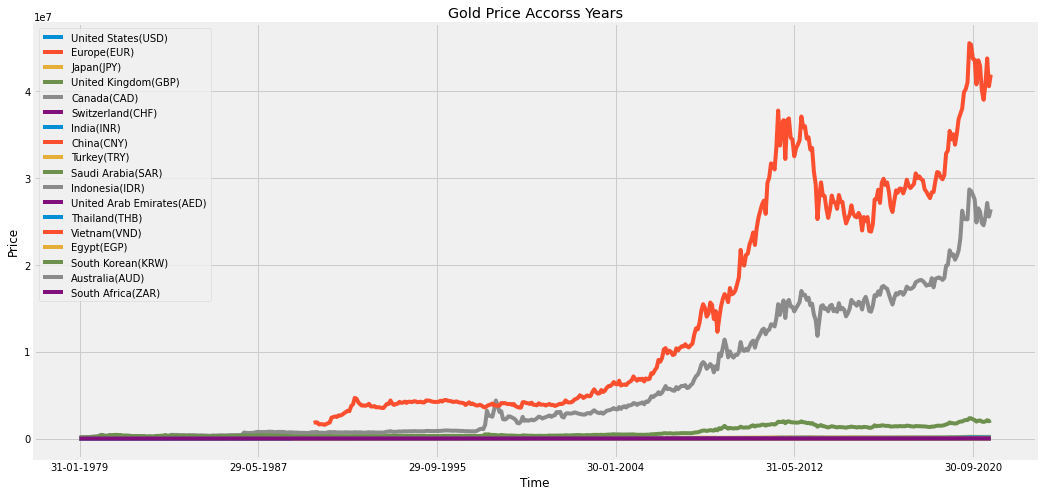

In [8]:
#plt.plot(initial_data)
initial_data.plot(figsize=(16,8))
plt.title('Gold Price Accorss Years')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [9]:
pd.options.plotting.backend = "plotly"

fig = initial_data.plot.line()
fig.show()

Since the gold price is in respective currencies for each country, the value varies a lot and hard to illustrate with the same scale. In the upper figure, we can see the gold price of Vietnam can be closed to 1e7, then some other countries' change accross years cannot be see.  

In [10]:
current_price = initial_data.tail(1)

In [11]:
current_price

United States(USD)  Europe(EUR)  Japan(JPY)  United Kingdom(GBP)  \
Date                                                                           
30-07-2021              1825.8       1539.7    200376.1               1313.2   

            Canada(CAD)  Switzerland(CHF)  India(INR)  China(CNY)  \
Date                                                                
30-07-2021       2279.2            1654.7    135863.2     11787.6   

            Turkey(TRY)  Saudi Arabia(SAR)  Indonesia(IDR)  \
Date                                                         
30-07-2021      15376.5             6847.3      26404909.4   

            United Arab Emirates(AED)  Thailand(THB)  Vietnam(VND)  \
Date                                                                 
30-07-2021                     6706.3        60007.8    41910091.3   

            Egypt(EGP)  South Korean(KRW)  Australia(AUD)  South Africa(ZAR)  
Date                                                                          
30-07-2021     28673.4          2100068.9          2483.8            26708.4

In [12]:
#import plotly.plotly as pl
import plotly.graph_objs as gobj
import pandas as pd
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [13]:
#initializing the data variable
data = dict(type = 'choropleth',
            locations = ['United States','French','Japan','United Kingdom','Canada',
                         'Switzerland','India','China', 'Turkey', 'Saudi Arabia',
                        'Indonesia', 'United Arab Emirates', 'Thailand', 'Vietnam',
                        'Egypt', 'South Korean', 'Australia', 'South Africa'],
            locationmode = 'country names',
            colorscale= 'Portland',
            #text= ['IND','NEP','CHI','PAK','BAN','BHU', 'MYN','SLK'],
            z=current_price.iloc[0].values.tolist(),
            colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' })

In [14]:
current_price.iloc[0].values.tolist()

[1825.8,
 1539.7,
 200376.1,
 1313.2,
 2279.2,
 1654.7,
 135863.2,
 11787.6,
 15376.5,
 6847.3,
 26404909.4,
 6706.3,
 60007.8,
 41910091.3,
 28673.4,
 2100068.9,
 2483.8,
 26708.4]

In [15]:
#initializing the layout variable
layout = dict(geo = {'scope':'world'})
# Initializing the Figure object by passing data and layout as arguments.
col_map = go.Figure(data = [data],layout = layout)

In [16]:
#plotting the map
iplot(col_map)

From the first glance of the whole data, we found the gold price varies a lot among different countries due to the different value of the country's currency. Therefore, let's focus on the single time series EDA.

### Single time series EDA <a name="singleTS"></a>

No handles with labels found to put in legend.


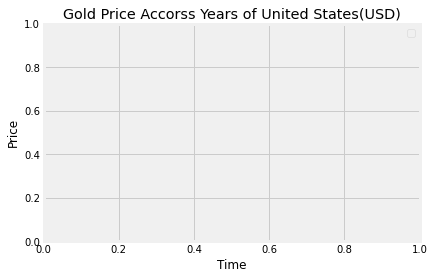

No handles with labels found to put in legend.


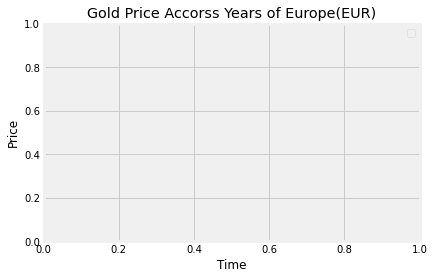

No handles with labels found to put in legend.


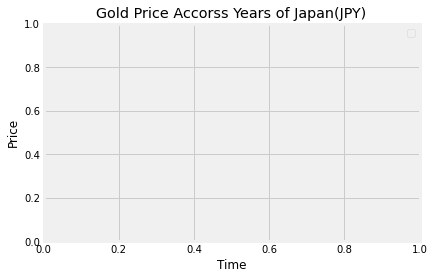

No handles with labels found to put in legend.


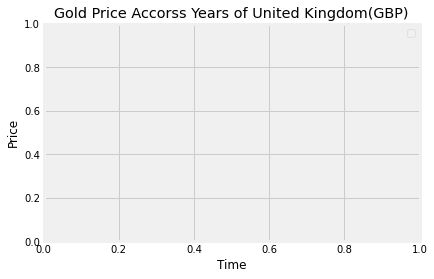

No handles with labels found to put in legend.


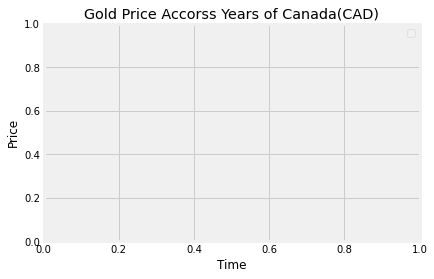

No handles with labels found to put in legend.


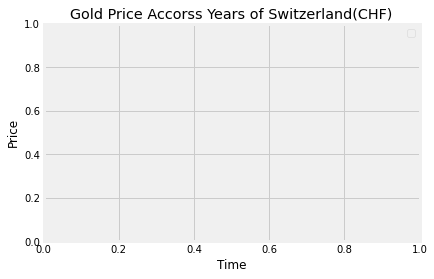

No handles with labels found to put in legend.


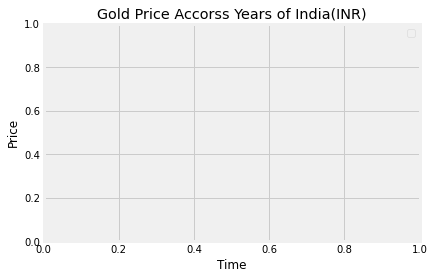

No handles with labels found to put in legend.


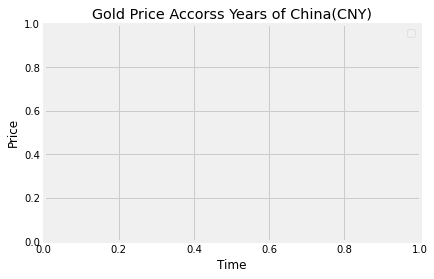

No handles with labels found to put in legend.


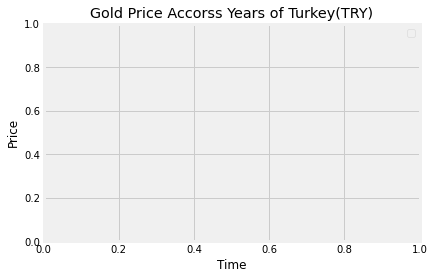

No handles with labels found to put in legend.


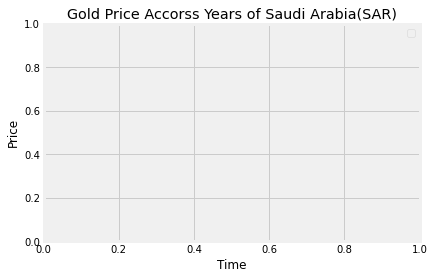

No handles with labels found to put in legend.


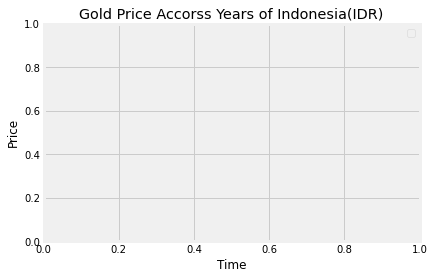

No handles with labels found to put in legend.


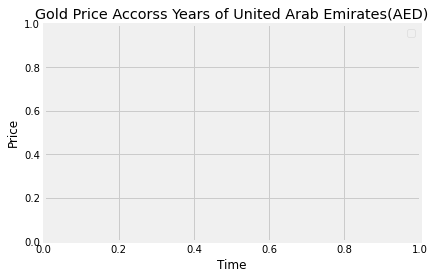

No handles with labels found to put in legend.


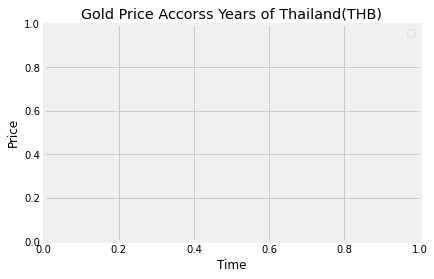

No handles with labels found to put in legend.


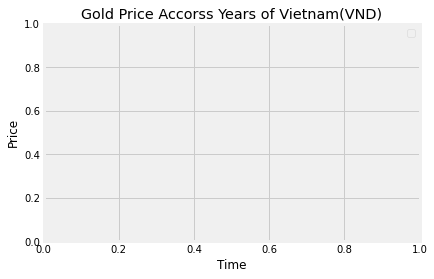

No handles with labels found to put in legend.


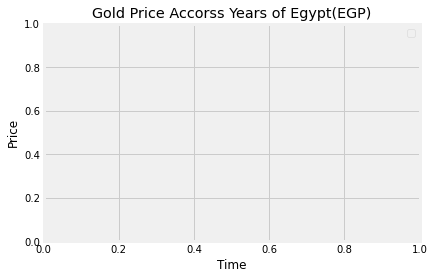

No handles with labels found to put in legend.


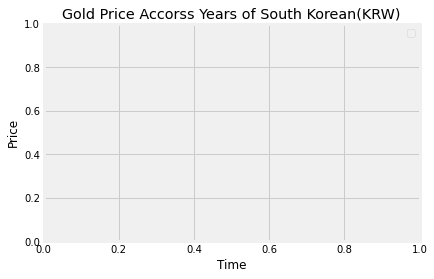

No handles with labels found to put in legend.


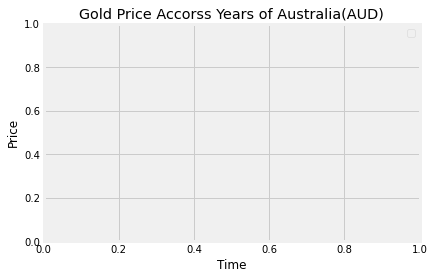

No handles with labels found to put in legend.


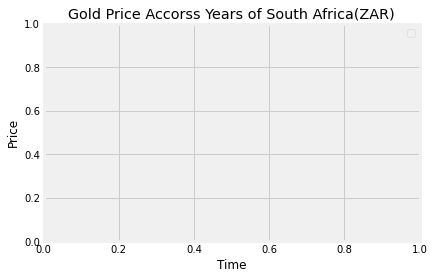

In [17]:
for col in initial_data.columns:
    #initial_data[col].plot(figsize=(12,4))
    initial_data[col].plot()
    plt.title('Gold Price Accorss Years of ' + col)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

From the plots we can see the gold price in most countries have a similiar trend: they have a general increasing trend from the begining of 1979 til now. First is a slight and stable increase accorss years, then started to increase significantly in 2004 and reached to a peak in 2012, then following a small falling back in 2013, and finally increasing again and recently attain to a new peak.

In [18]:
initial_data.index=pd.to_datetime(initial_data.index)
initial_data['United States(USD)'].asfreq("Y").plot()

### Fill in missing value <a name="fillna"></a>

In [19]:
gold_price = initial_data.fillna(method='bfill') 

In [20]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 511 entries, 1979-01-31 to 2021-07-30
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   United States(USD)         511 non-null    float64
 1   Europe(EUR)                511 non-null    float64
 2   Japan(JPY)                 511 non-null    float64
 3   United Kingdom(GBP)        511 non-null    float64
 4   Canada(CAD)                511 non-null    float64
 5   Switzerland(CHF)           511 non-null    float64
 6   India(INR)                 511 non-null    float64
 7   China(CNY)                 511 non-null    float64
 8   Turkey(TRY)                511 non-null    float64
 9   Saudi Arabia(SAR)          511 non-null    float64
 10  Indonesia(IDR)             511 non-null    float64
 11  United Arab Emirates(AED)  511 non-null    float64
 12  Thailand(THB)              511 non-null    float64
 13  Vietnam(VND)               511 

### Move, Smoothe and Decompose <a name="move"></a>

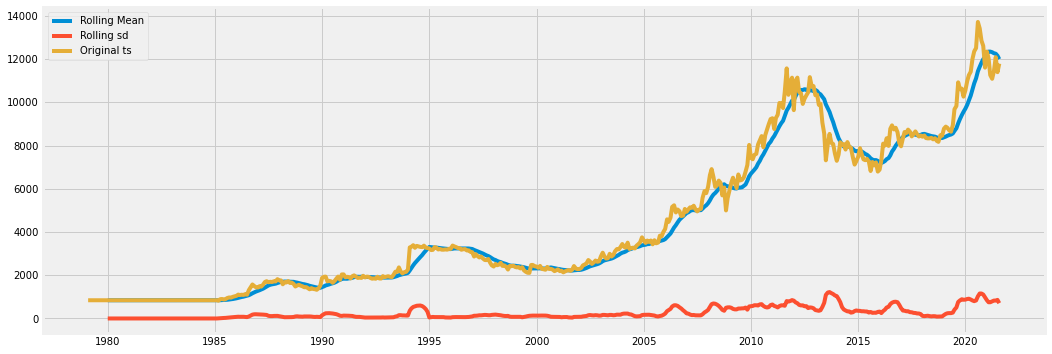

In [21]:
plt.figure(figsize=(16,6))
plt.plot(gold_price['China(CNY)'].rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(gold_price['China(CNY)'].rolling(window=12,center=False).std(),label='Rolling sd');
plt.plot(gold_price['China(CNY)'],label='Original ts');
plt.legend();

The gold price of China shows a general trend over years, and attains a small peak at 2012. The noise around trend is stable, while the variation become a small larger after 2008. 

<Figure size 1152x864 with 0 Axes>

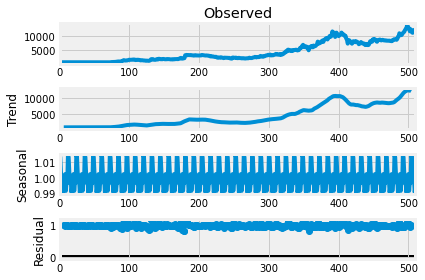

In [22]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(gold_price['China(CNY)'].values,freq=12,model="multiplicative")
plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

<Figure size 1152x864 with 0 Axes>

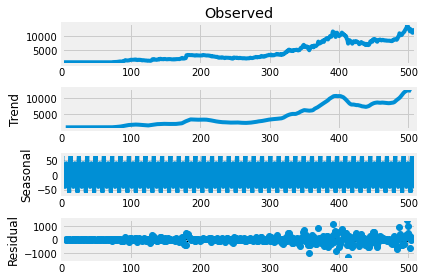

In [23]:
# additive
res = sm.tsa.seasonal_decompose(gold_price['China(CNY)'].values,freq=12,model="additive")
plt.figure(figsize=(16,12))
fig = res.plot()

I tried both additive and multiplicative decomposion of time series, and get the similiar result. The trend feature is consistent with the conclusion we get from moving average. One the other side, we didn't see too much seasonility about the gold price time series.

### change <a name="change"></a>

In [24]:
#precentage change
precent_change = gold_price['China(CNY)'].div(gold_price['China(CNY)'].shift())
precent_change.plot()

In [25]:
# Absolute change
abs_change = gold_price['China(CNY)'] - gold_price['China(CNY)'].shift()
abs_change.plot()

By visulaize the relative change and absolute change, we can find a spike of change around 1994, which may be a change point and hard to find just from the original curve. Will verify this finding in the change point detection section. 

### Compare two time series <a name="2TS"></a>


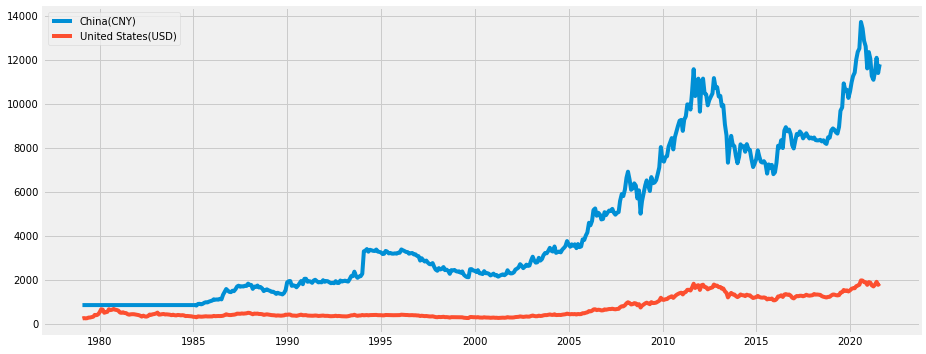

In [26]:
# Plotting before normalization
plt.figure(figsize=(14,6))
plt.plot(gold_price['China(CNY)'])
plt.plot(gold_price['United States(USD)'])
plt.legend(['China(CNY)','United States(USD)'])
plt.show()

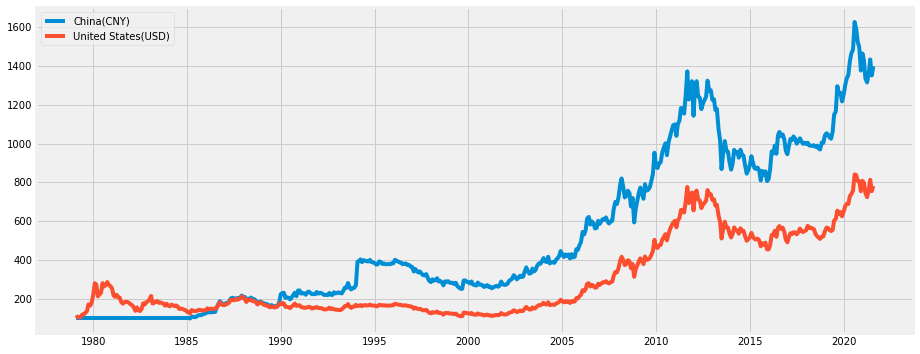

In [27]:
# Normalizing and comparison

normalized_china = gold_price['China(CNY)'].div(gold_price['China(CNY)'].iloc[0]).mul(100)
normalized_US = gold_price['United States(USD)'].div(gold_price['United States(USD)'].iloc[0]).mul(100)

plt.figure(figsize=(14,6))
plt.plot(normalized_china)
plt.plot(normalized_US)
plt.legend(['China(CNY)','United States(USD)'])
plt.show()

After normalization, we can see the gold price of China and US share the samiliar trend. Then I will try for all countries.

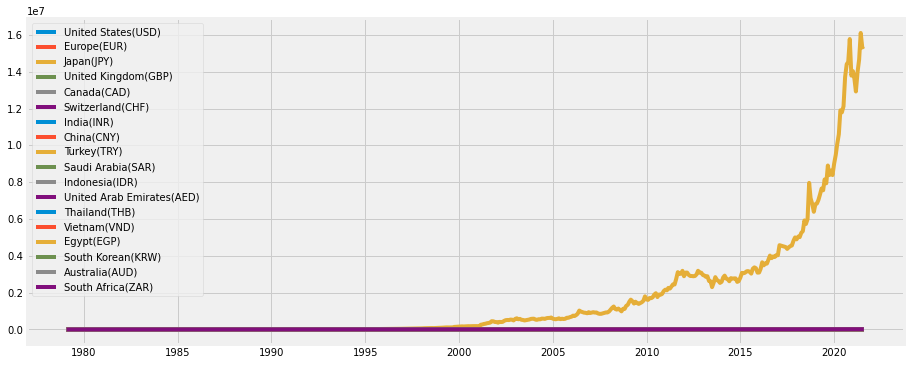

In [28]:
plt.figure(figsize=(14,6))
for col in initial_data.columns:
    normalized_col = gold_price[col].div(gold_price[col].iloc[0]).mul(100)
    plt.plot(normalized_col)
plt.legend(initial_data.columns)
plt.show()

Except Turkey, we can's see any trend of other countires. This is consisent with the crash of TRY. In advance, I delete the col of Turkey and draw the curve again.

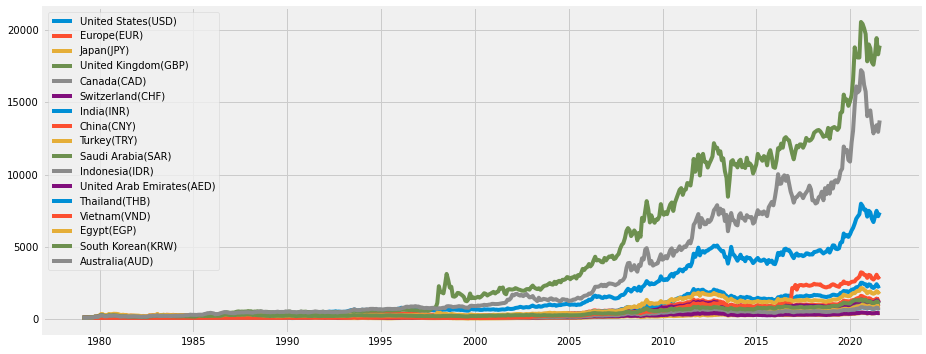

In [29]:
plt.figure(figsize=(14,6))
for col in initial_data.columns:
    if col == "Turkey(TRY)":
        continue
    normalized_col = gold_price[col].div(gold_price[col].iloc[0]).mul(100)
    plt.plot(normalized_col)
plt.legend(initial_data.columns)
plt.show()

For the later work of time series analysis, I will use a very potential new Python package Kats.

## Time Series Features<a name="TimeSeriesFeatures"></a>

In [30]:
# Using package
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute, make_forecasting_frame
from tsfresh.feature_extraction import ComprehensiveFCParameters, settings

In [31]:
gold_price_melt = pd.melt(gold_price, ignore_index=False)
gold_price_melt = gold_price_melt.reset_index()
gold_price_melt.head()

Date            variable  value
0 1979-01-31  United States(USD)  233.7
1 1979-02-28  United States(USD)  251.3
2 1979-03-30  United States(USD)  240.1
3 1979-04-30  United States(USD)  245.3
4 1979-05-31  United States(USD)  274.6

In [32]:
gold_price_melt.head()

Date            variable  value
0 1979-01-31  United States(USD)  233.7
1 1979-02-28  United States(USD)  251.3
2 1979-03-30  United States(USD)  240.1
3 1979-04-30  United States(USD)  245.3
4 1979-05-31  United States(USD)  274.6

In [33]:
# Getting Comprehensive Features
df_features = extract_features(gold_price_melt, column_id="variable", column_sort="Date", column_kind=None, column_value=None)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.70it/s]


In [34]:
df_features


value__variance_larger_than_standard_deviation  \
Australia(AUD)                                                        1.0   
Canada(CAD)                                                           1.0   
China(CNY)                                                            1.0   
Egypt(EGP)                                                            1.0   
Europe(EUR)                                                           1.0   
India(INR)                                                            1.0   
Indonesia(IDR)                                                        1.0   
Japan(JPY)                                                            1.0   
Saudi Arabia(SAR)                                                     1.0   
South Africa(ZAR)                                                     1.0   
South Korean(KRW)                                                     1.0   
Switzerland(CHF)                                                      1.0   
Thailand(THB)                                                         1.0   
Turkey(TRY)                                                           1.0   
United Arab Emirates(AED)                                             1.0   
United Kingdom(GBP)                                                   1.0   
United States(USD)                                                    1.0   
Vietnam(VND)                                                          1.0   

                           value__has_duplicate_max  value__has_duplicate_min  \
Australia(AUD)                                  0.0                       0.0   
Canada(CAD)                                     0.0                       0.0   
China(CNY)                                      0.0                       0.0   
Egypt(EGP)                                      0.0                       0.0   
Europe(EUR)                                     0.0                       0.0   
India(INR)                                      0.0                       0.0   
Indonesia(IDR)                                  0.0                       0.0   
Japan(JPY)                                      0.0                       0.0   
Saudi Arabia(SAR)                               0.0                       0.0   
South Africa(ZAR)                               0.0                       0.0   
South Korean(KRW)                               0.0                       0.0   
Switzerland(CHF)                                0.0                       0.0   
Thailand(THB)                                   0.0                       0.0   
Turkey(TRY)                                     0.0                       1.0   
United Arab Emirates(AED)                       0.0                       0.0   
United Kingdom(GBP)                             0.0                       0.0   
United States(USD)                              0.0                       0.0   
Vietnam(VND)                                    0.0                       0.0   

                           value__has_duplicate  value__sum_values  \
Australia(AUD)                              1.0       4.445063e+05   
Canada(CAD)                                 1.0       4.310306e+05   
China(CNY)                                  1.0       2.204429e+06   
Egypt(EGP)                                  1.0       2.764744e+06   
Europe(EUR)                                 1.0       2.927567e+05   
India(INR)                                  0.0       1.692651e+07   
Indonesia(IDR)                              0.0       3.171995e+09   
Japan(JPY)                                  1.0       4.238632e+07   
Saudi Arabia(SAR)                           1.0       1.318652e+06   
South Africa(ZAR)                           1.0       3.040856e+06   
South Korean(KRW)                           0.0       3.667404e+08   
Switzerland(CHF)                            1.0       4.221490e+05   
Thailand(THB)                               1.0       1.106802e+07   
Turkey(TRY)                                

In [35]:
from tsfresh.examples import load_robot_execution_failures
from tsfresh import extract_features
df, _ = load_robot_execution_failures()
X = extract_features(df, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.20it/s]


## Change Point Detection<a name="ChangePointDetection"></a>

In [36]:
from changefinder import ChangeFinder, ChangeFinderARIMA

In [37]:
def changeFinderALLData(data, r, order, smooth):
    cf = ChangeFinder(r=r, order=order, smooth=smooth)
    scores = [cf.update(p) for p in data]
    return scores

In [38]:
cpd_data = []
for col in gold_price.columns:
    cpd = changeFinderALLData(gold_price[col].values, r=0.01, order=2, smooth=5)
    cpd_data.append(cpd)
    
cpd_gold_price = pd.DataFrame(np.array(cpd_data).T, columns=gold_price.columns)

In [39]:
cpd_gold_price['date'] = gold_price.index
cpd_gold_price.set_index('date', inplace=True)
cpd_gold_price.index

DatetimeIndex(['1979-01-31', '1979-02-28', '1979-03-30', '1979-04-30',
               '1979-05-31', '1979-06-29', '1979-07-31', '1979-08-31',
               '1979-09-28', '1979-10-31',
               ...
               '2020-10-30', '2020-11-30', '2020-12-31', '2021-01-29',
               '2021-02-26', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-30'],
              dtype='datetime64[ns]', name='date', length=511, freq=None)

In [40]:
pd.options.plotting.backend = "plotly"

fig = cpd_gold_price.plot.line()
fig.show()

In [41]:
def plot_anomaly_score_low_higt(datascore, data):
    datascore_ = np.array(datascore)
    from scipy import stats
    datascore_ = stats.describe(datascore)
    
    datascore_ = pd.DataFrame(datascore, columns=['Score'])

    delta = np.percentile(datascore, 75)
    print('Threashold ',delta)

    plt.figure(figsize=(16,6))
    plt.plot(data)
    plt.title("data count")        

    plt.figure(figsize=(16,6))
    plt.plot(datascore)
    plt.title("data count")        

    
    plt.figure(figsize=(16,6))
    df_high_data_ = datascore_[datascore_ <= delta]
    df_high_score_ = datascore_[datascore_ > delta]
    
    plt.plot(datascore_.index, datascore_.Score.fillna(1), c='gray', alpha=0.4)
    plt.scatter(df_high_data_.index, df_high_data_.values, label='Inline', s=10)
    plt.scatter(df_high_score_.index, df_high_score_.values, label='Outlier', c='red', s=10)
    plt.margins(x=0.01,y=0.2)
    plt.title('Anomaly Score ')
    plt.ylabel('Score')
    plt.xlabel('Data Count')
    plt.legend()
    plt.show()

Threashold  14.486198587575208


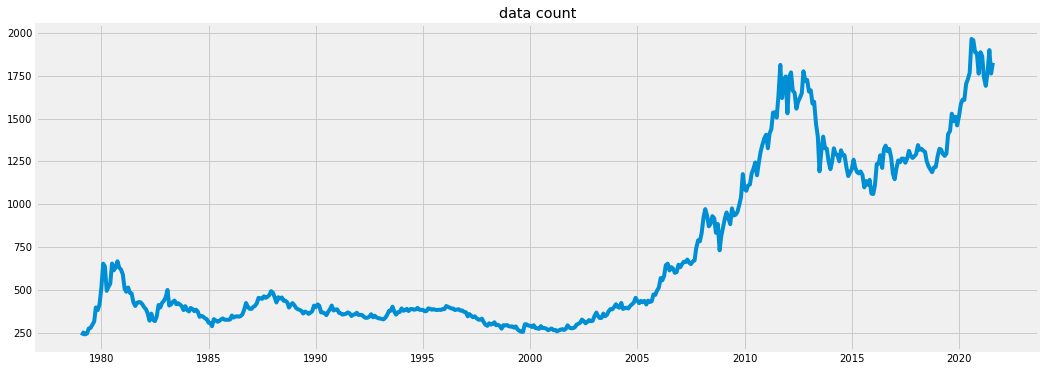

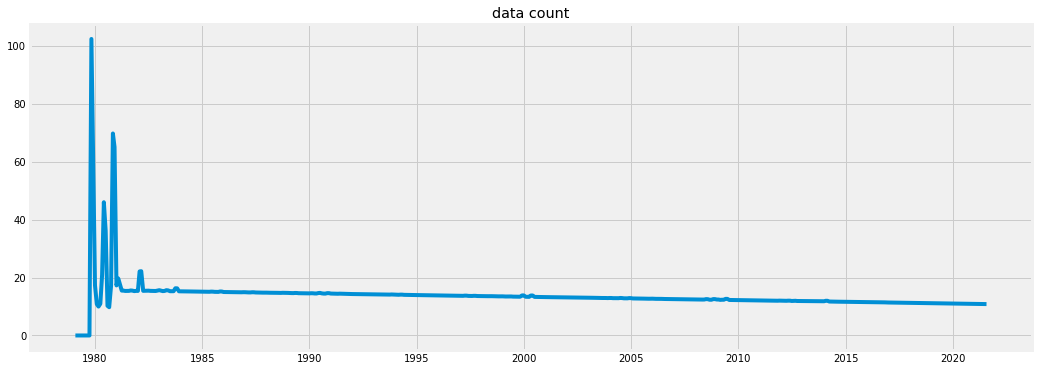

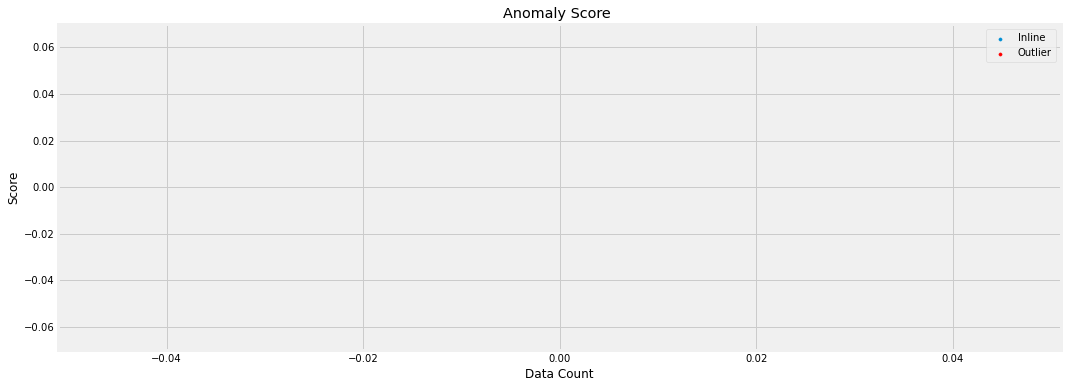

Threashold  15.77514537467613


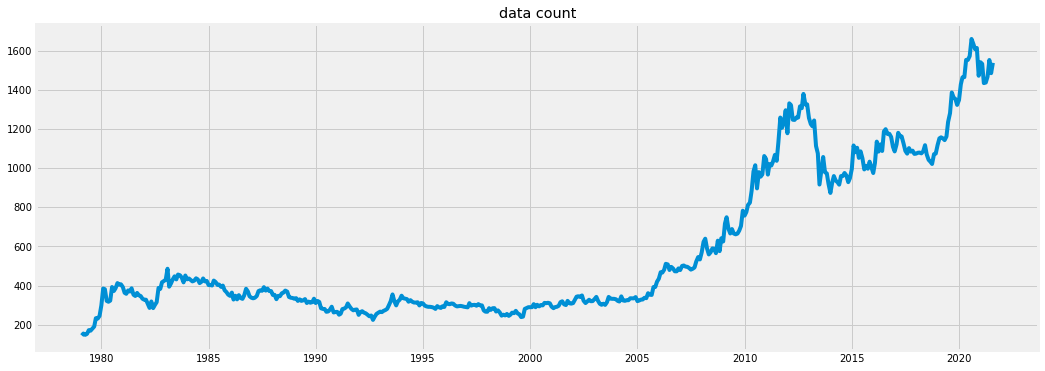

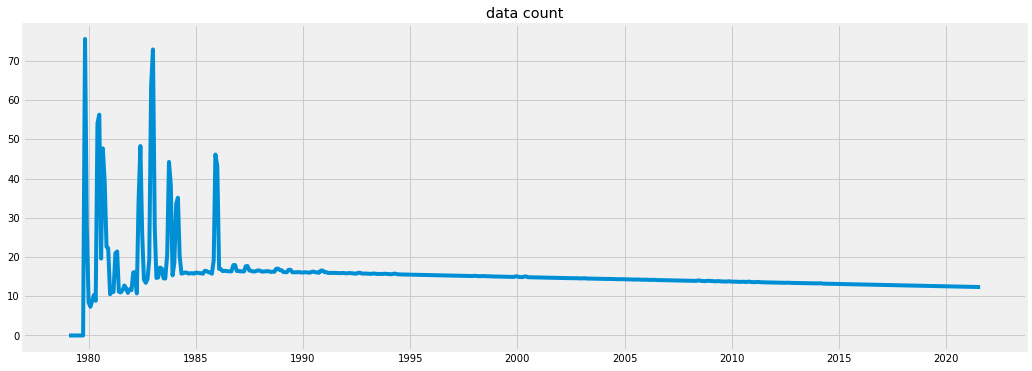

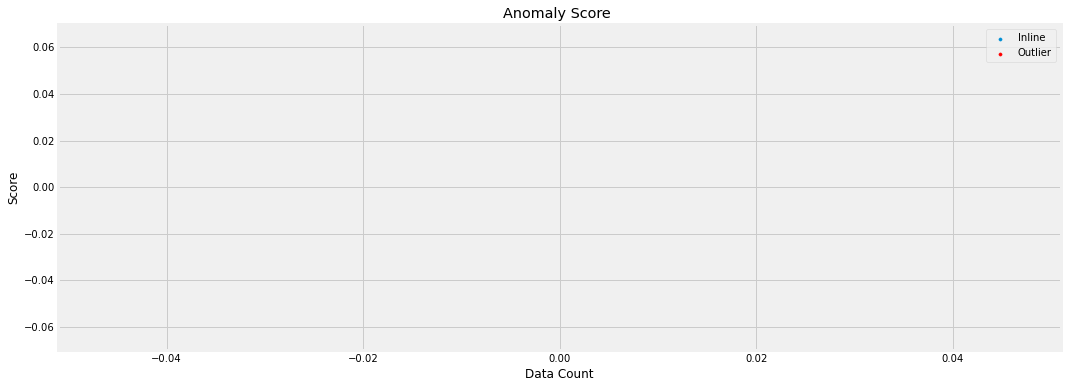

Threashold  20.01490587264167


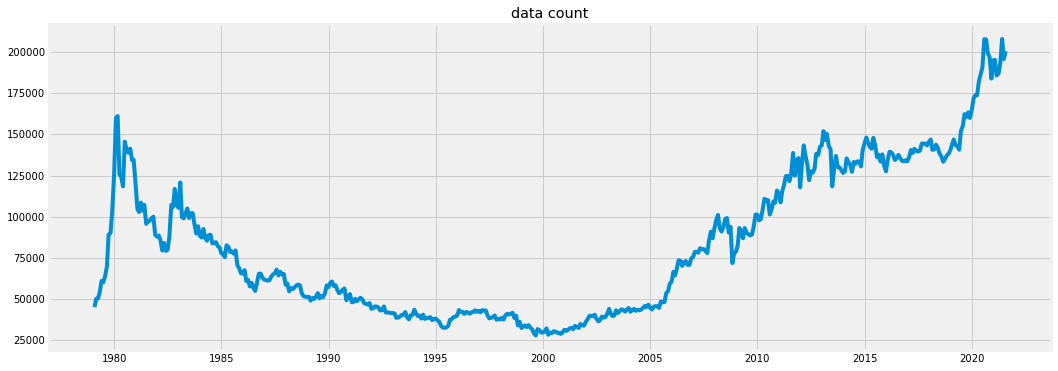

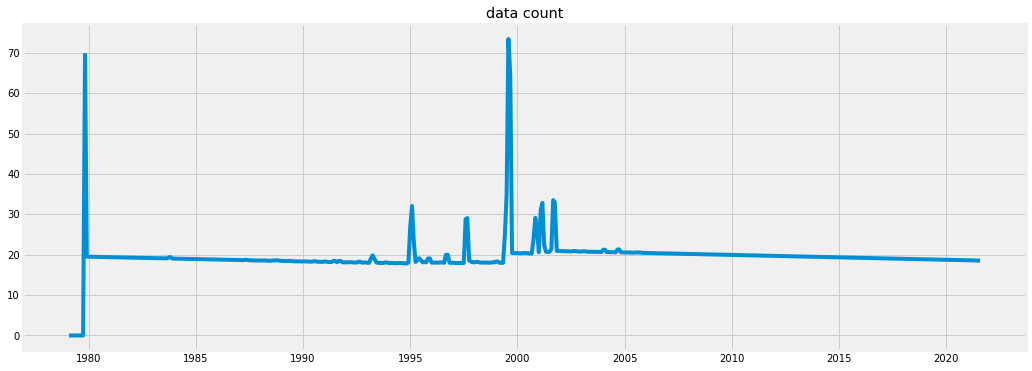

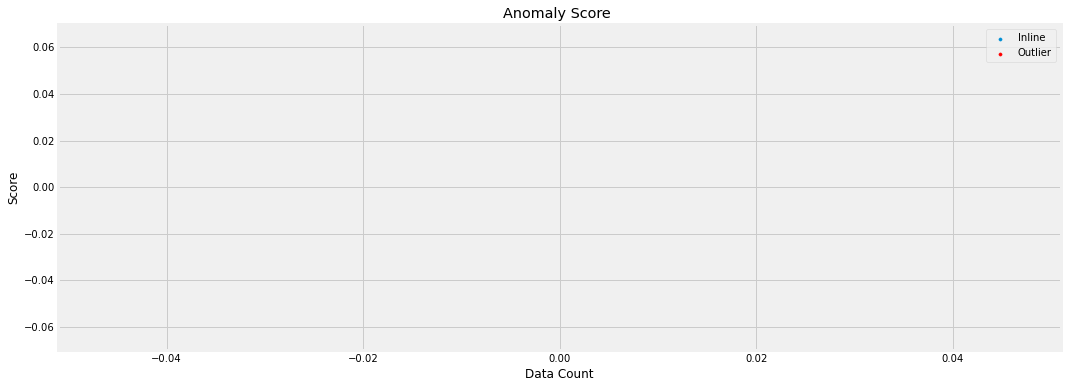

Threashold  10.970464915222081


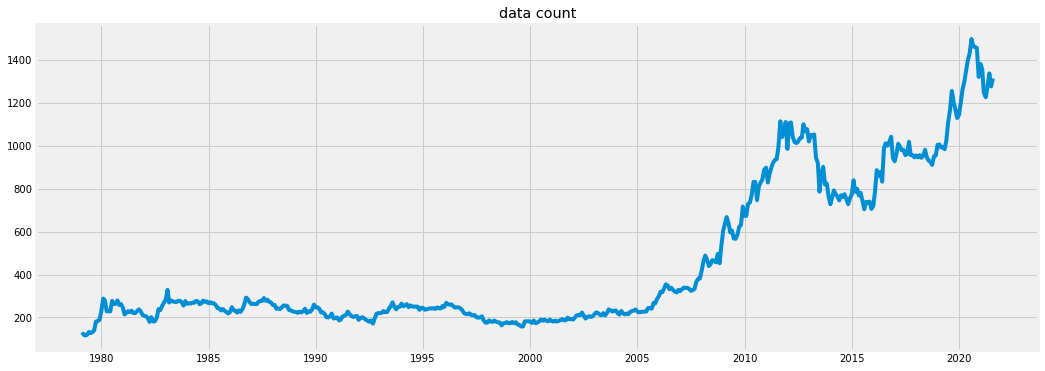

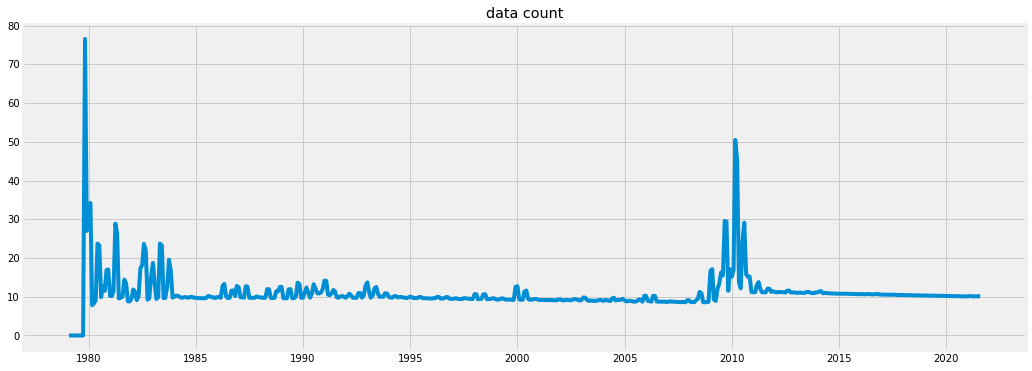

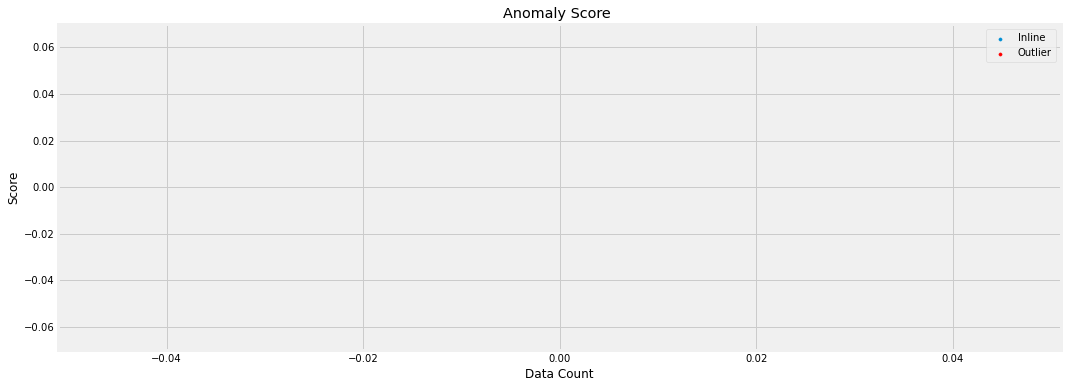

Threashold  17.30108479405897


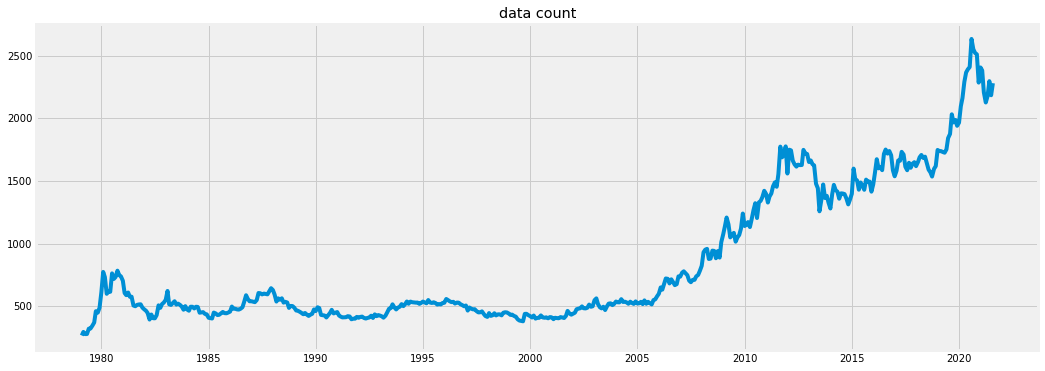

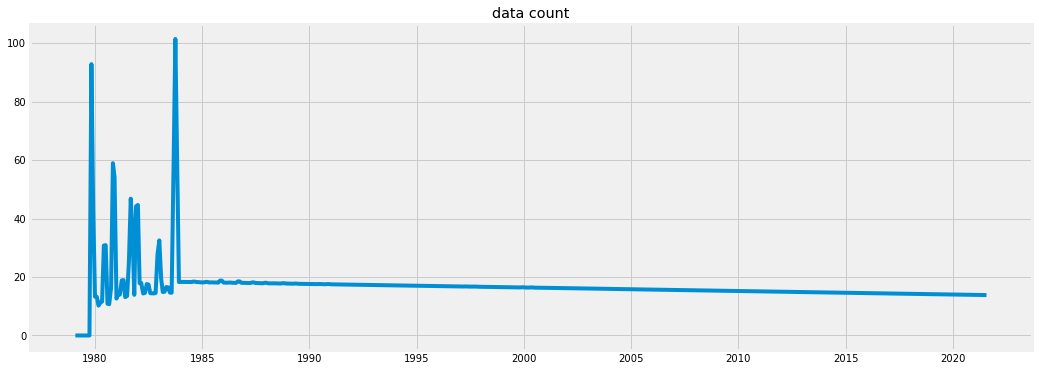

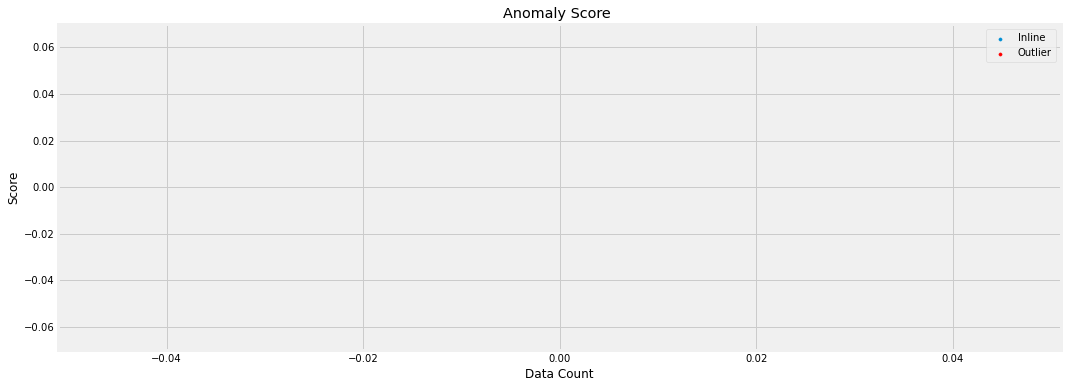

Threashold  13.432138816056007


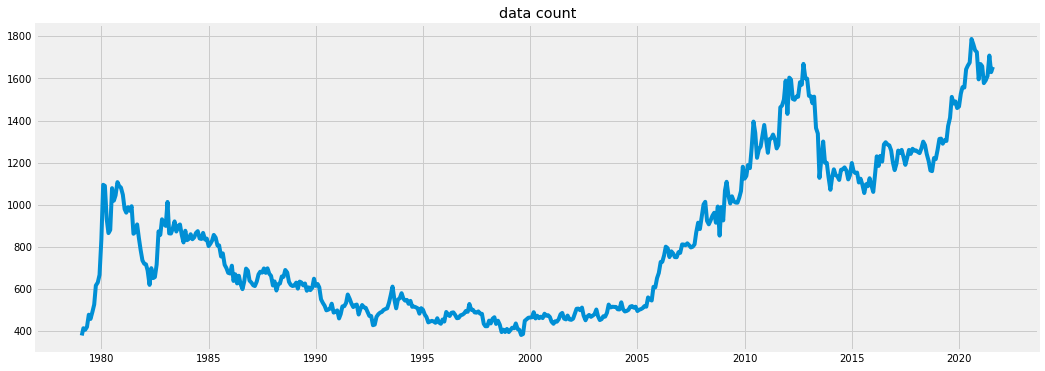

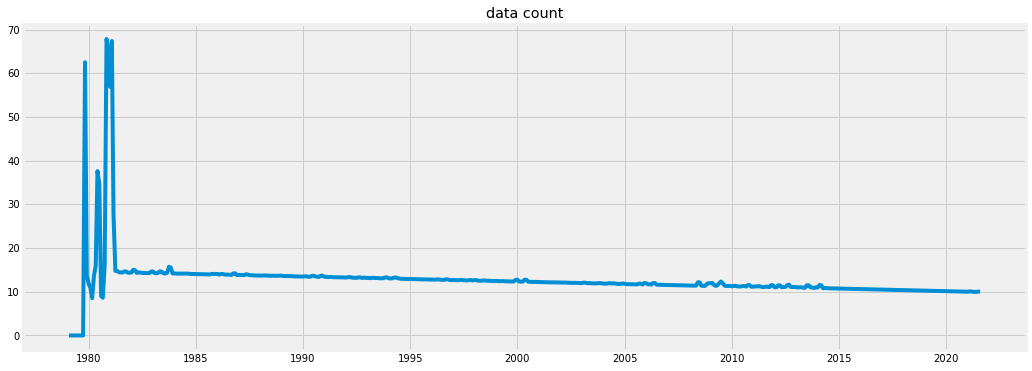

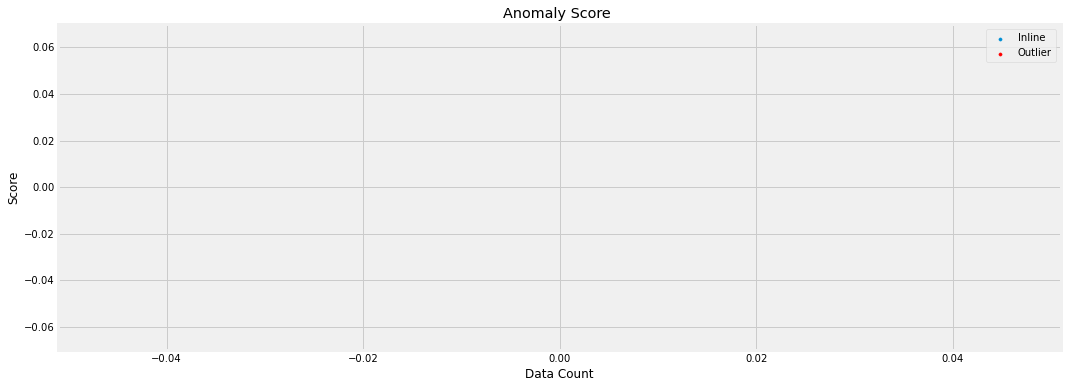

Threashold  15.928192052308397


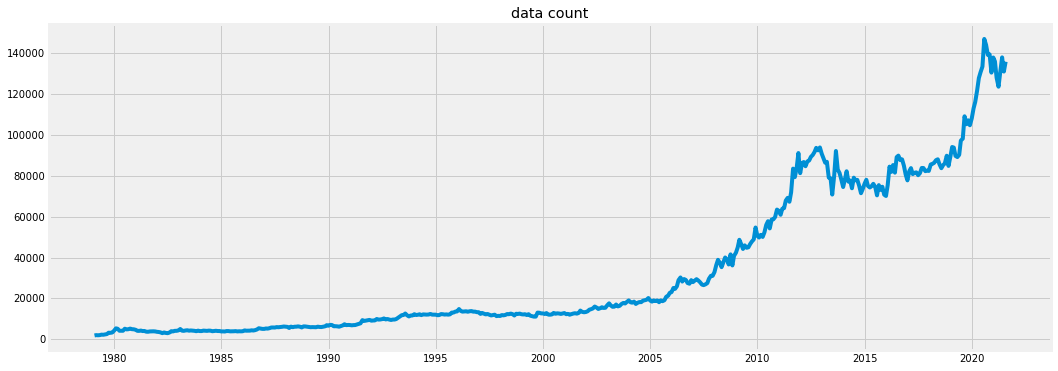

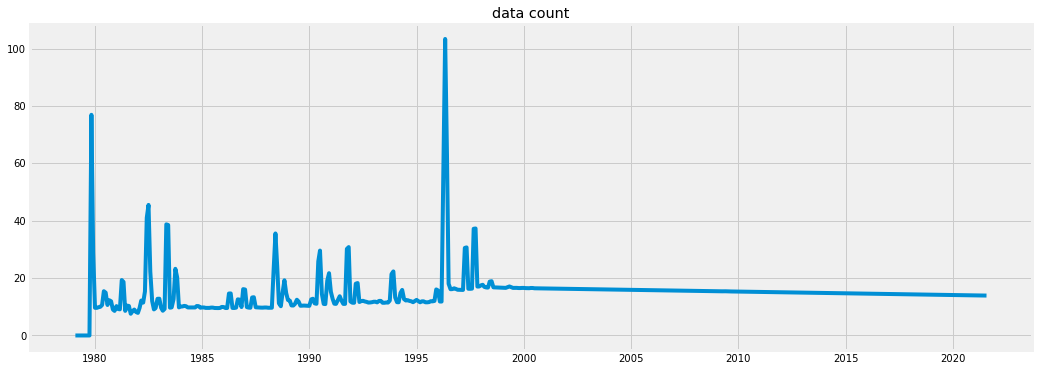

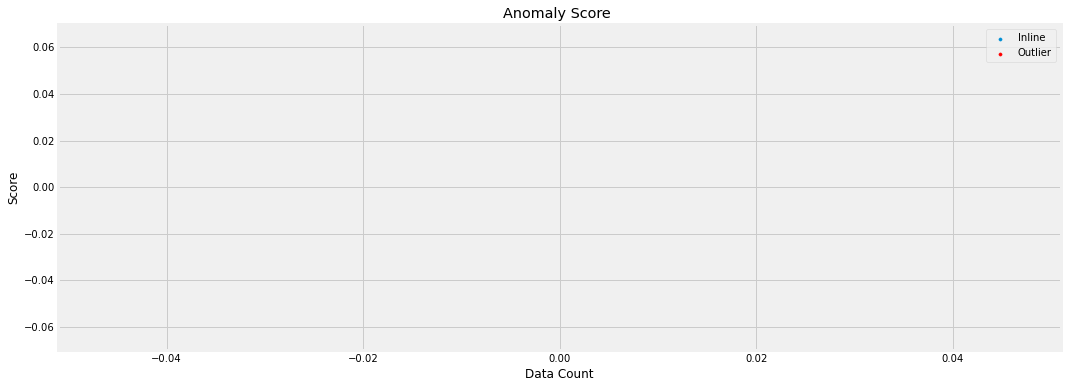

Threashold  nan


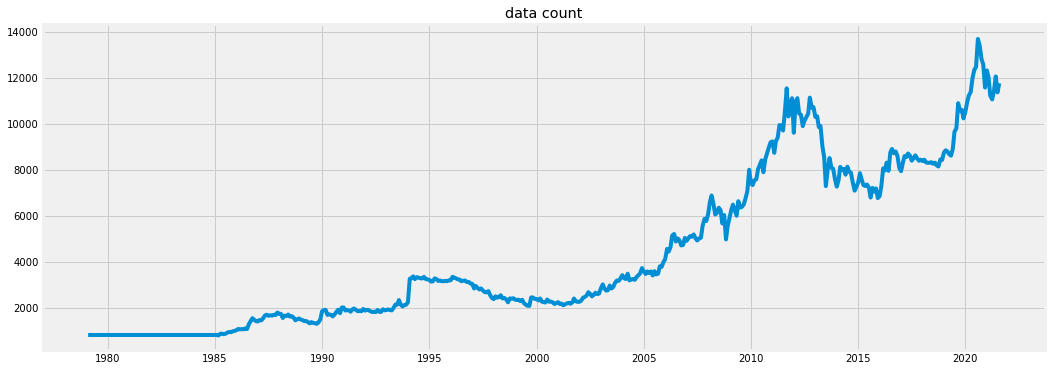

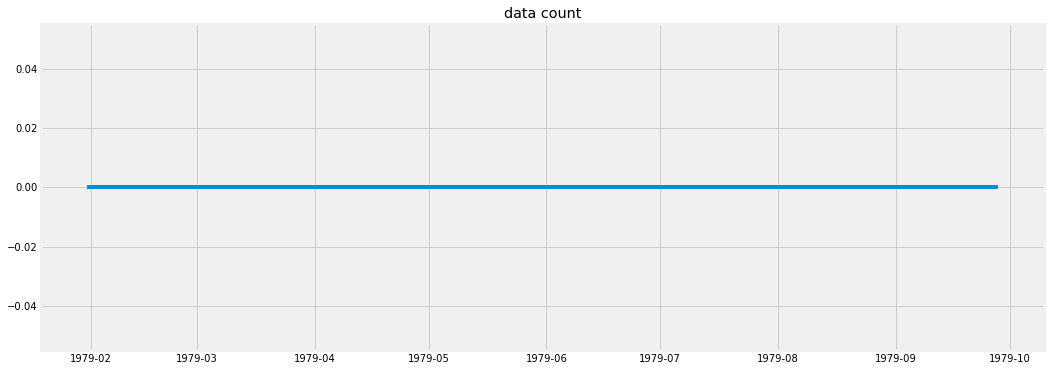

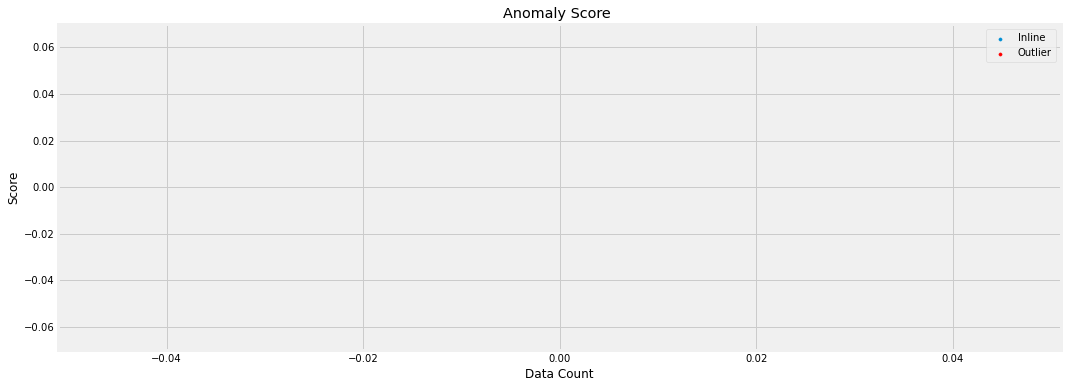

Threashold  nan


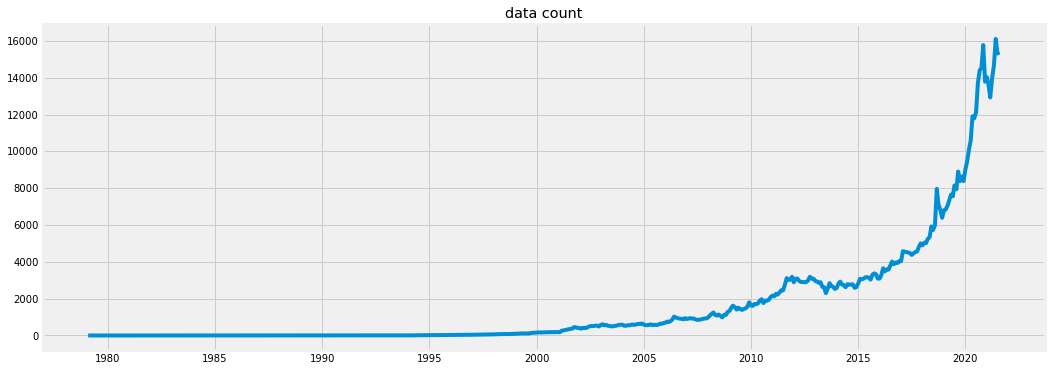

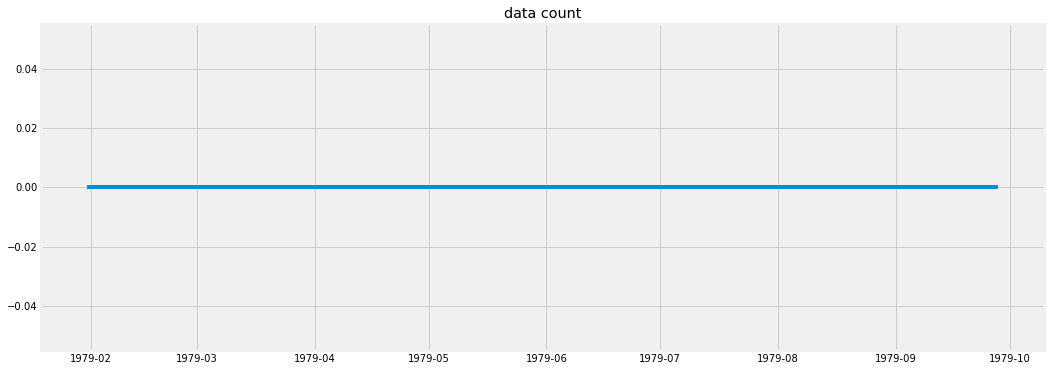

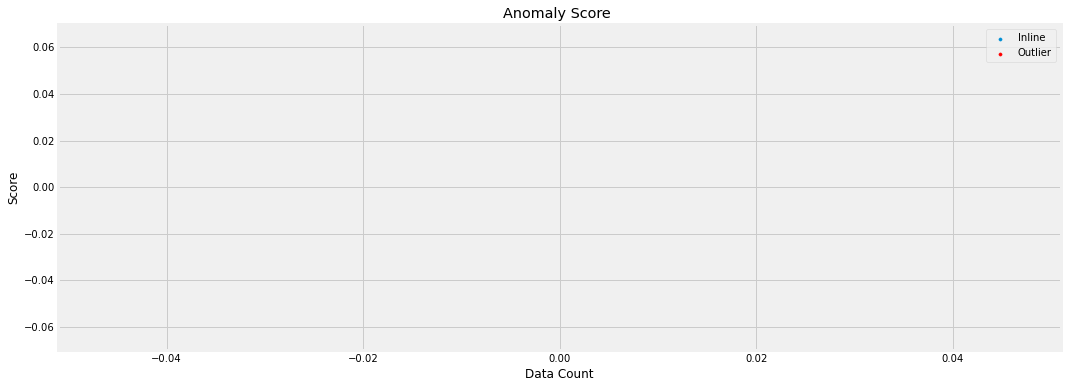

Threashold  18.355469684226303


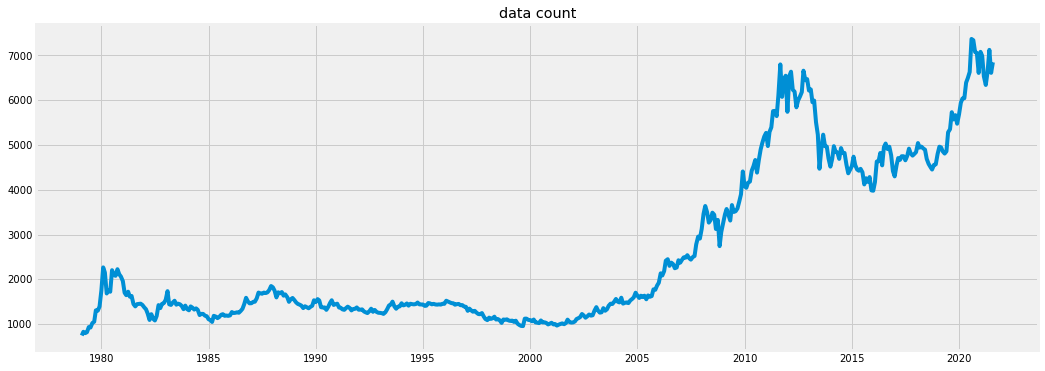

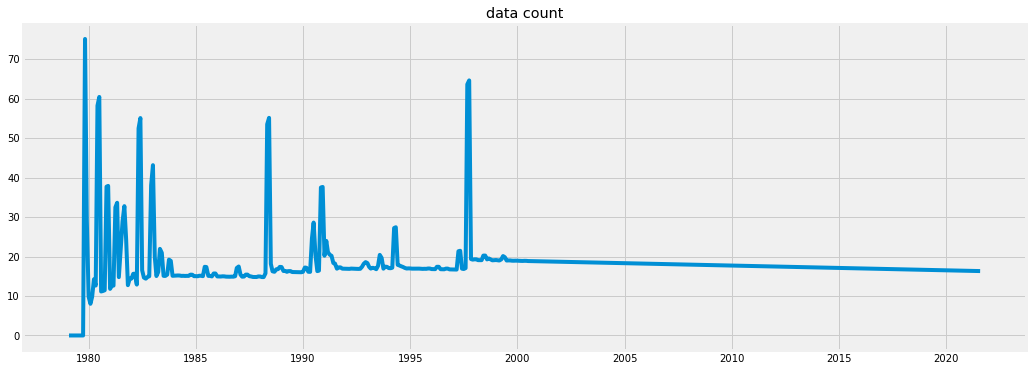

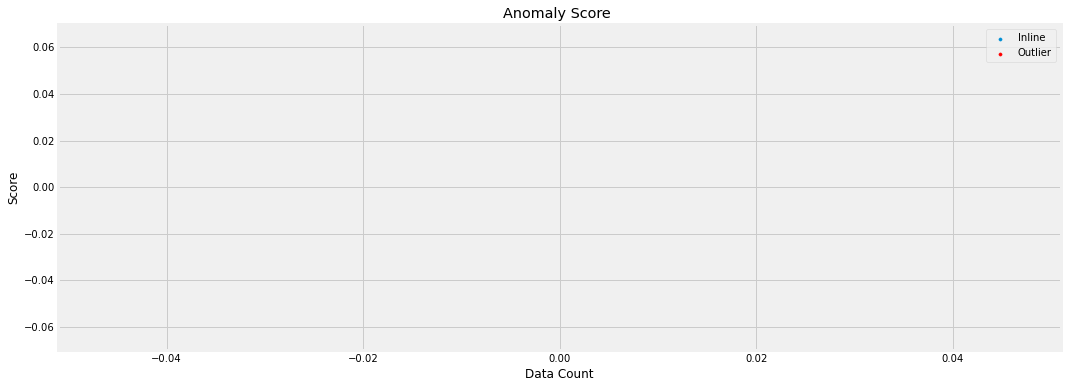

Threashold  17.839954584283795


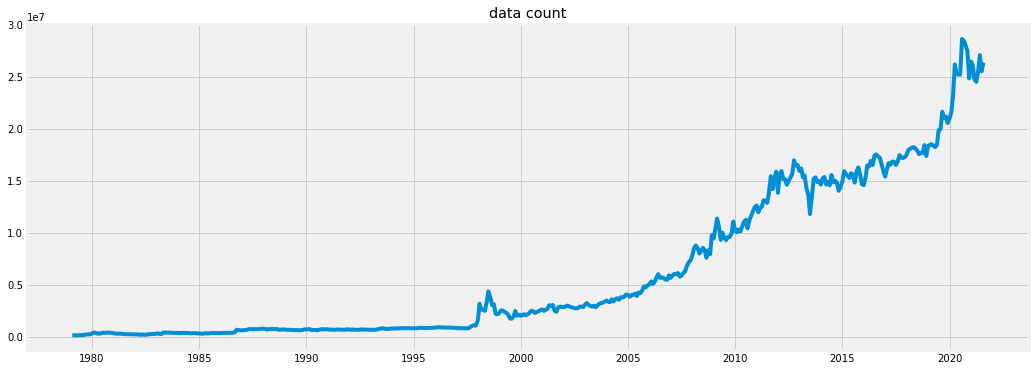

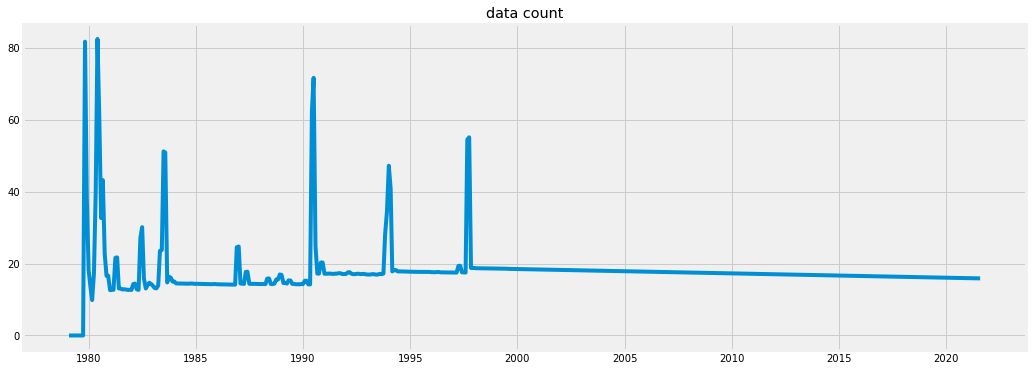

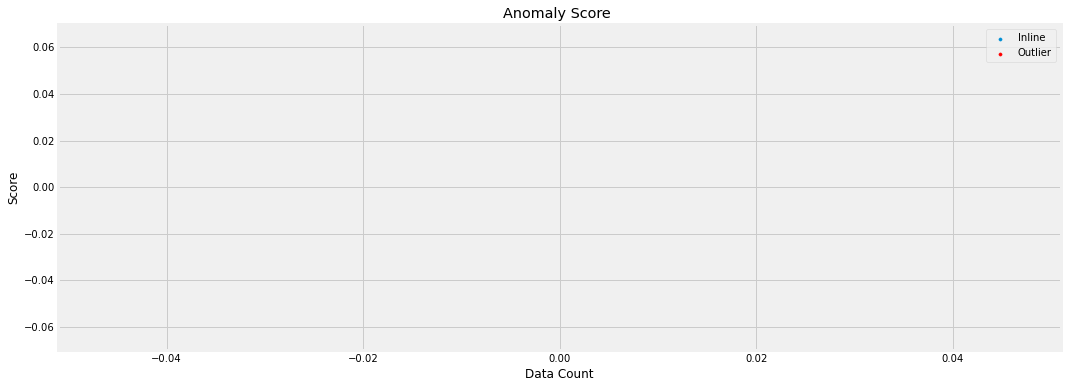

Threashold  20.730404548084586


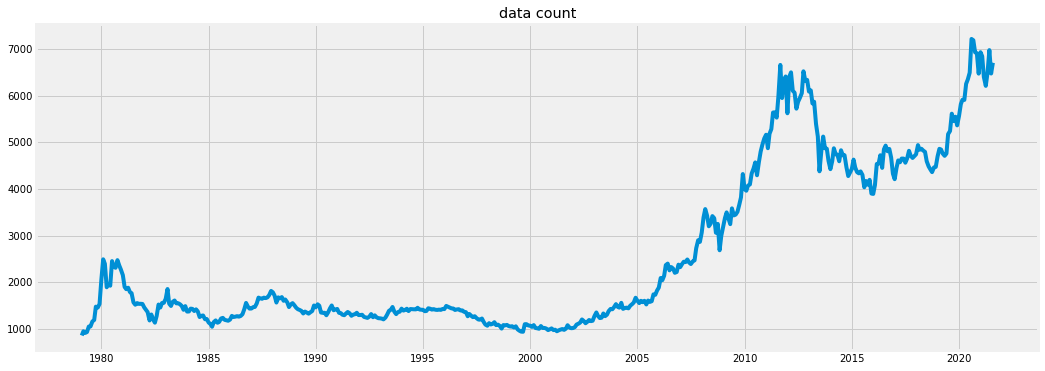

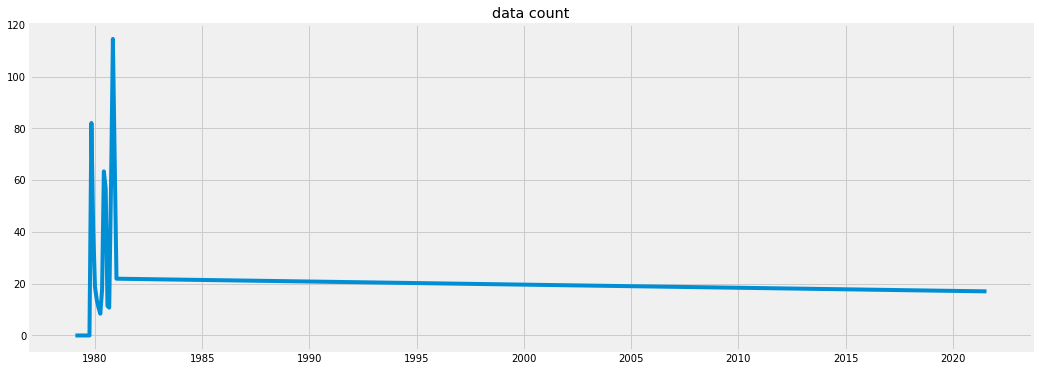

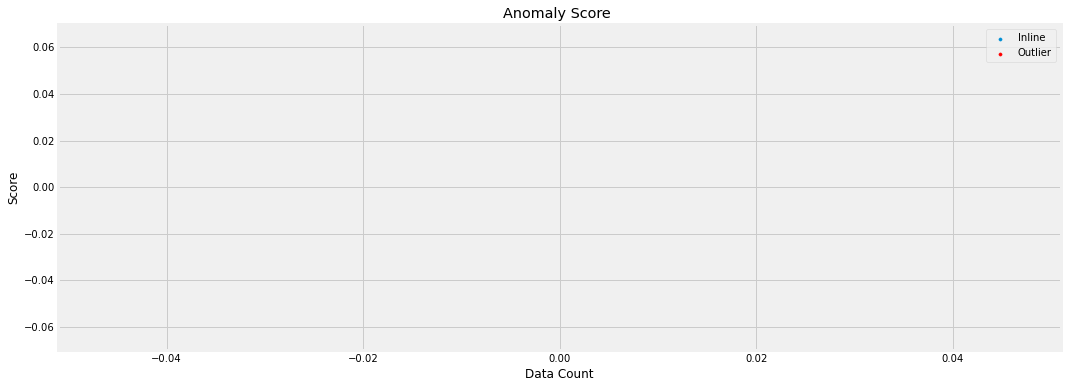

Threashold  18.18165594891918


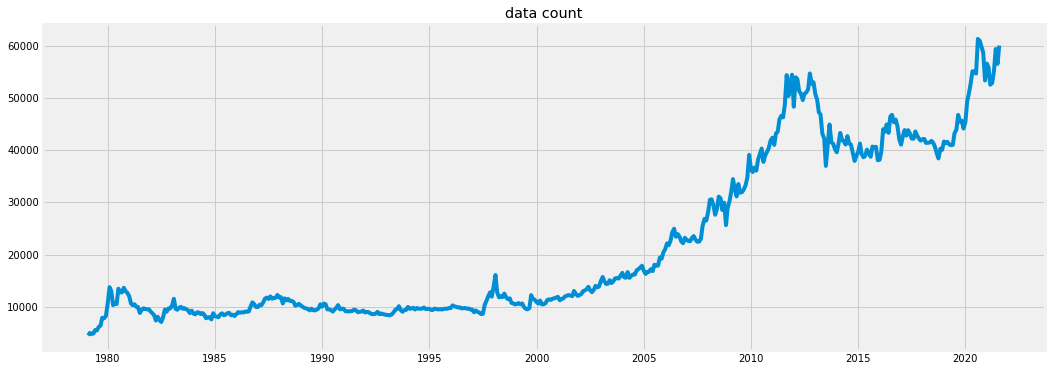

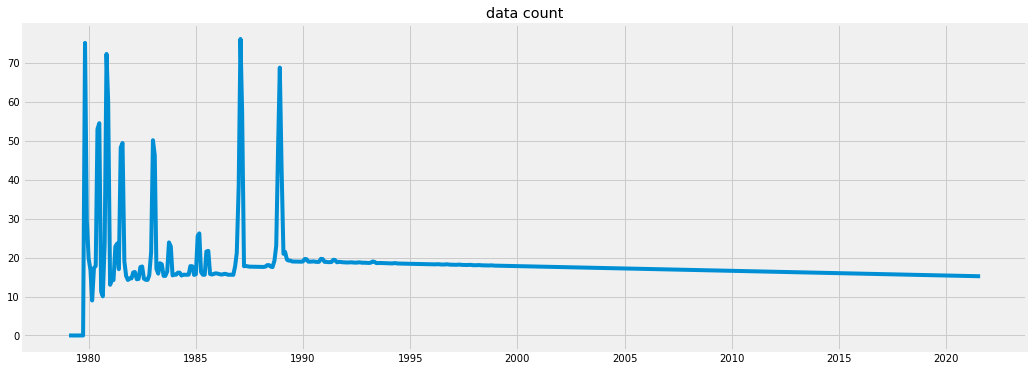

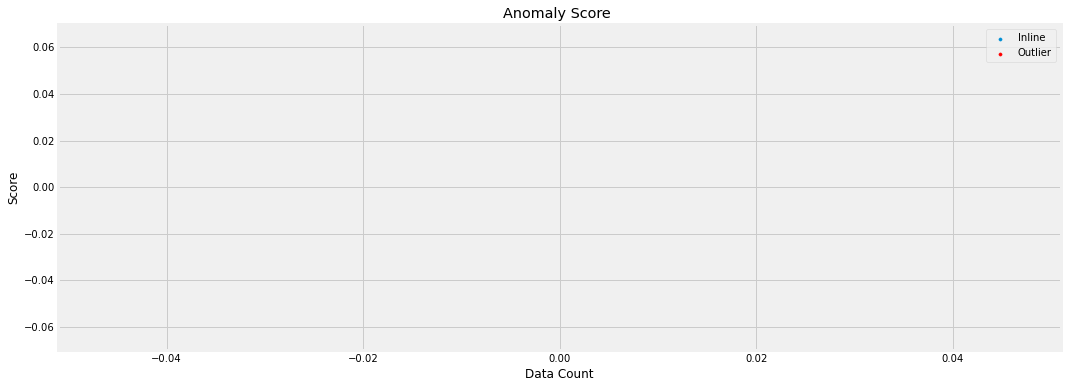

Threashold  nan


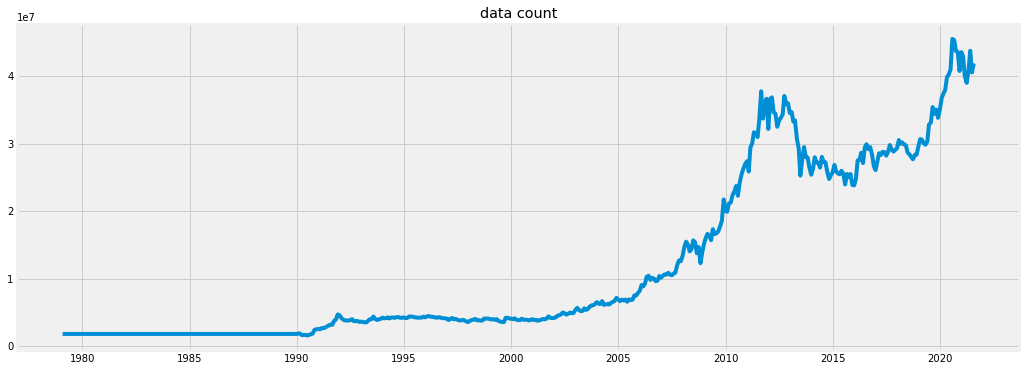

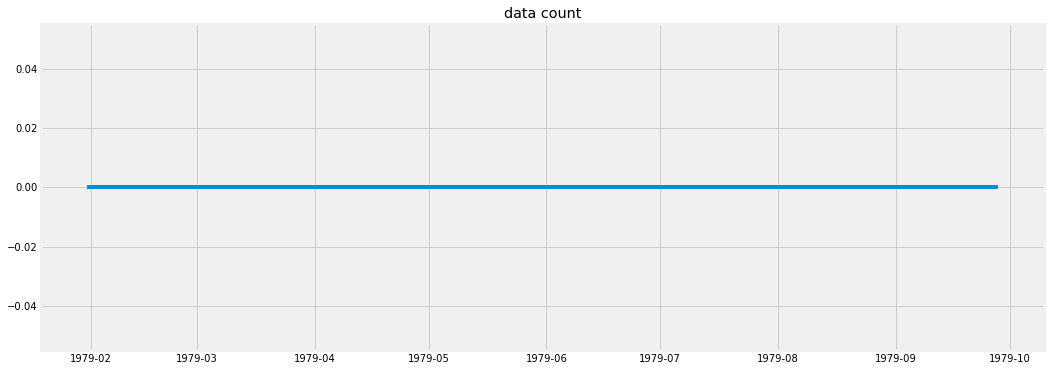

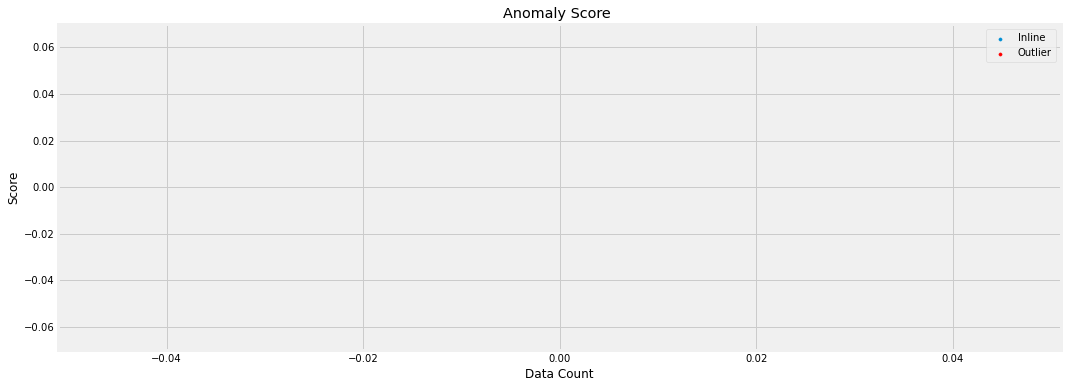

Threashold  nan


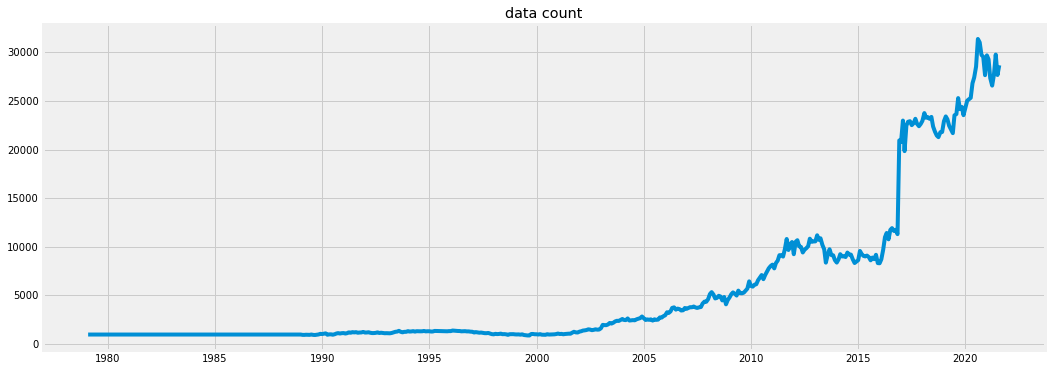

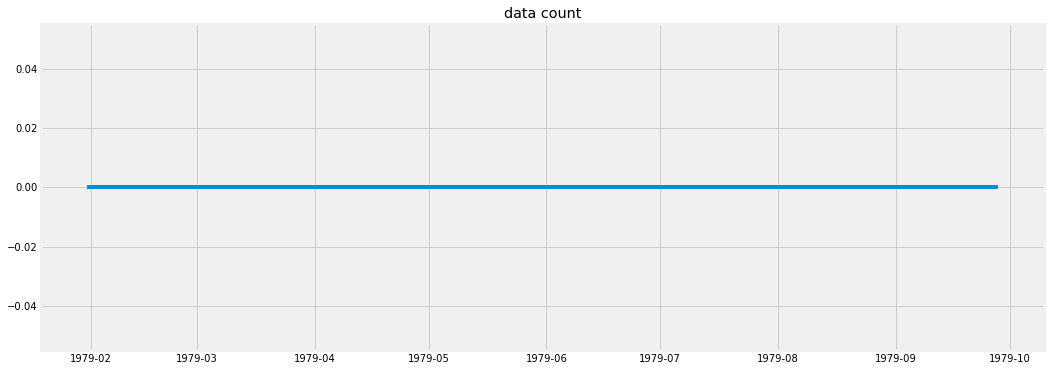

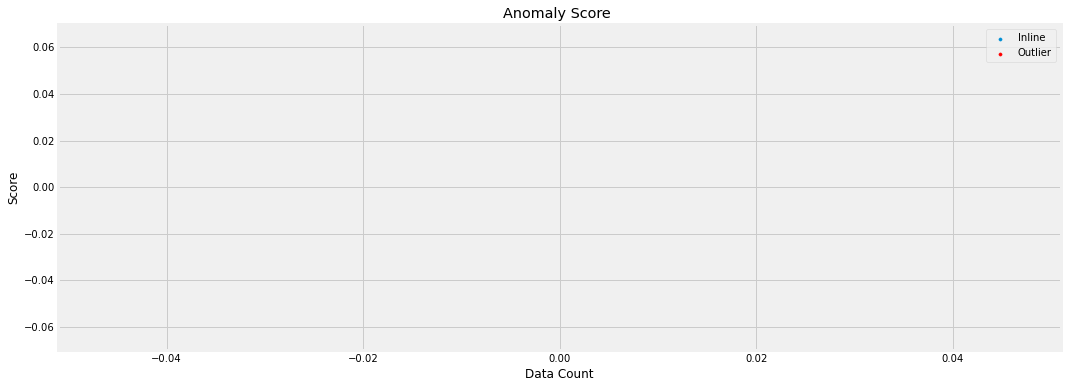

Threashold  15.666604060244916


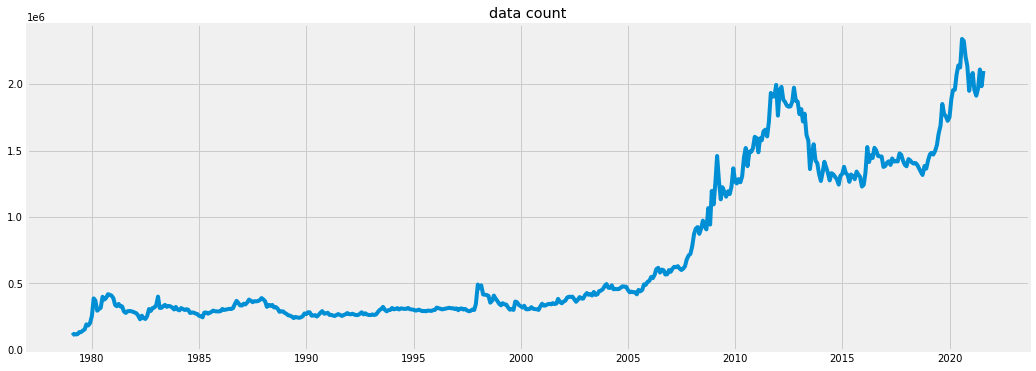

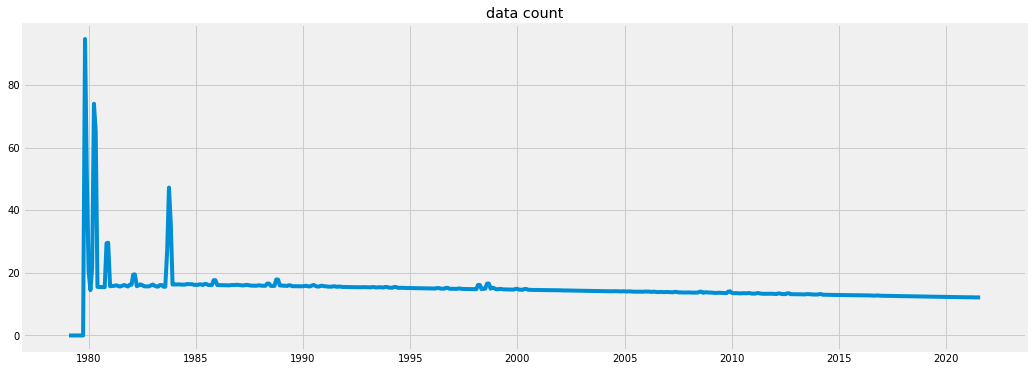

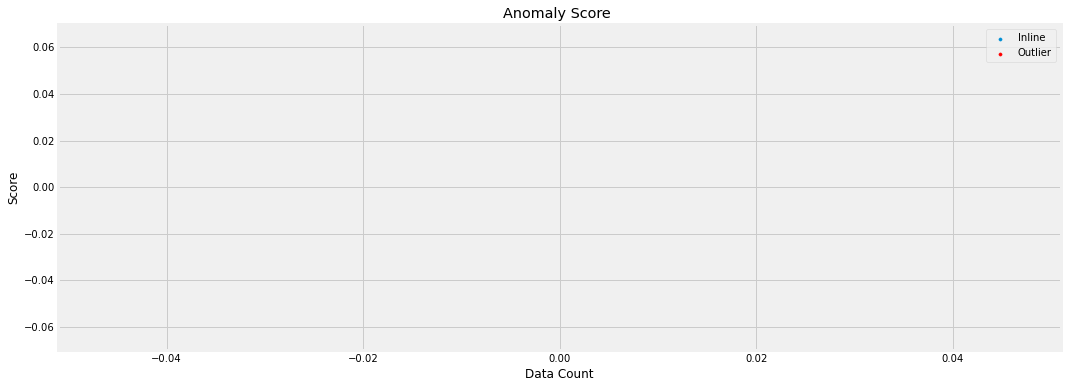

Threashold  21.471422464979305


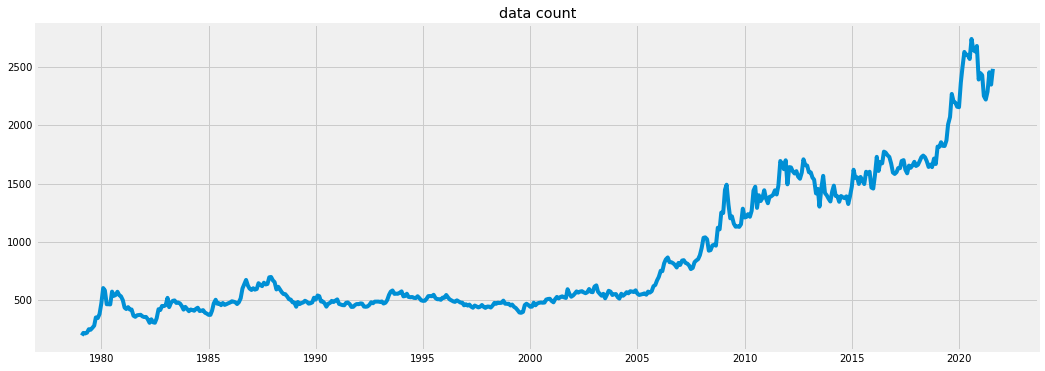

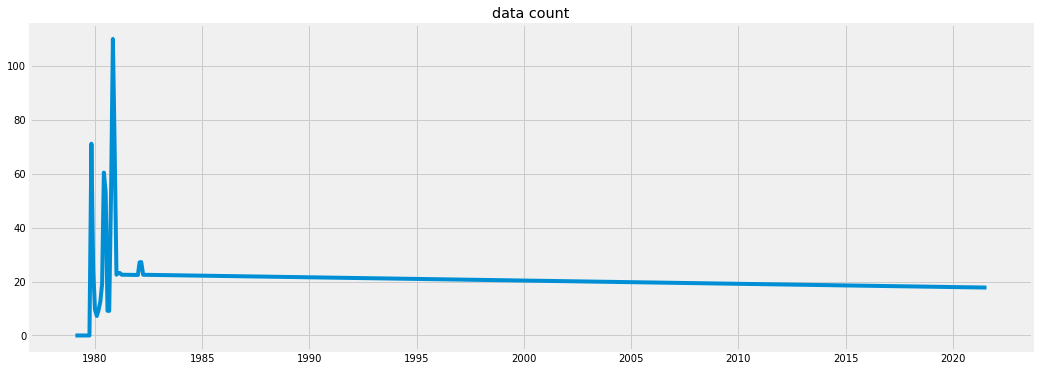

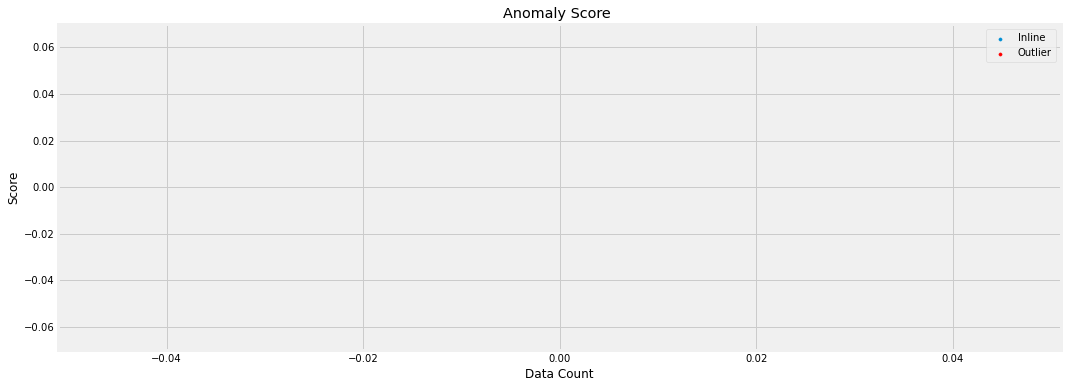

Threashold  20.480601270043245


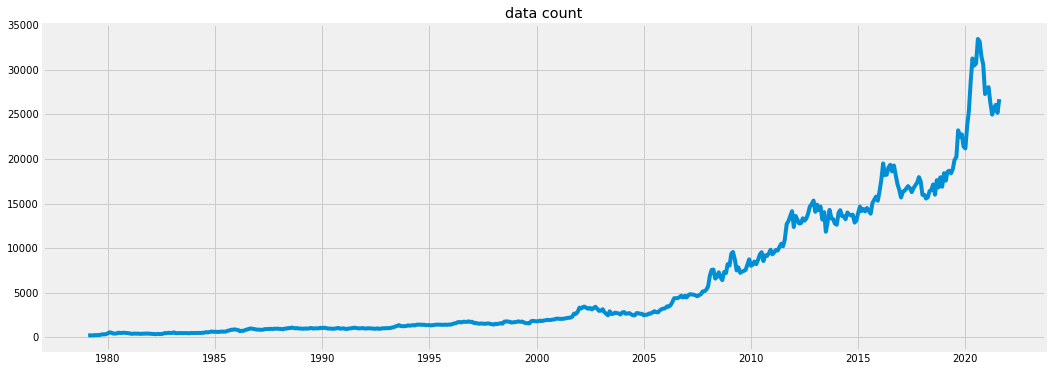

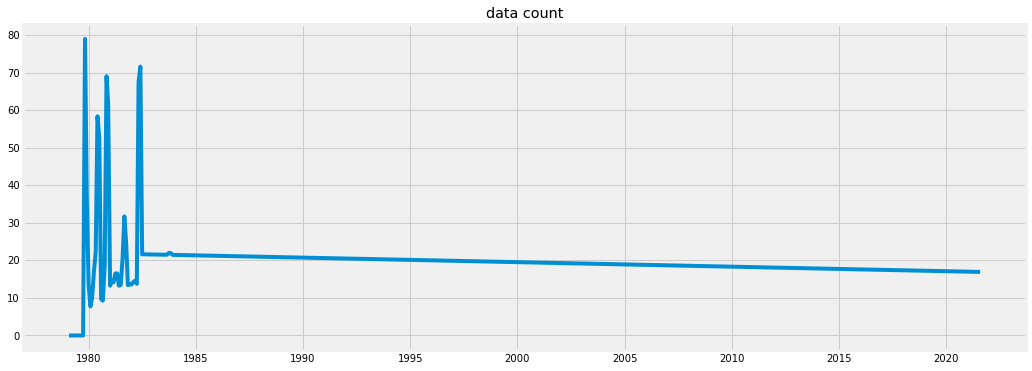

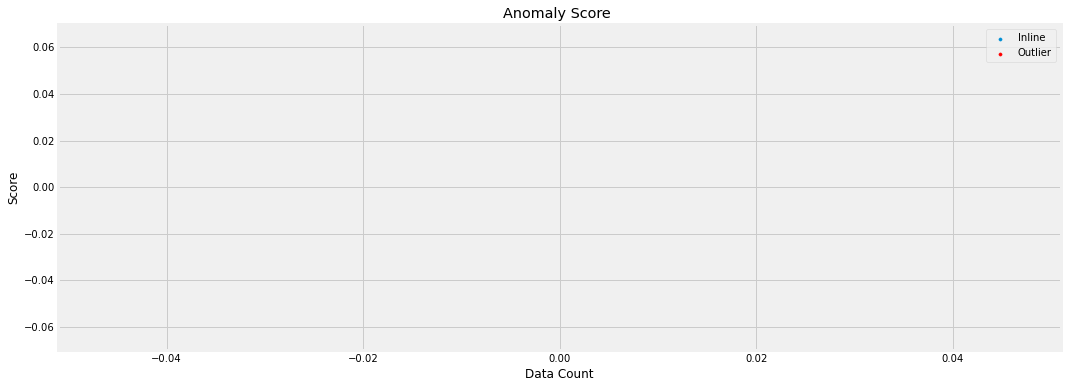

In [42]:
for col in gold_price.columns:
    plot_anomaly_score_low_higt(cpd_gold_price[col], gold_price[col])

## Spilt the Dataset <a name="splitdata"></a>


In [43]:
def timeseries_train_test_split(y, test_size, X=None):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(y)-test_size)
    
    if X:
        X_train = X.iloc[:test_index]
    else:
        X_train = []
    y_train = y.iloc[:test_index]
    if X:
        X_test = X.iloc[test_index:]
    else:
        X_test = []
    y_test = y.iloc[test_index:]
    
    return y_train, y_test, X_train, X_test

The gold price data is from Jan 1979 to July 2021. I use the last 2 years data as test dataset, and the rest of the historical data as training dataset

In [44]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = timeseries_train_test_split(gold_price, test_size=6)

## Evaluation Methods <a name="evaluation"></a>

In [224]:

def MSE_RMSE_evaluation(pred_df, test_size=6):
    test_df = gold_price[-test_size:]
    
    sample_num = 0
    SE_sum = 0
    for col in test_df.columns:
        col_sum = sum((test_df[col] - pred_df[col])**2)
        SE_sum += col_sum
        sample_num += len(test_df[col])
    MSE = SE_sum/sample_num
    RMSE = math.sqrt(MSE)
    return (MSE, RMSE)
        

In [230]:
def MAE_evaluation(pred_df, test_size=6):
    test_df = gold_price[-test_size:]
    
    sample_num = 0
    AE_sum = 0
    for col in test_df.columns:
        col_sum = sum(abs(test_df[col] - pred_df[col]))
        AE_sum += col_sum
        sample_num += len(test_df[col])
    MAE = AE_sum/sample_num
    return MAE

In [320]:
def R_square_evaluation(pred_df, test_size=6):
    test_df = gold_price[-test_size:]
    
    AE_sum = 0
    y_sum = 0
    sample_num = 0
    for col in test_df.columns:
        col_sum = sum((test_df[col] - pred_df[col])**2)
        AE_sum += col_sum
        sample_num += len(test_df[col])
        y_sum += sum(test_df[col])
    y_mean = y_sum/sample_num
    y_var = 0
    for col in test_df.columns:
        col_var = sum((test_df[col] - y_mean)**2)
        y_var += col_var
    R_square = 1 - AE_sum/y_var
    return R_square

## Time Series Forecasting <a name="TSForecasting"></a>

### ARIMA <a name="ARIMA"></a>

ARIMA is known as a powerful single time series forecasting tool, however, it need to build model for each individual time series, to be more specific, stabelize the time series to determine the parameter d and plot ACF and PACF curve to determin the parameter p and q. Therefore, when talk about plents of time series forecasting, ARIMA method become time consuming.

In my work, I use pmdarima package's auto_arima, which can automatically decide the primary parameters d, p, and q for each single time series.

In [303]:
from pmdarima.arima import auto_arima
def ARIMA_forecasting(col, test_size=6):
    # split data
    y_train, y_test, _, _, = timeseries_train_test_split(gold_price[col], test_size=test_size, X=[])
    
    # fit model
    model = auto_arima(y_train, start_p=0, start_q=0, max_p=6, max_q=6, max_d=2,
                       seasonal=True, test='adf',
                       error_action='ignore',
                       information_criterion='aic',
                       njob=-1, trace=True, suppress_warnings=True) # 
    
    # predict
    forecast = pd.DataFrame(model.predict(n_periods=test_size), index=y_test.index)
    
    # visulize
    plt.figure(figsize=(14,6))
    plt.plot(forecast)
    plt.plot(y_test)
    plt.plot(y_train)
    plt.legend(['forecast','testing', 'training'])
    plt.title("ARIMA prediction for"+col)
    plt.show()

    return forecast
    

In [304]:
!pip install pmdarima


You should consider upgrading via the 'c:\users\zyang672\appdata\local\continuum\anaconda2\envs\newpython3\python.exe -m pip install --upgrade pip' command.


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5224.484, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5220.723, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5220.168, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5225.334, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5221.785, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5221.521, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5222.311, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5221.824, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.116 seconds


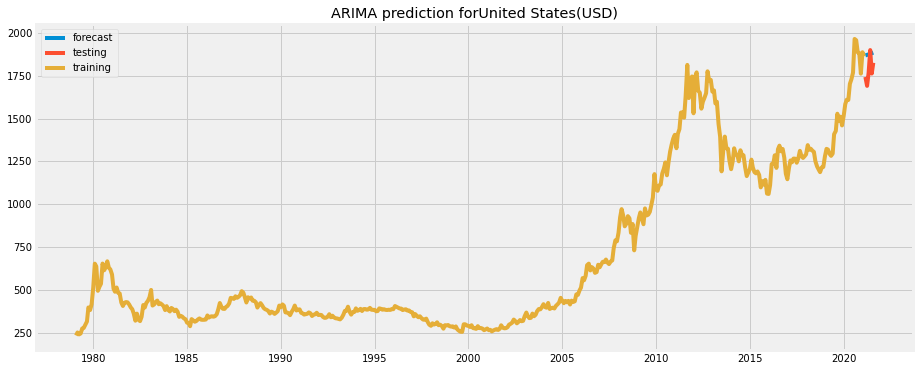

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4933.888, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4928.548, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4928.542, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4935.569, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4930.505, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4930.489, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4930.081, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4931.301, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.099 seconds


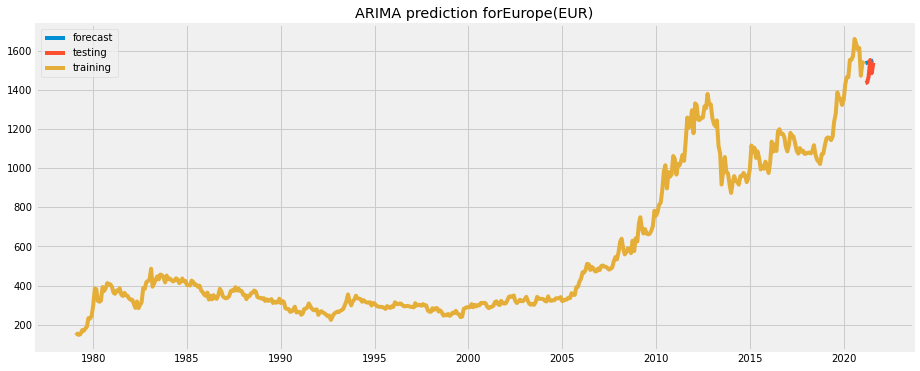

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10067.390, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10069.387, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10069.389, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10067.012, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10071.389, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.172 seconds


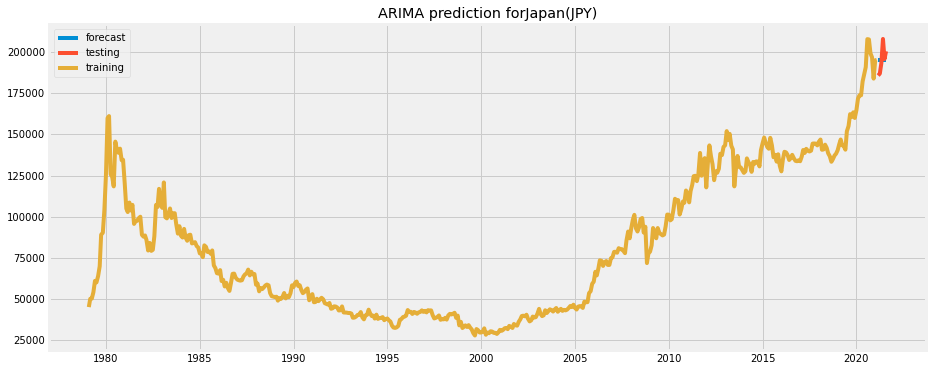

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4795.711, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4795.363, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4795.377, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4797.567, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4797.362, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4797.362, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4799.362, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4797.755, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.602 seconds


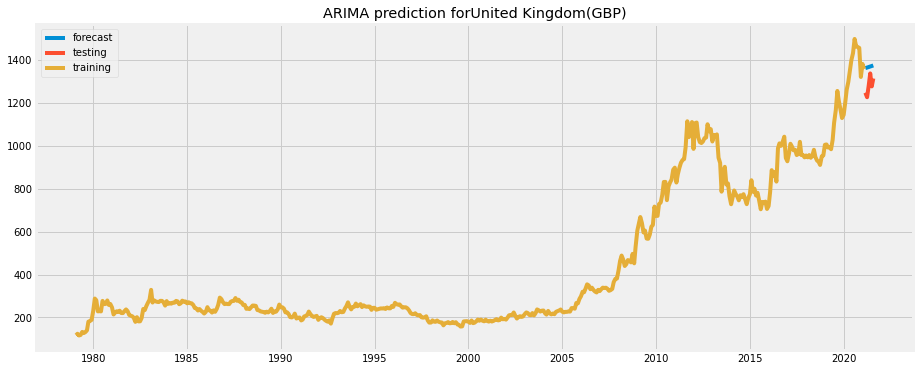

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5329.352, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5328.727, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5328.607, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5331.239, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5330.090, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5330.340, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5330.204, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5331.124, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.957 seconds


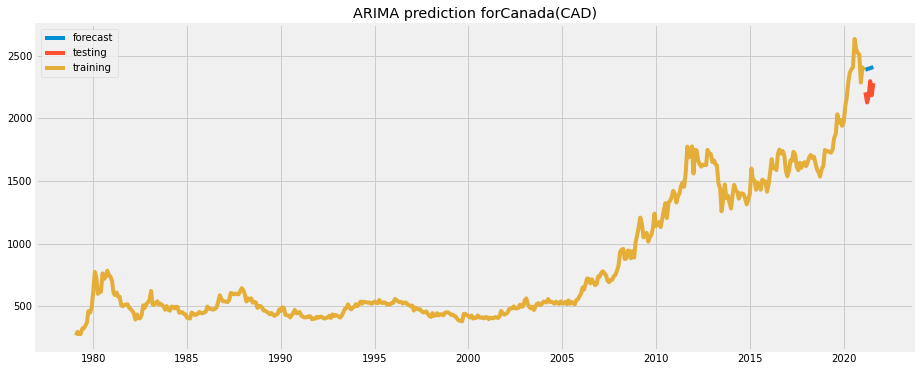

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5283.281, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5281.554, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5281.358, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5282.844, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5282.993, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5283.072, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5285.239, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5281.248, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5282.992, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5283.045, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5281.398, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5284.674, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.970 seconds


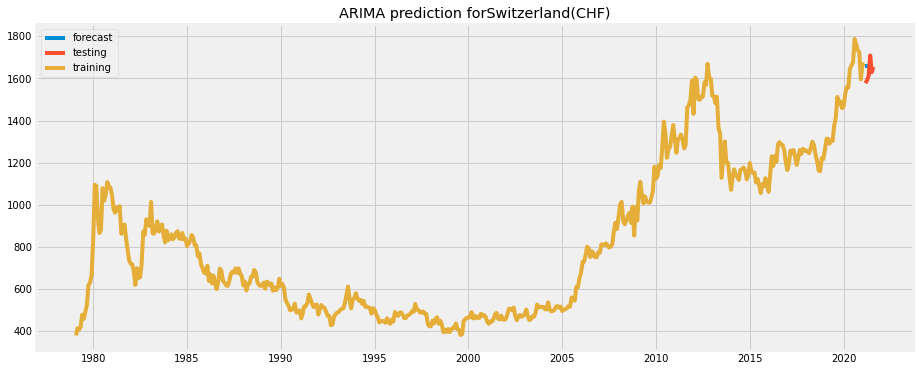

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9216.680, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9210.051, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9210.070, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9221.657, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9211.658, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9211.963, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9213.032, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9217.023, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.457 seconds


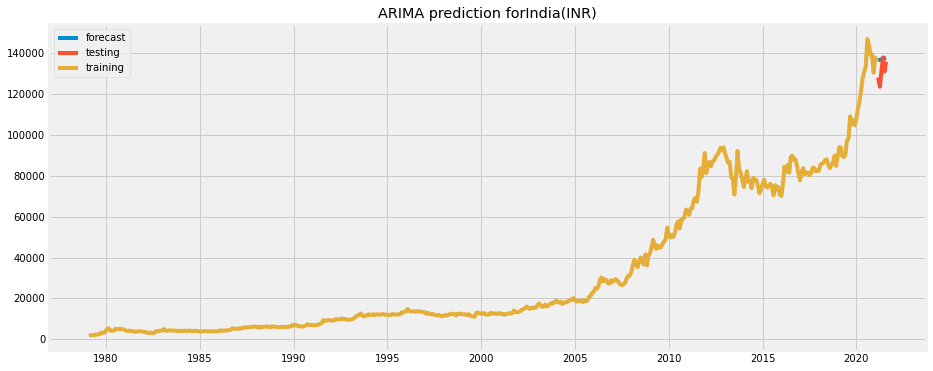

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7067.333, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7060.881, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7060.857, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7068.805, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7062.792, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7062.892, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7064.027, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7063.387, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.702 seconds


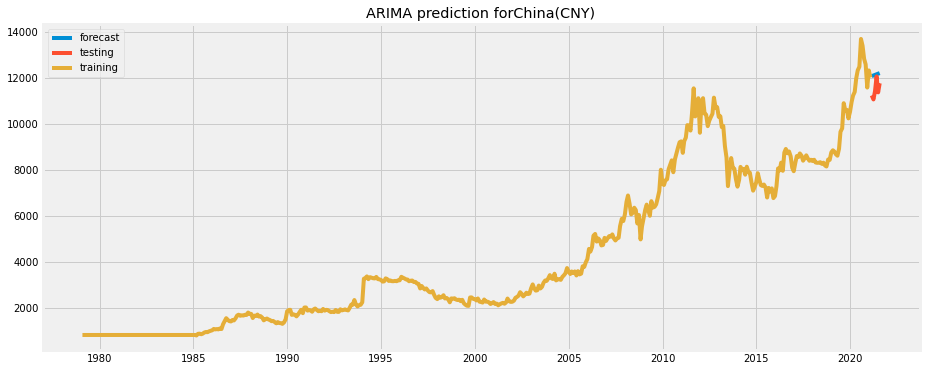

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6809.573, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6806.175, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6807.651, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6816.072, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6792.533, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6786.055, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6786.969, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6778.866, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6779.837, Time=0.67 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6762.225, Time=0.83 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=6762.156, Time=0.91 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=6788.794, Time=0.10 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=6757.437, Time=1.01 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=6774.634, Time=0.13 sec
 ARIMA(6,1,2)(0,0,0)[0] intercept

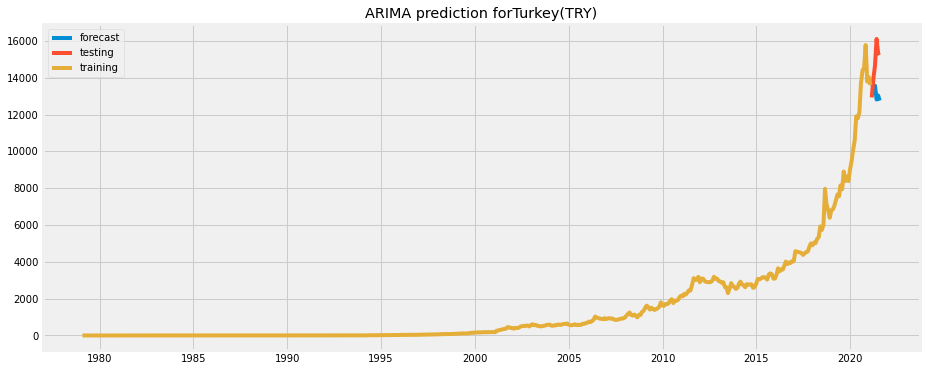

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6549.672, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6545.184, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6544.658, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6550.689, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6546.216, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6545.995, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6546.621, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6546.521, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.883 seconds


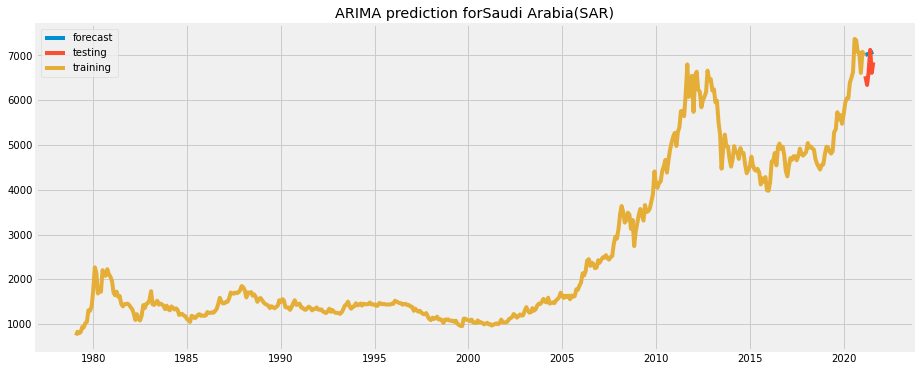

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14615.266, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14611.664, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14611.132, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14619.119, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14613.230, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14611.552, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14613.794, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=14616.484, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.421 seconds


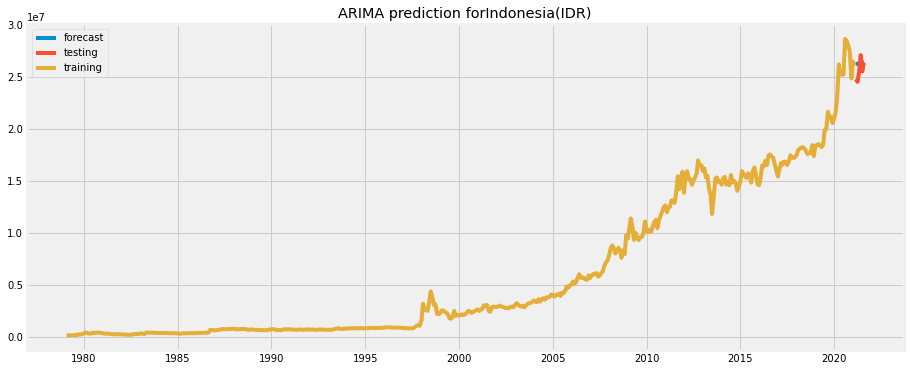

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6539.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6536.613, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6536.165, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6540.745, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6537.698, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6537.489, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6538.182, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6537.704, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.728 seconds


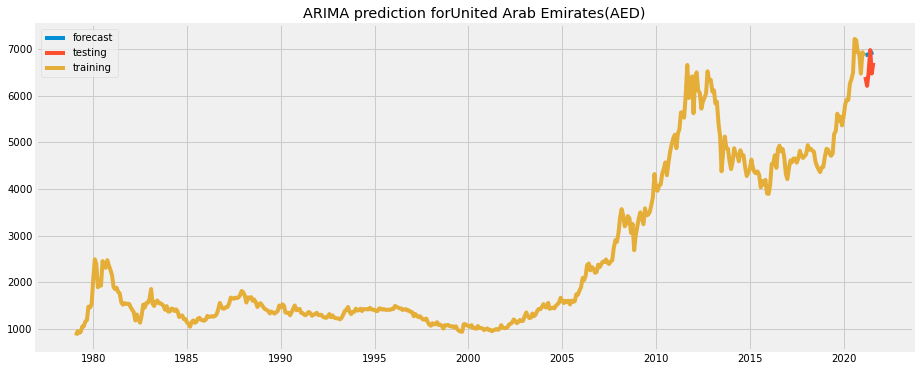

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8619.419, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8613.583, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8612.807, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8620.766, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8614.726, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8614.030, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8613.673, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8615.278, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.468 seconds


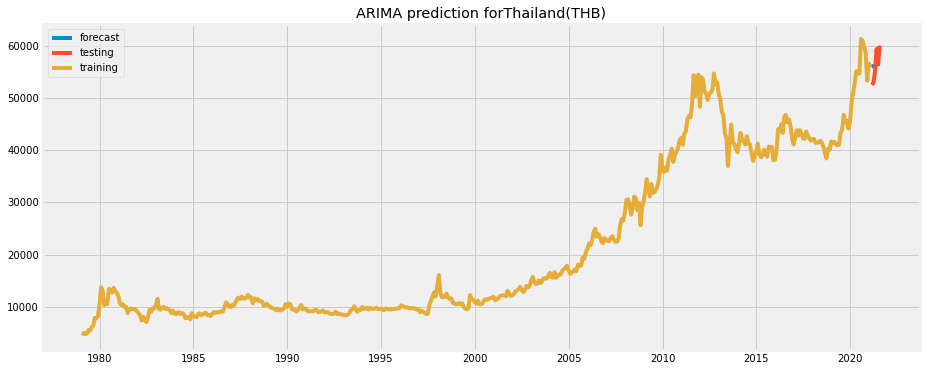

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15175.807, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15165.330, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15165.335, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15178.631, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15166.824, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15167.152, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15167.547, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=15169.958, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.473 seconds


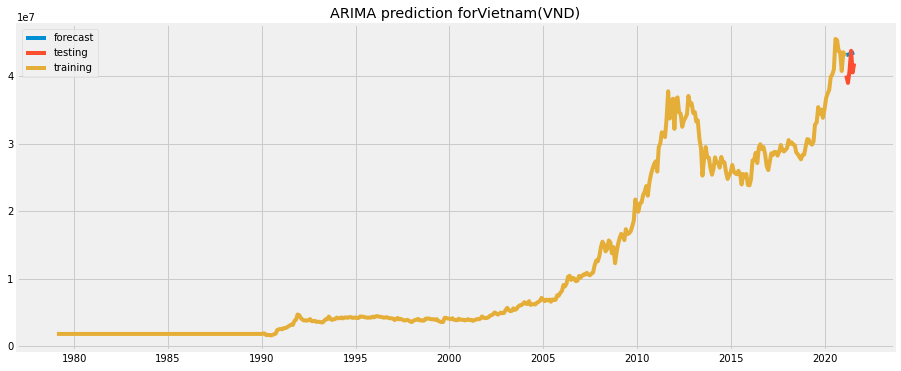

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7872.041, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7863.282, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7865.748, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7874.532, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7853.062, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7834.824, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7835.553, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7836.367, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7844.283, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7830.851, Time=0.54 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=7827.104, Time=0.22 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=7825.899, Time=0.09 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=7826.612, Time=0.11 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=7828.624, Time=0.29 sec
 ARIMA(5,1,0)(0,0,0)[0]          

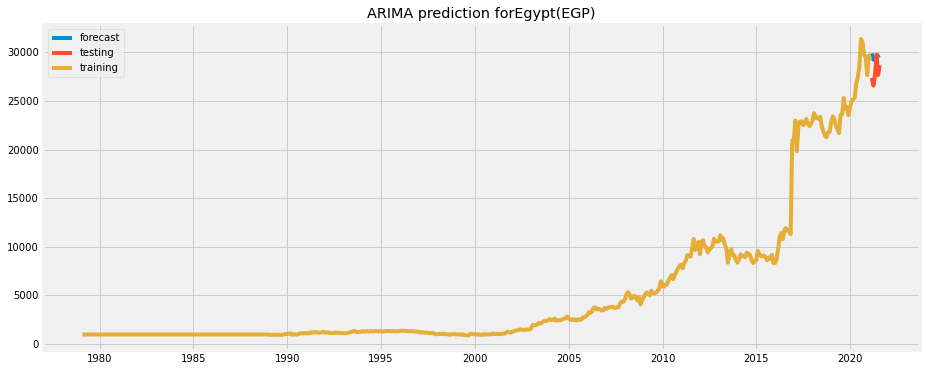

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12329.710, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12320.786, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12320.146, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12330.870, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12322.173, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12322.038, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12323.503, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12322.518, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.483 seconds


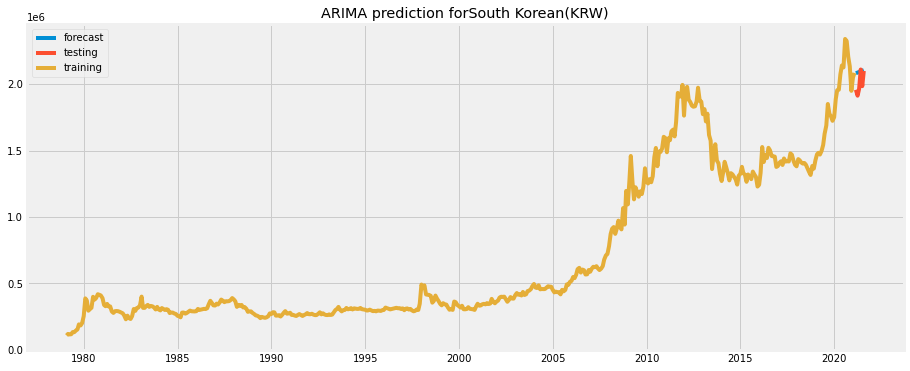

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5384.371, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5383.485, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5383.454, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5386.257, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5384.816, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5385.430, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5386.707, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5385.985, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.953 seconds


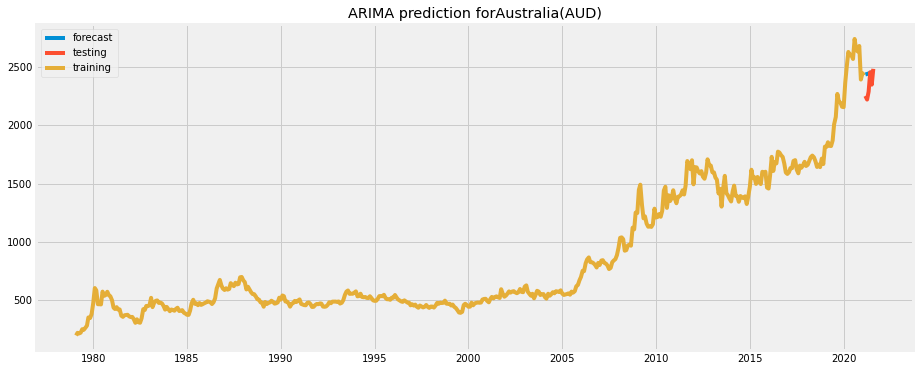

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7758.426, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7760.427, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7760.442, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7761.868, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7755.149, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7757.334, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7756.531, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7754.675, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7756.239, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7755.626, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7756.831, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.384 seconds


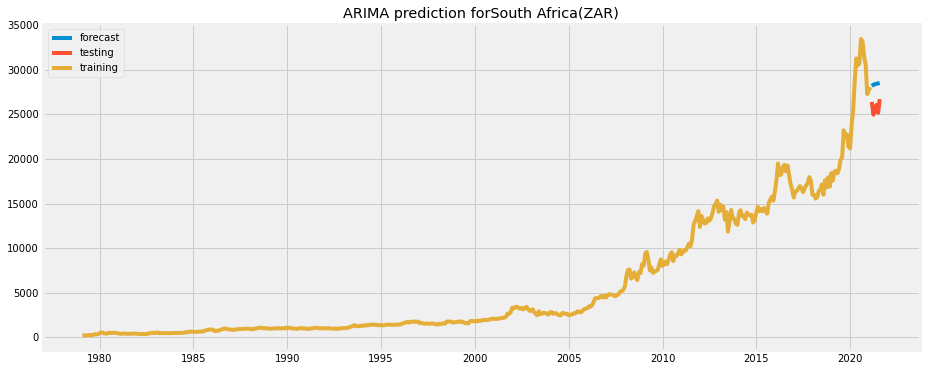

In [305]:
ARIMA_pred = []
for col in gold_price.columns:
    col_pred = ARIMA_forecasting(col)
    ARIMA_pred.append(col_pred)

In [306]:
def ARIMA_rolling_forecasting(col, test_size = 6, rolling_size = 10):
    columns = 'data'
    ts = gold_price[col]
    ps = 1  # perdiction per time
    horizon = 1  
    pred = []  
    test = ts[-test_size:]

    # rolling prediction
    for i in range(test_size):
        train = ts[-(rolling_size + test_size - i):-(test_size + horizon - i)]
        model = auto_arima(train, start_p=0, start_q=0, max_p=6, max_q=6, max_d=2,
                           seasonal=True, test='adf',
                           error_action='ignore',
                           information_criterion='aic',
                           njob=-1, suppress_warnings=True)
        model.fit(train)
        forecast = model.predict(n_periods=ps)
        pred.append(forecast[-1])


    predictions_ = pd.Series(pred,index=test.index)
    # print(predictions)

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(predictions_, test))
    print('RMSE : %.4f' % rmse)

    # visualize
    fig = plt.figure(figsize=(14,6))
    fig.add_subplot()
    plt.plot(X_train_vis[col], 'y-', label='train')
    plt.plot(test, 'r-', label='test')
    plt.plot(predictions_, 'b-', label='predictions')
    plt.title("ARIMA prediction for"+col)
    plt.legend(loc='best')
    plt.show(block=False)

    predictions = np.array(pred).reshape(-1)
    test = np.array(test[:len(predictions)].values).reshape(-1,1)
    return predictions

RMSE : 196.6914


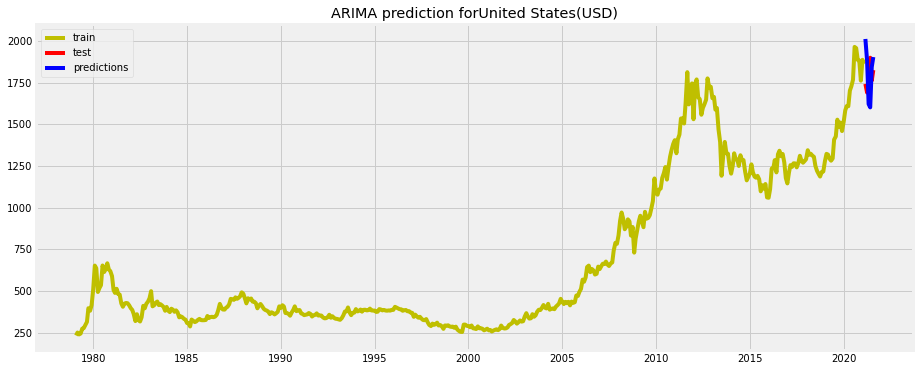

RMSE : 83.0908


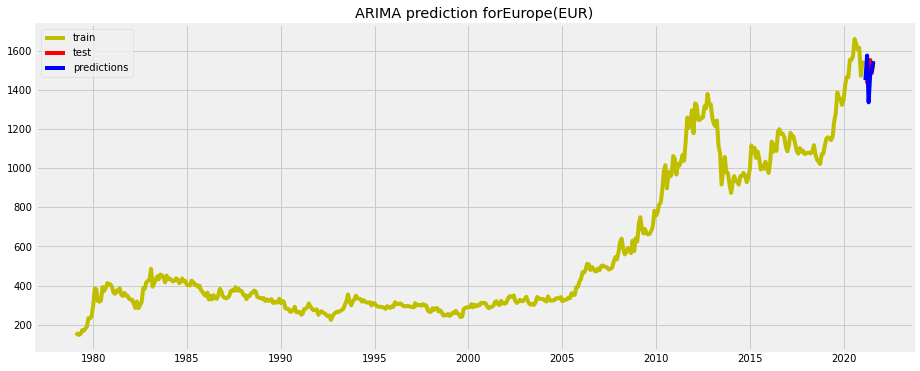

RMSE : 16621.0452


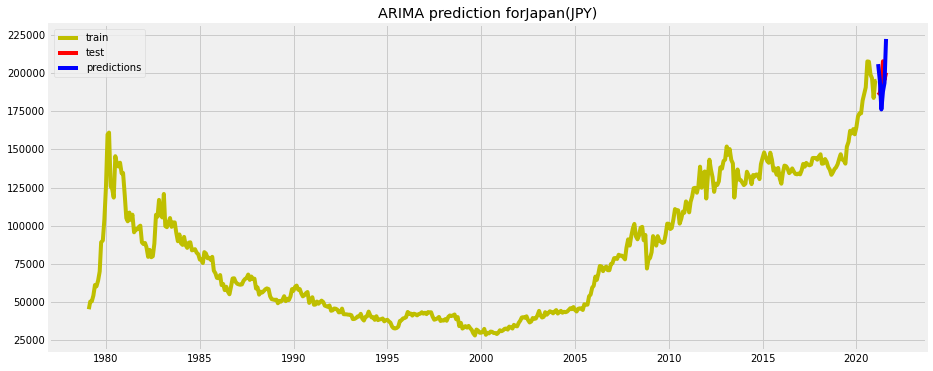

RMSE : 85.4828


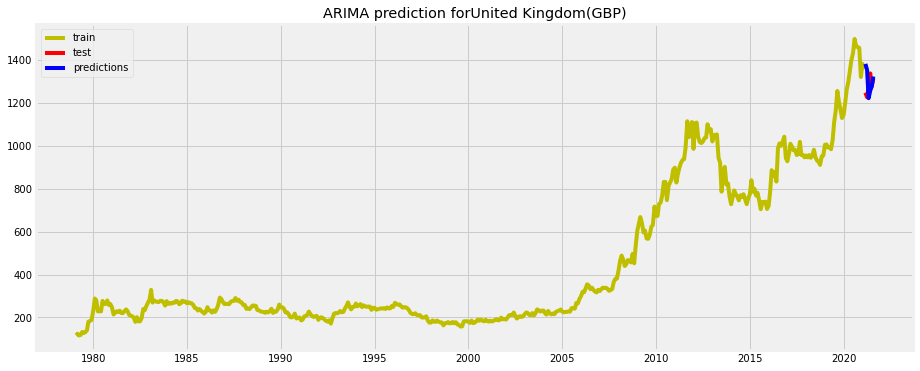

RMSE : 160.4776


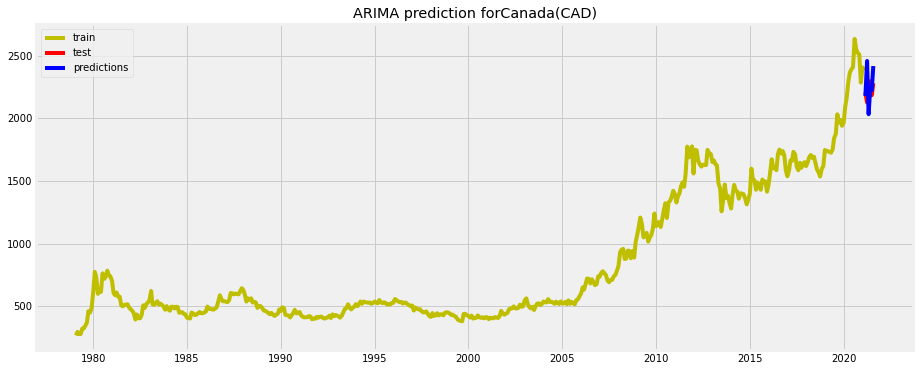

RMSE : 89.5399


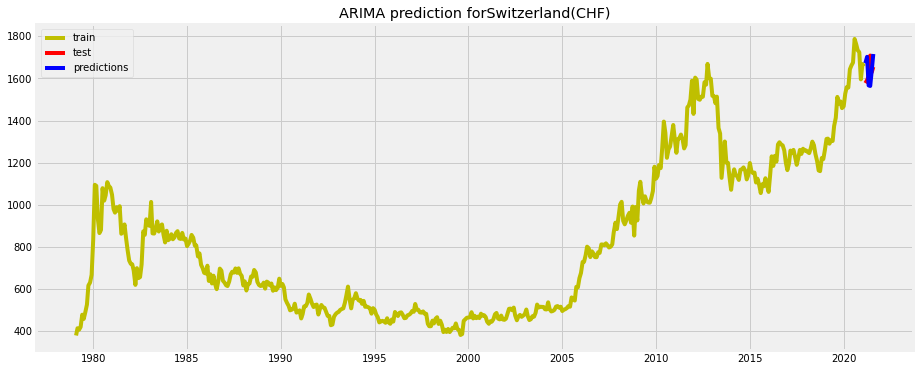

RMSE : 12671.7802


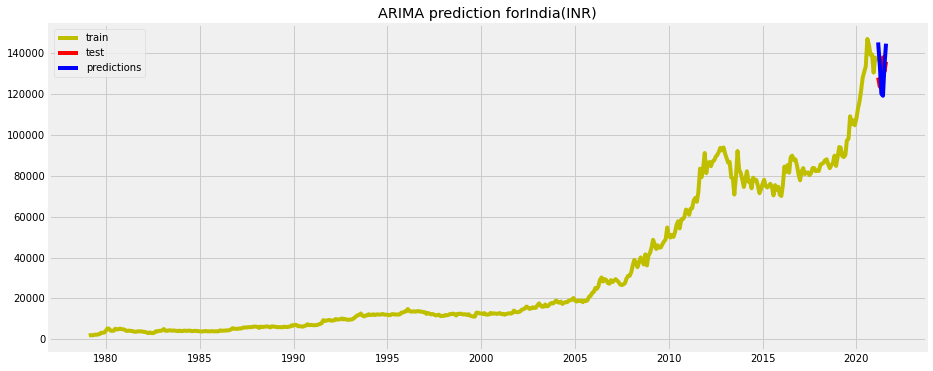

RMSE : 1143.7659


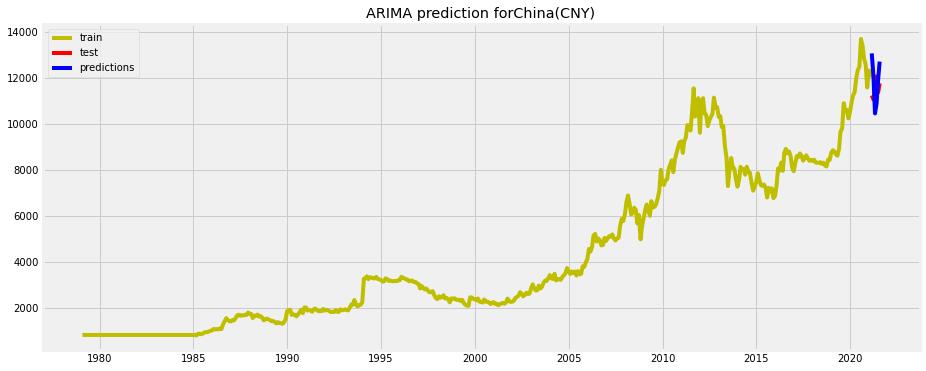

RMSE : 1714.8307


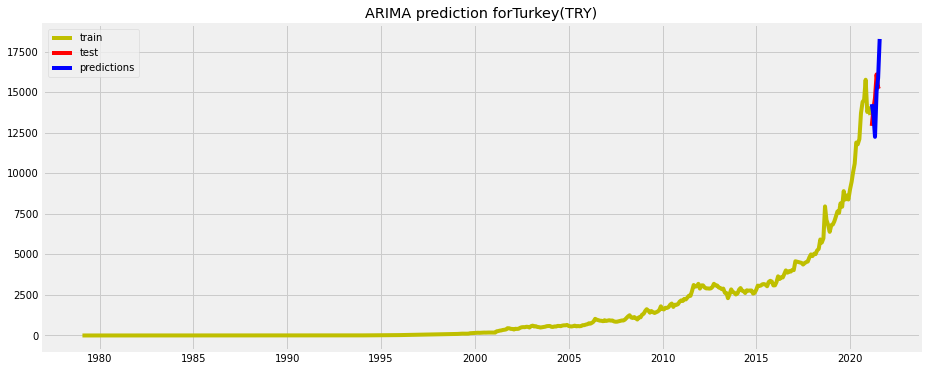

RMSE : 788.9986


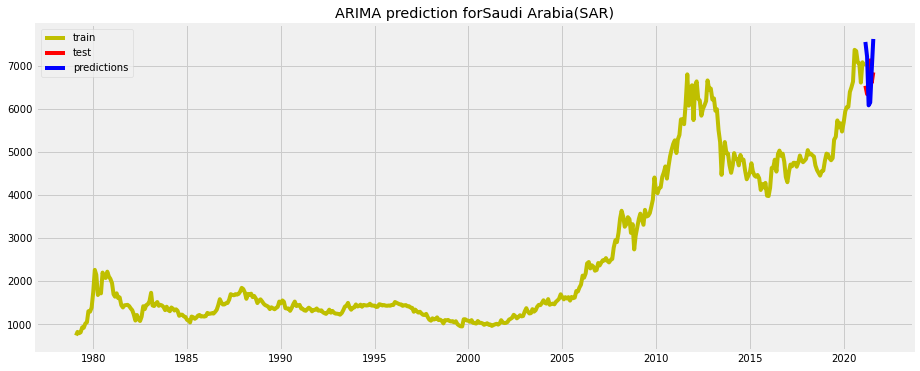

RMSE : 2282964.3524


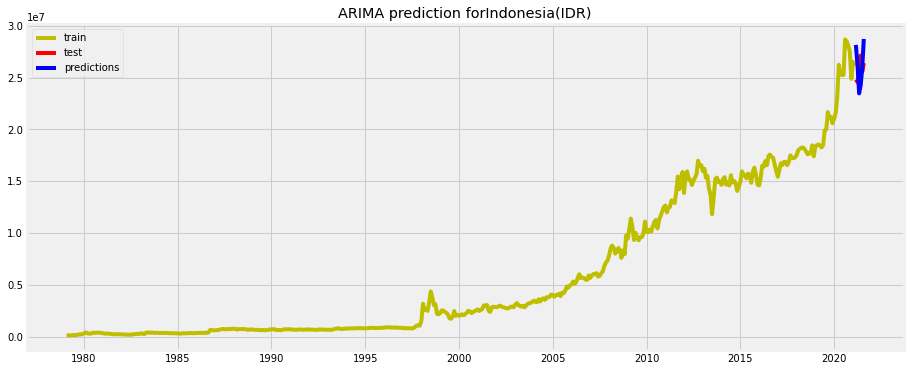

RMSE : 771.6663


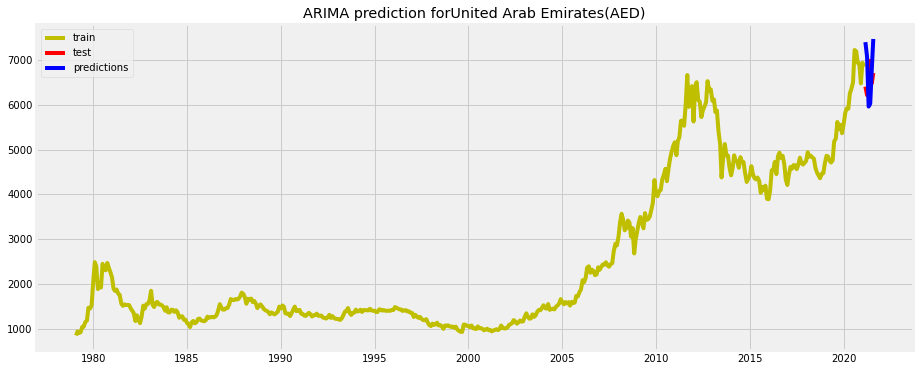

RMSE : 4987.2489


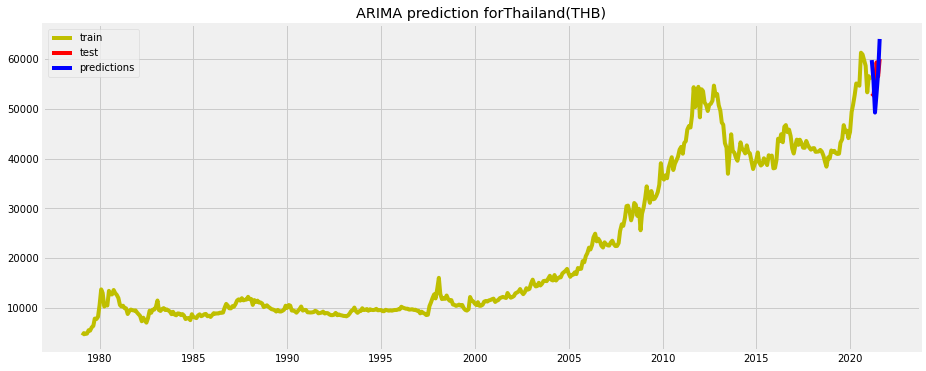

RMSE : 4601621.3351


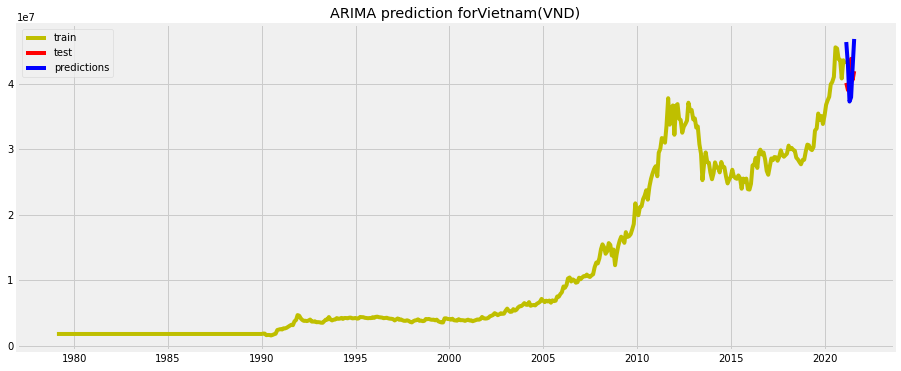

RMSE : 3066.3311


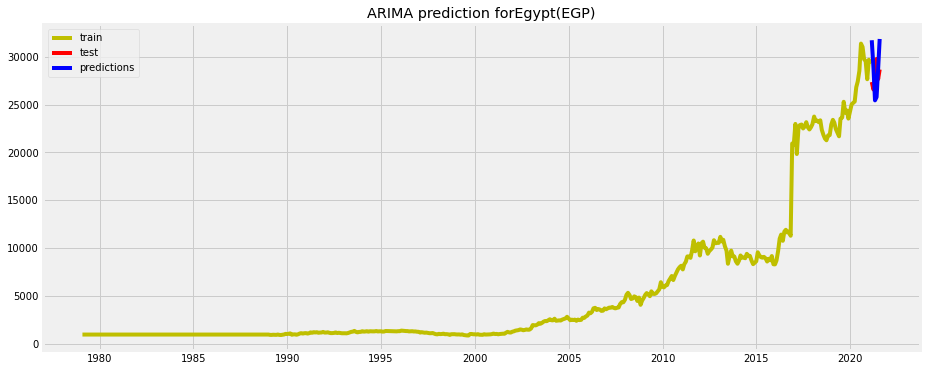

RMSE : 180097.8916


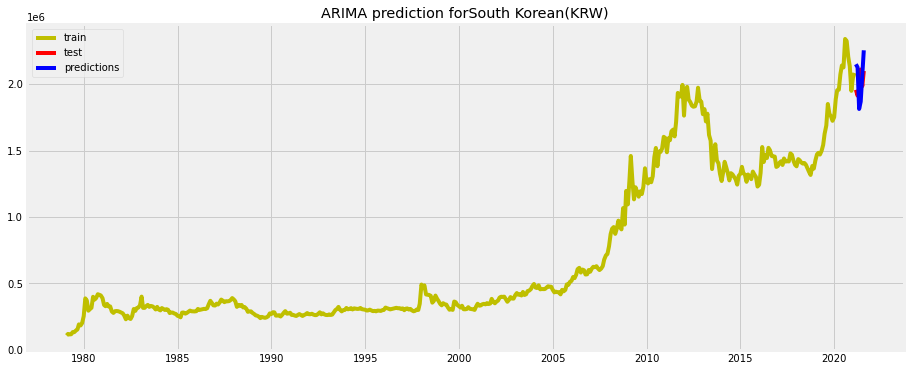

RMSE : 175.9253


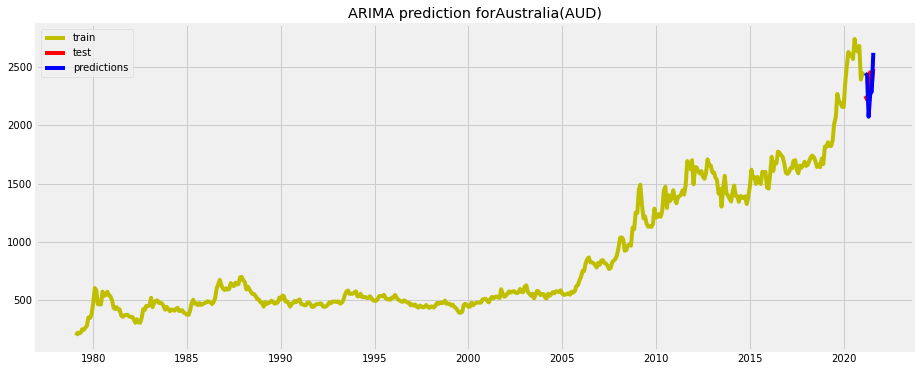

RMSE : 2005.6154


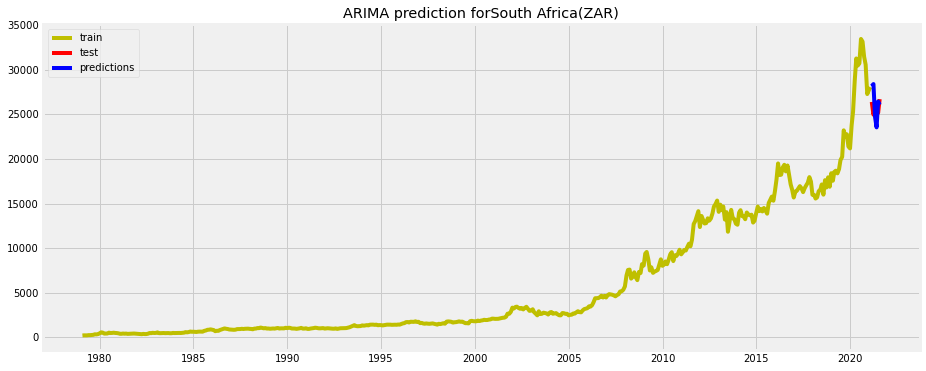

In [307]:
ARIMA_pred = []
for col in gold_price.columns:
    col_pred = ARIMA_rolling_forecasting(col)
    ARIMA_pred.append(col_pred)

In [308]:
test_size = 6
test_df = gold_price[-test_size:]
ARIMA_pred = np.asarray(ARIMA_pred)
ARIMA_pred = pd.DataFrame(ARIMA_pred.T, columns = test_df.columns)
ARIMA_pred = pred_df.set_index(test_df.index[test_df.shape[0]-test_size:]) 

In [321]:
ARIMA_MSE_RMSE = MSE_RMSE_evaluation(ARIMA_pred)
ARIMA_MAE = MAE_evaluation(ARIMA_pred)
ARIMA_Rsquare = R_square_evaluation(ARIMA_pred)

In [322]:
ARIMA_pred

United States(USD)  Europe(EUR)     Japan(JPY)  \
Date                                                         
2021-02-26         1975.031494  1568.110352  197856.140625   
2021-03-31         1989.903442  1356.243652  179692.593750   
2021-04-30         1926.799194  2297.270020  190844.843750   
2021-05-31         2156.151855  1642.315674  176935.921875   
2021-06-30         2069.133301  1461.060547  184274.812500   
2021-07-30         2096.626953  1510.962646  194992.000000   

            United Kingdom(GBP)  Canada(CAD)  Switzerland(CHF)     India(INR)  \
Date                                                                            
2021-02-26          1344.783325  3511.268555       1686.722900  126474.226562   
2021-03-31          1453.463745  2189.214600       1720.443604  127478.609375   
2021-04-30          1624.854980  2044.386841       1829.847412  139891.281250   
2021-05-31          1364.910645  3478.489258       1674.407959  125700.187500   
2021-06-30          1341.118896  2221.661133       1865.117188  111583.945312   
2021-07-30          1392.559204  2379.666260       1837.301514  122880.109375   

              China(CNY)  Turkey(TRY)  Saudi Arabia(SAR)  Indonesia(IDR)  \
Date                                                                       
2021-02-26  12060.375000  7475.076172        8174.141602      23628864.0   
2021-03-31  11873.714844  7487.085938        6420.743164      24883376.0   
2021-04-30  12985.821289  8059.659180        7456.901367      40275304.0   
2021-05-31  12867.841797  7726.787109        7289.458008      22926726.0   
2021-06-30  11550.124023  7364.065430        7325.643555      21800906.0   
2021-07-30  12276.367188  7064.112305        6695.654297      23294848.0   

            United Arab Emirates(AED)  Thailand(THB)  Vietnam(VND)  \
Date                                                                 
2021-02-26                7033.045898   93710.593750    41174072.0   
2021-03-31                7677.545410   57608.539062    46602816.0   
2021-04-30                6801.039551   68593.695312    40404916.0   
2021-05-31                7957.814941   59770.492188    65610704.0   
2021-06-30                7508.611816   70808.710938    53038588.0   
2021-07-30                6490.161133   58142.796875    43152876.0   

              Egypt(EGP)  South Korean(KRW)  Australia(AUD)  South Africa(ZAR)  
Date                                                                            
2021-02-26  24471.597656         2232729.75     2304.293457       23457.478516  
2021-03-31  21364.931641         1995478.00     2101.385010       22847.539062  
2021-04-30  23085.656250         2368945.00     2196.585693       23410.171875  
2021-05-31  23345.054688         2116773.50     2505.700195       24700.800781  
2021-06-30  25965.996094         1983231.75     2223.763428       25835.755859  
2021-07-30  22569.015625         1911182.50     2248.268066       21461.083984

From the result visulization we can see easily, the rolling window ARIMA has much better performance than ARIMA with the whole single time series. However, on the other side, it take longer time to predict.

### LSTM <a name="LSTM"></a>

In [323]:
import tensorflow as tf
gold_price = gold_price.astype(np.float32)

In [324]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

def split_sequence(data_df, input_width, label_width=1,
               label_columns=None):
    data_np = data_df.T.values
    feature_out = np.zeros([1,input_width])
    target_out = np.array([0])
    for i in range(data_np.shape[0]): 
        rw_feature = rolling_window(data_np[i], input_width)
        feature_out = np.r_[feature_out,rw_feature[:-1, :]]
        target_out = np.r_[target_out, data_np[i][input_width:]]
    target_out = tf.convert_to_tensor(target_out[1:], dtype=tf.float32)
    return feature_out[1:,:], target_out

# because of the limited data size, I only devide train dataset and test dataset, and the preformance on test dataset durring 
def pre_processing(data_df, test_size=6, input_width=6):
    n = len(data_df)
    n_features = 1

    train_df = data_df[0:n-test_size]
    test_df = data_df[n-test_size-input_width:]

    train_mean = train_df.mean()
    train_std = train_df.std()

    train_df = (train_df - train_mean) / train_std
    test_df = (test_df - train_mean) / train_std
    
    train_feature_np, train_target_np = split_sequence(train_df, input_width)
    test_feature_np, test_target_np = split_sequence(test_df, input_width)
    
    train_feature_np = train_feature_np.reshape((train_feature_np.shape[0], train_feature_np.shape[1], n_features))
    train_feature_np = tf.convert_to_tensor(train_feature_np, dtype=tf.float32)
    train_dataset = tf.data.Dataset.from_tensor_slices((train_feature_np, train_target_np))
    test_feature_np = test_feature_np.reshape((test_feature_np.shape[0], test_feature_np.shape[1], n_features))
    test_feature_np = tf.convert_to_tensor(test_feature_np, dtype=tf.float32)
    test_dataset = tf.data.Dataset.from_tensor_slices((test_feature_np, test_target_np))
    
    train_dataset = train_dataset.shuffle(len(df)).batch(1)
    test_dataset = test_dataset.shuffle(len(df)).batch(1)
    return train_dataset, test_dataset, train_mean, train_std

In [325]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(5, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [326]:
#gold_price.T.values.shape[1]
#gold_price.shape[1]
a = np.zeros([1,6])
train_dataset, test_dataset, train_mean, train_std = pre_processing(gold_price)

In [327]:
MAX_EPOCHS = 20

def compile_and_fit(model, train_dataset, test_dataset, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(train_dataset, epochs=MAX_EPOCHS,
                      validation_data=test_dataset,
                      callbacks=[early_stopping])
    
    return model

In [328]:
def post_processing(predictions, test_df, test_size, train_mean, train_std):
    predictions = predictions[:, -1, :]
    predictions = predictions.reshape([len(test_df.columns), test_size]).T
    pred_df = pd.DataFrame(predictions, columns = test_df.columns)
    pred_df = pred_df.set_index(test_df.index[test_df.shape[0]-test_size:])
    pred_df = pred_df * train_std + train_mean
    return pred_df   

In [329]:
train_dataset, test_dataset, train_mean, train_std = pre_processing(gold_price, test_size=6, input_width=6)

In [330]:
trained_model = compile_and_fit(lstm_model, train_dataset, test_dataset, patience=2)

Train on 8982 steps, validate on 108 steps
Epoch 1/20
8982/8982 [==============================] - 49s 5ms/step - loss: 0.0522 - mean_absolute_error: 0.1257 - val_loss: 0.1719 - val_mean_absolute_error: 0.2655
Epoch 2/20
8982/8982 [==============================] - 48s 5ms/step - loss: 0.0252 - mean_absolute_error: 0.0908 - val_loss: 0.1285 - val_mean_absolute_error: 0.2496
Epoch 3/20
8982/8982 [==============================] - 48s 5ms/step - loss: 0.0244 - mean_absolute_error: 0.0897 - val_loss: 0.1130 - val_mean_absolute_error: 0.2479
Epoch 4/20
8982/8982 [==============================] - 49s 5ms/step - loss: 0.0242 - mean_absolute_error: 0.0896 - val_loss: 0.1133 - val_mean_absolute_error: 0.2521
Epoch 5/20
8982/8982 [==============================] - 48s 5ms/step - loss: 0.0239 - mean_absolute_error: 0.0890 - val_loss: 0.1085 - val_mean_absolute_error: 0.2444
Epoch 6/20
8982/8982 [==============================] - 48s 5ms/step - loss: 0.0238 - mean_absolute_error: 0.0887 - val_lo

In [331]:
predictions = trained_model.predict(test_dataset)
test_size = 6
pred_df = post_processing(predictions, test_df, test_size, train_mean, train_std)

In [332]:
LSTM_pred = pred_df

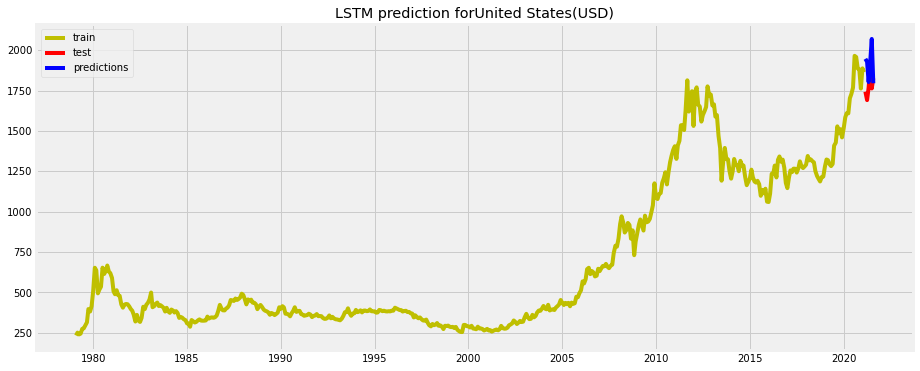

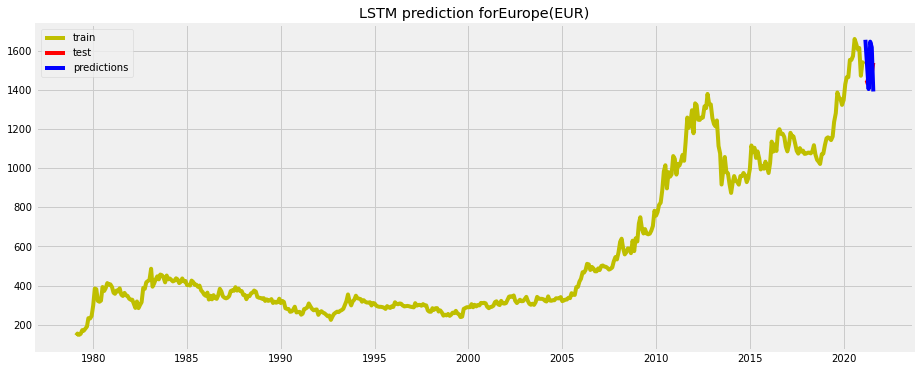

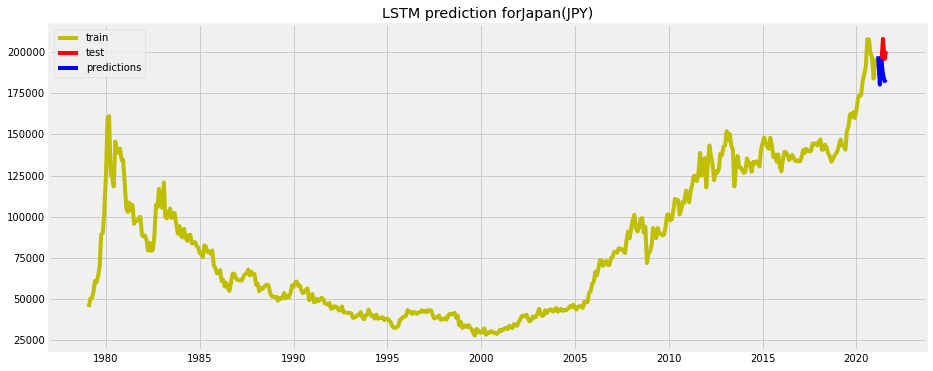

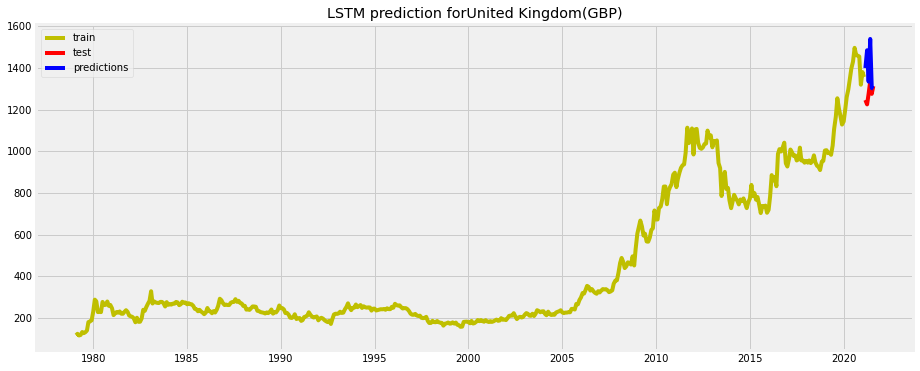

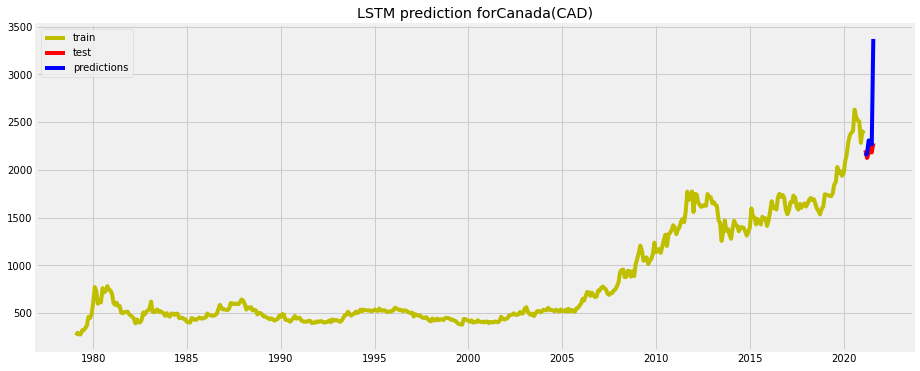

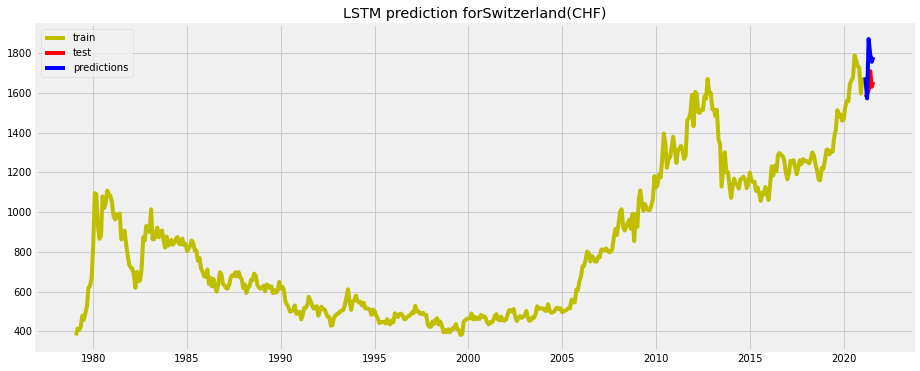

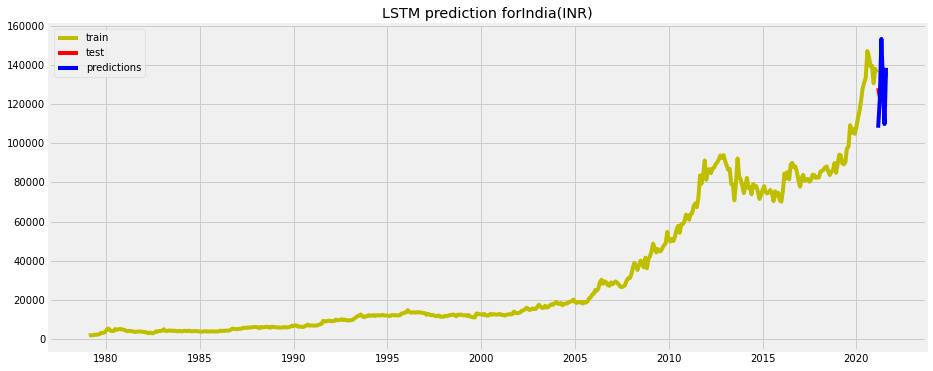

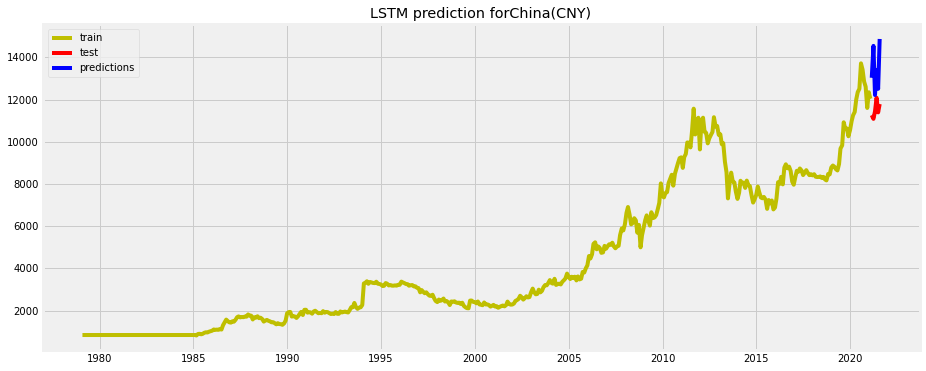

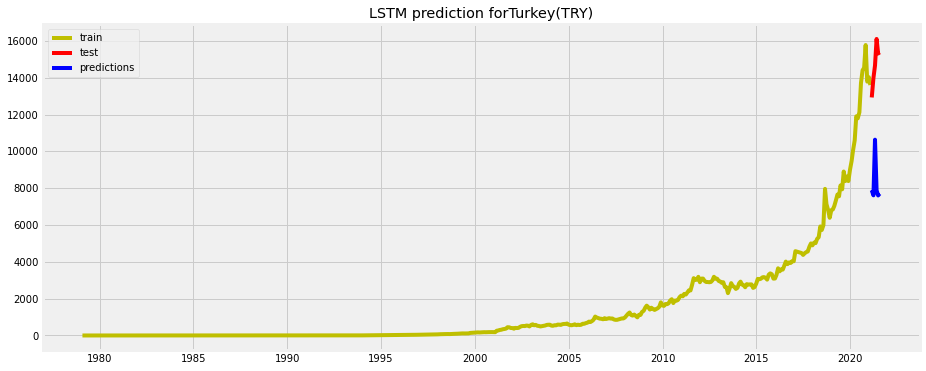

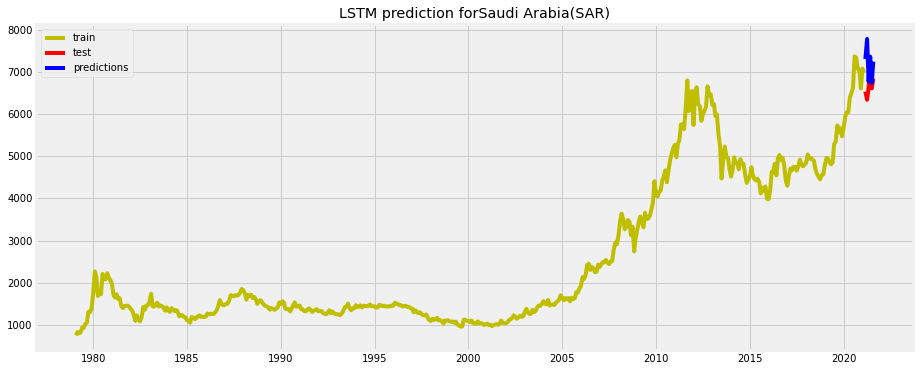

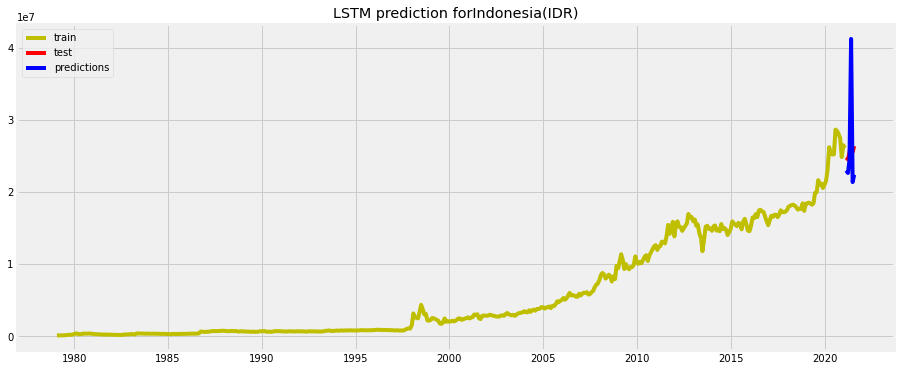

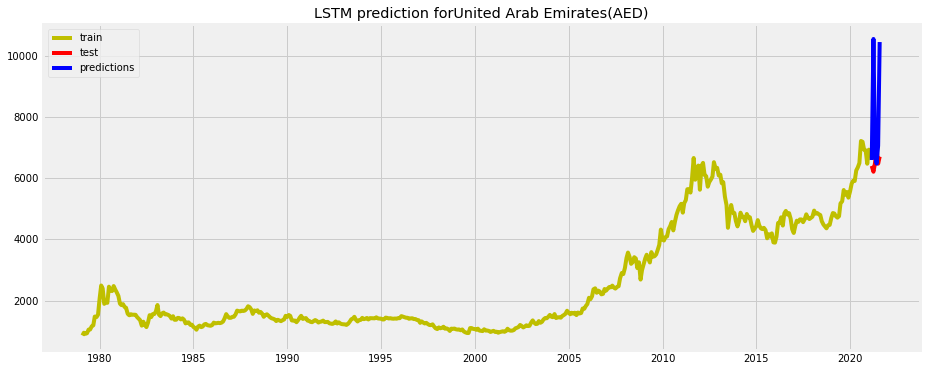

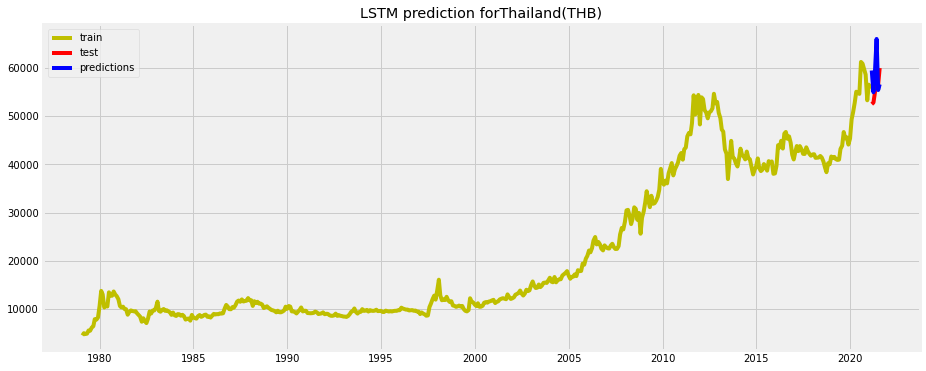

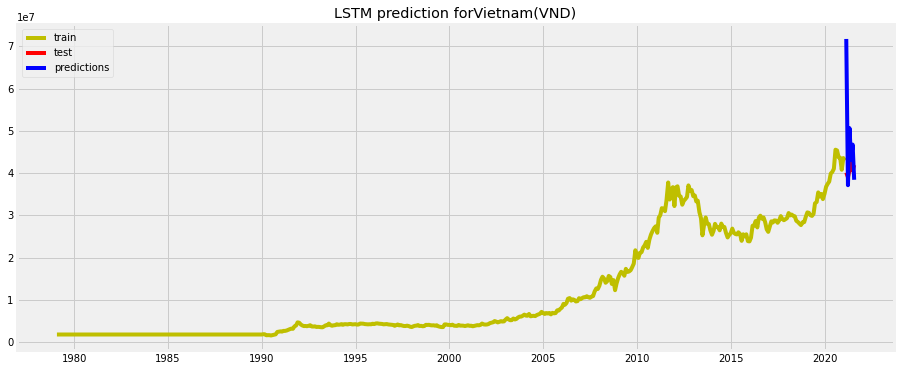

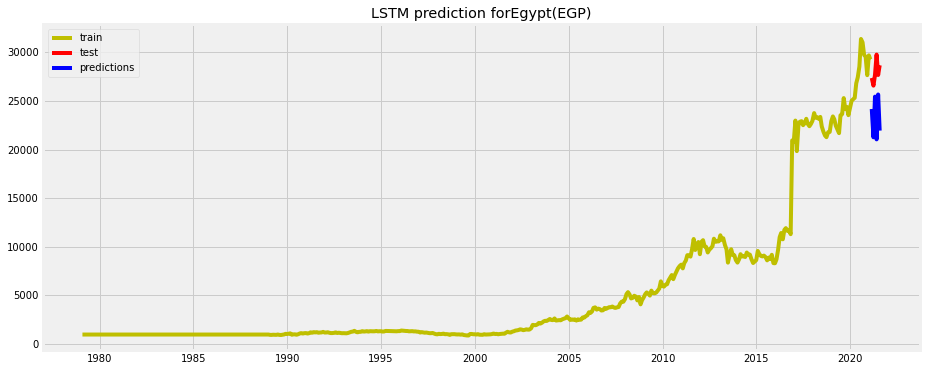

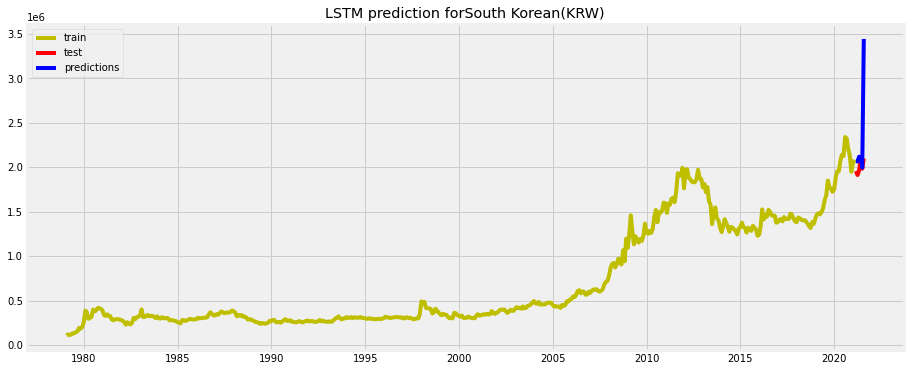

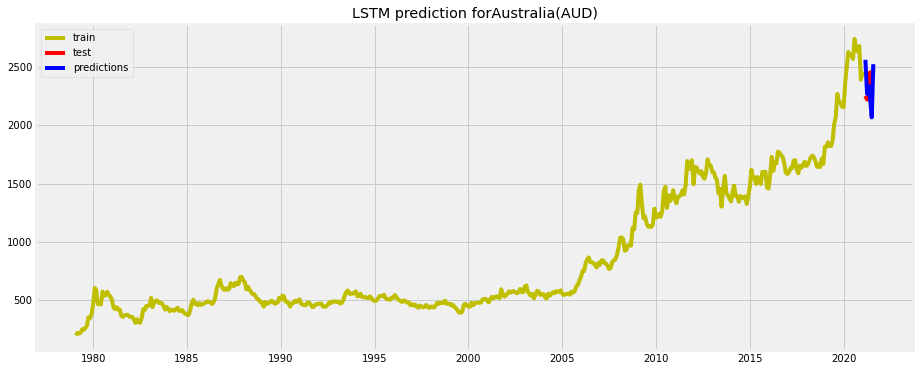

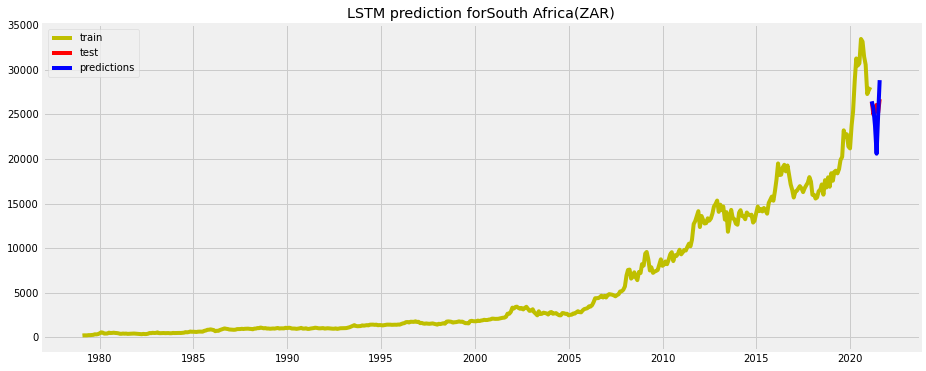

In [333]:
# Visulization
for col in gold_price.columns:
    fig = plt.figure(figsize=(14,6))
    fig.add_subplot()
    plt.plot(X_train_vis[col], 'y-', label='train')
    plt.plot(X_test_vis[col], 'r-', label='test')
    plt.plot(pred_df[col], 'b-', label='predictions')
    plt.title("LSTM prediction for"+col)
    plt.legend(loc='best')
    plt.show(block=False)

In [335]:
LSTM_MSE_RMSE = MSE_RMSE_evaluation(LSTM_pred)
LSTM_MAE = MAE_evaluation(LSTM_pred)
LSTM_Rsquare = R_square_evaluation(LSTM_pred)

In [334]:
LSTM_pred

United States(USD)  Europe(EUR)     Japan(JPY)  \
Date                                                         
2021-02-26         1946.497925  1657.486572  197346.031250   
2021-03-31         1928.236328  1524.602905  180133.546875   
2021-04-30         1802.954712  1405.327148  194451.546875   
2021-05-31         1928.440674  1647.860596  186578.265625   
2021-06-30         2069.517578  1618.977783  182221.906250   
2021-07-30         1795.312988  1393.097900  183212.562500   

            United Kingdom(GBP)  Canada(CAD)  Switzerland(CHF)     India(INR)  \
Date                                                                            
2021-02-26          1400.240601  2147.008545       1677.443359  107850.554688   
2021-03-31          1485.446167  2176.067627       1571.452637  122489.414062   
2021-04-30          1334.981689  2308.944092       1870.404053  153151.296875   
2021-05-31          1539.795166  2279.161133       1793.625732  130141.203125   
2021-06-30          1304.871582  2268.122559       1755.507324  109699.492188   
2021-07-30          1300.919556  3371.746826       1779.460693  138401.453125   

              China(CNY)   Turkey(TRY)  Saudi Arabia(SAR)  Indonesia(IDR)  \
Date                                                                        
2021-02-26  13031.628906   7889.033203        7311.491211      23013100.0   
2021-03-31  14542.197266   7613.060547        7785.375977      22678368.0   
2021-04-30  12214.184570  10634.209961        6776.661133      24494258.0   
2021-05-31  13404.864258   7883.423828        7365.297852      41263464.0   
2021-06-30  12508.382812   7606.074219        6743.674805      21416816.0   
2021-07-30  14869.981445   7703.611328        7246.985352      22427044.0   

            United Arab Emirates(AED)  Thailand(THB)  Vietnam(VND)  \
Date                                                                 
2021-02-26                6595.154297   59497.218750    71744864.0   
2021-03-31               10554.187500   54987.500000    37137348.0   
2021-04-30                6822.476562   59430.492188    50632560.0   
2021-05-31                6476.580078   66042.296875    43197332.0   
2021-06-30                7065.975586   55449.468750    46743484.0   
2021-07-30               10453.361328   56629.929688    38418992.0   

              Egypt(EGP)  South Korean(KRW)  Australia(AUD)  South Africa(ZAR)  
Date                                                                            
2021-02-26  24172.121094         2069257.50     2561.086914       26465.447266  
2021-03-31  21261.759766         2066998.25     2269.540771       25634.009766  
2021-04-30  25444.605469         2119663.00     2337.330322       23715.529297  
2021-05-31  21050.746094         2114004.00     2218.171143       20587.931641  
2021-06-30  25666.558594         1996391.75     2067.484619       24885.000000  
2021-07-30  21950.109375         3444618.50     2523.421387       28840.630859

reference: https://www.tensorflow.org/tutorials/structured_data/time_series#recurrent_neural_network

### Prophet <a name="Prophet"></a>

In [379]:
from fbprophet import Prophet

In [380]:

def prophet_forecasting(col, test_size=6):
    # split data
    y_train, y_test, _, _, = timeseries_train_test_split(gold_price[col], test_size=test_size, X=[])
    y_train_new = y_train.to_frame(name='y')
    y_train_new.index.names = ['ds']
    y_train_new = y_train_new.reset_index()
    
    # fit model
    model = Prophet() # 
    model.fit(y_train_new)
    
    # predict
    future = y_test.reset_index().rename(columns={'Date': 'ds'})
    forecast = model.predict(future)
    forecast = forecast[['ds','yhat']].rename(columns={'ds': 'Date', 'yhat':'prediction'}).set_index('Date')
    
    # visulize
    plt.figure(figsize=(14,6))
    plt.plot(forecast)
    plt.plot(y_test)
    plt.plot(y_train)
    plt.legend(['forecast','testing', 'training'])
    plt.title("Prophet prediction for"+col)
    plt.show()

    return forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


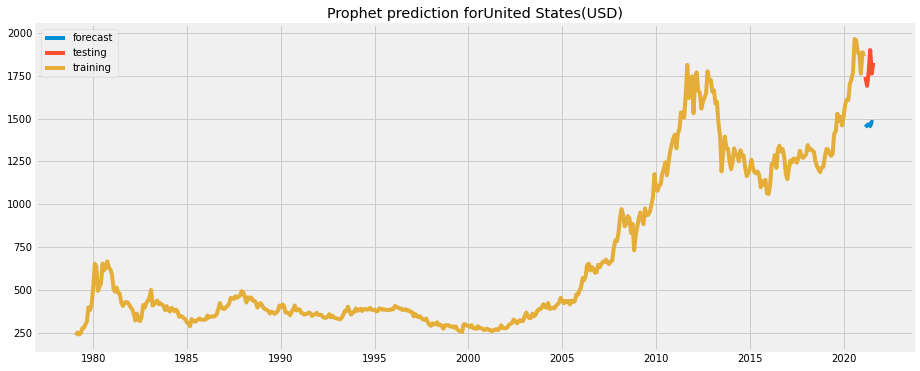

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


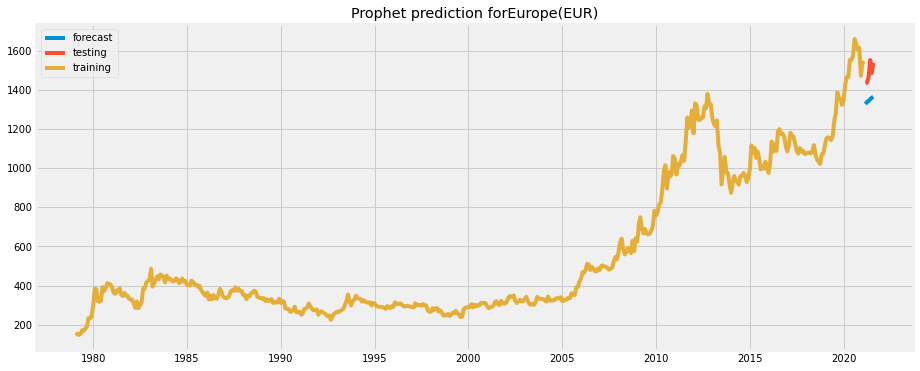

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


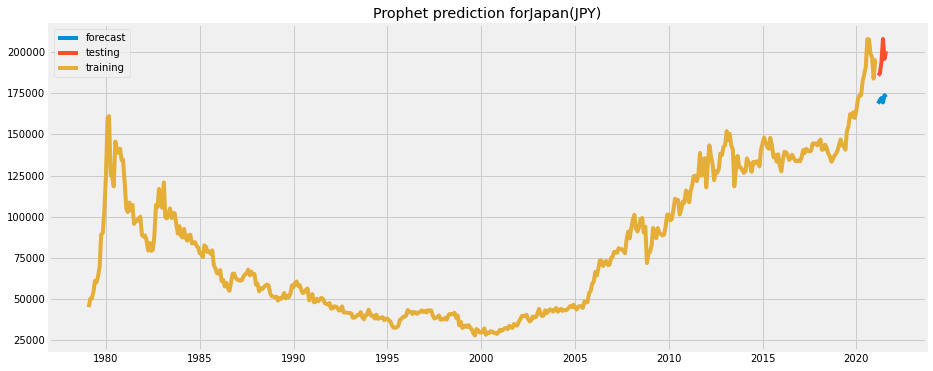

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


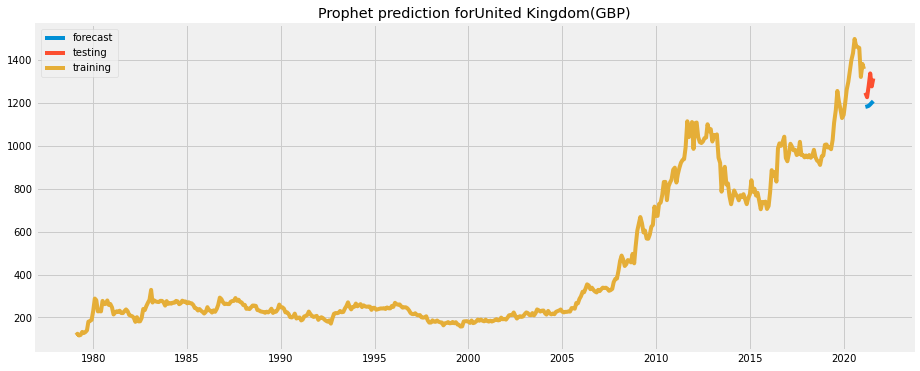

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


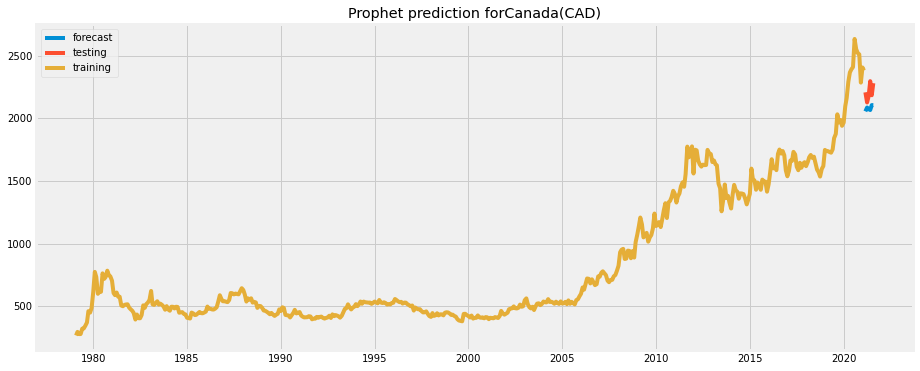

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


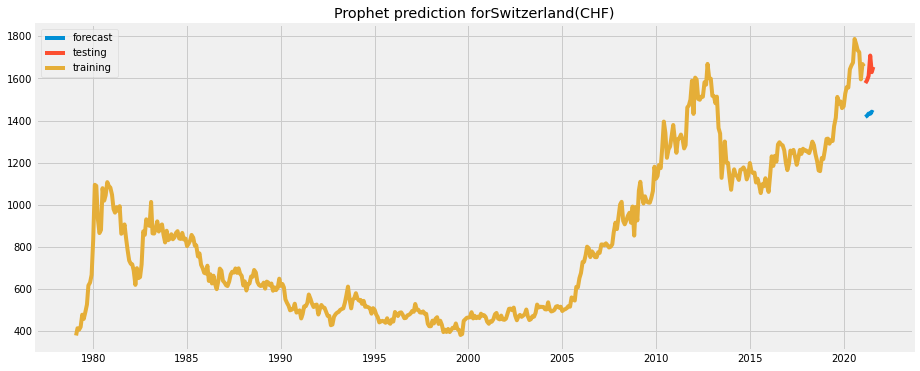

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


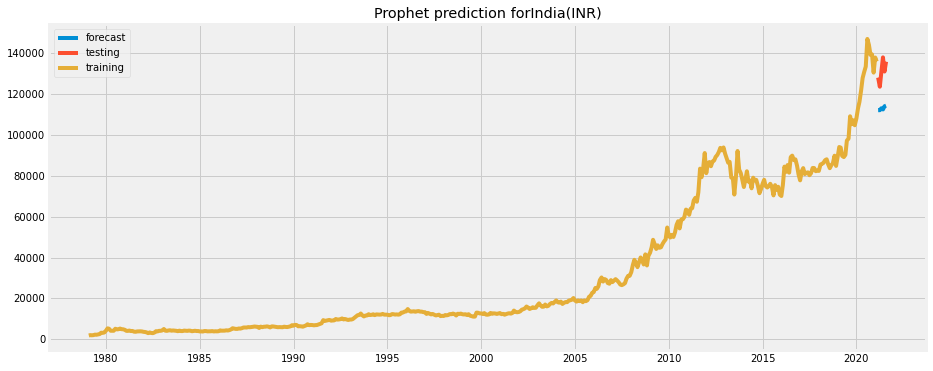

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


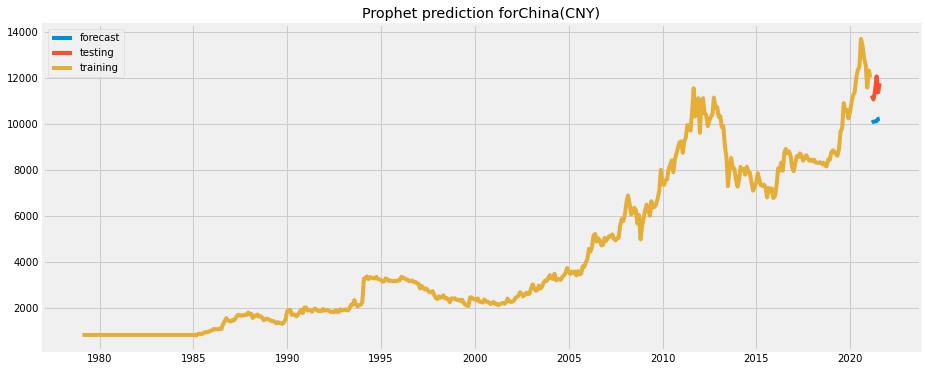

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


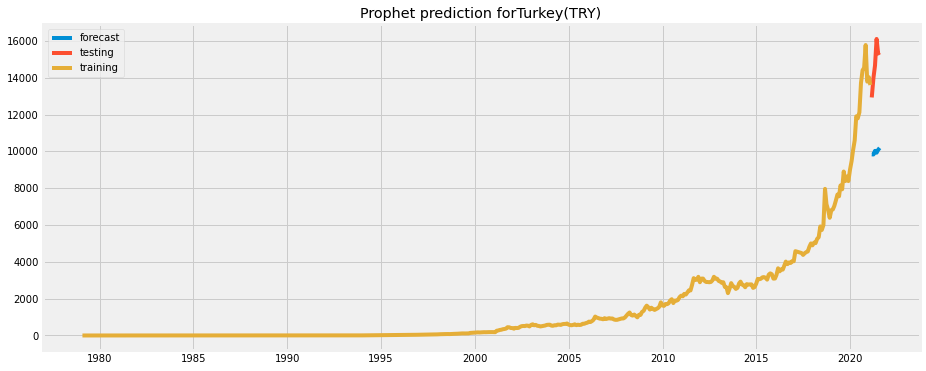

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


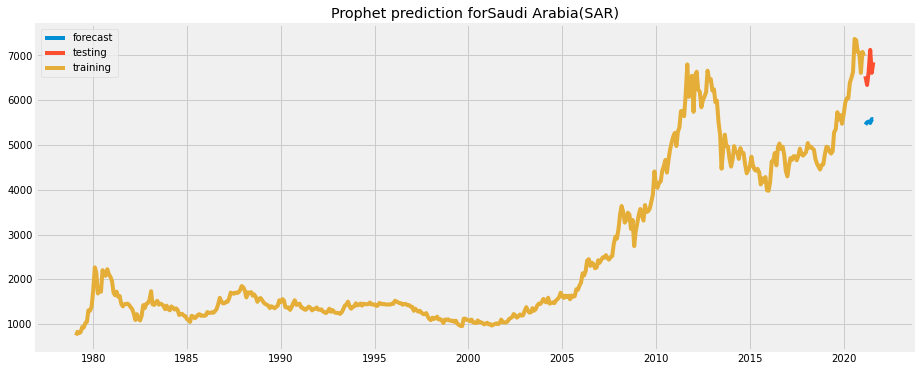

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


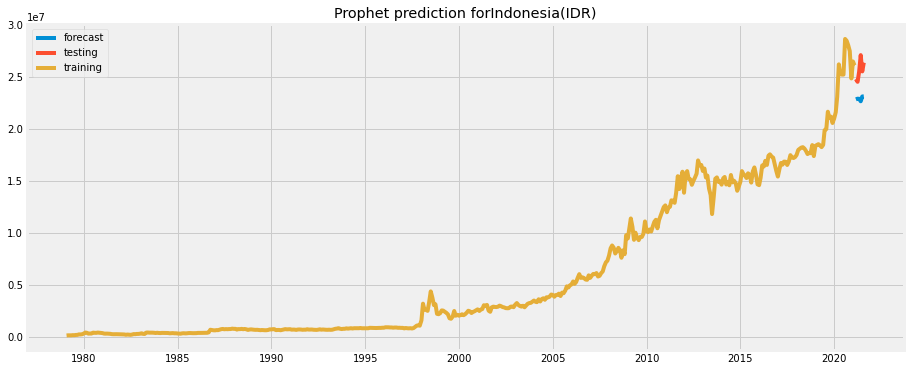

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


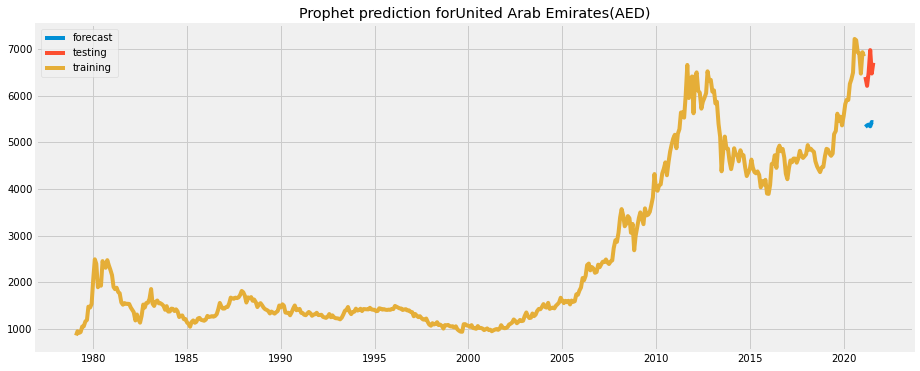

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


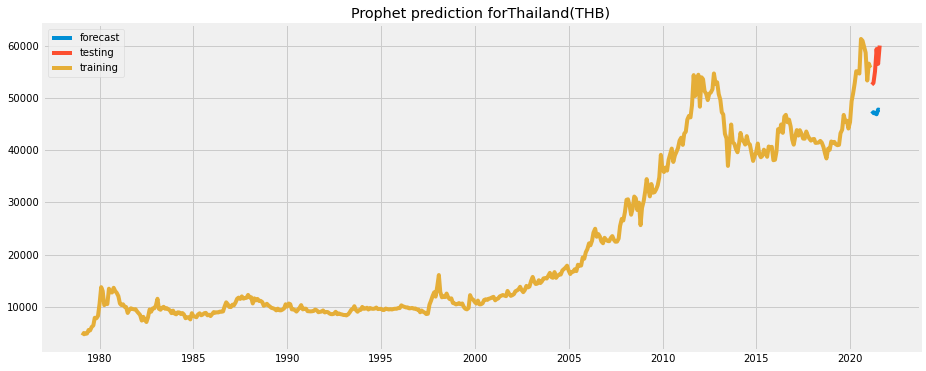

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


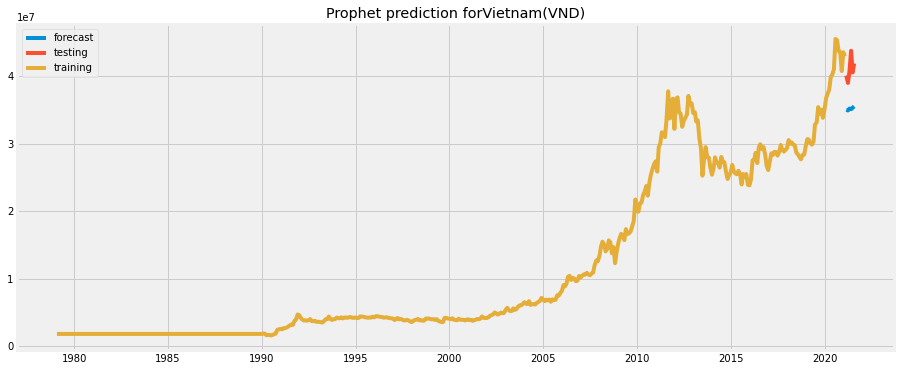

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


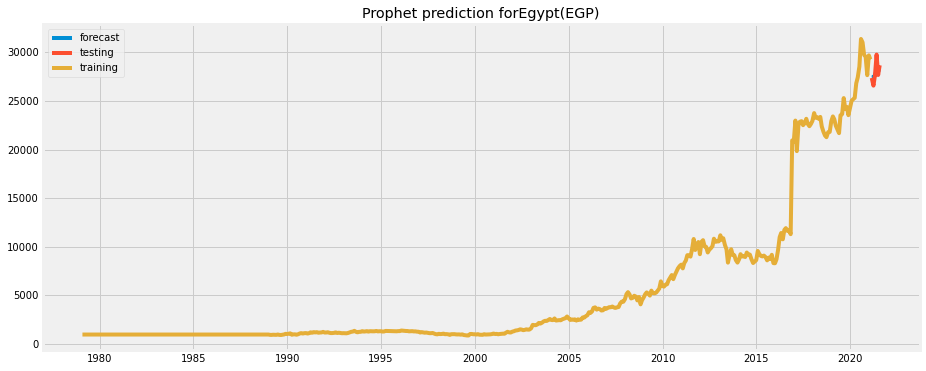

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


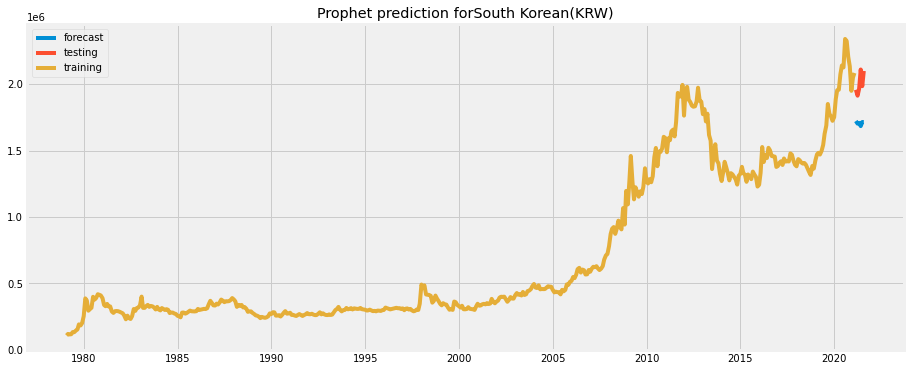

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


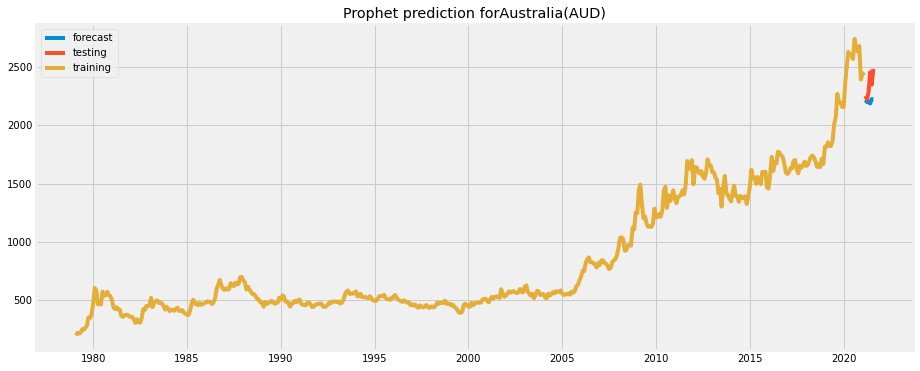

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


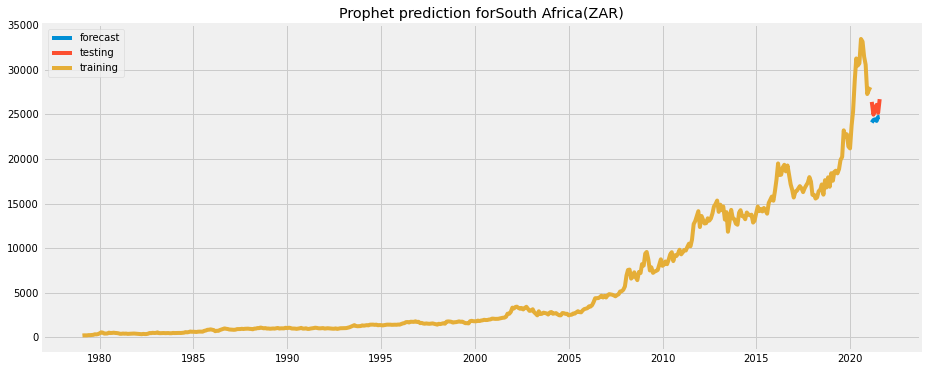

In [381]:
prophet_pred = []
for col in gold_price.columns:
    col_pred = prophet_forecasting(col).values.reshape(-1)
    prophet_pred.append(col_pred)

In [339]:

def prophet_forecasting(col, test_size=6, drop_size=400):
    # split data
    y_train, y_test, _, _, = timeseries_train_test_split(gold_price[col], test_size=test_size, X=[])
    y_train_new = y_train.to_frame(name='y')
    y_train_new.index.names = ['ds']
    y_train_new = y_train_new.reset_index()
    
    # fit model
    model = Prophet() # 
    model.fit(y_train_new)
    
    # predict
    future = y_test.reset_index().rename(columns={'Date': 'ds'})
    forecast = model.predict(future)
    forecast = forecast[['ds','yhat']].rename(columns={'ds': 'Date', 'yhat':'prediction'}).set_index('Date')
    
    # visulize
    plt.figure(figsize=(14,6))
    plt.plot(forecast)
    plt.plot(y_test)
    plt.plot(y_train)
    plt.legend(['forecast','testing', 'training'])
    plt.title("Prophet prediction for"+col)
    plt.show()

    return forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


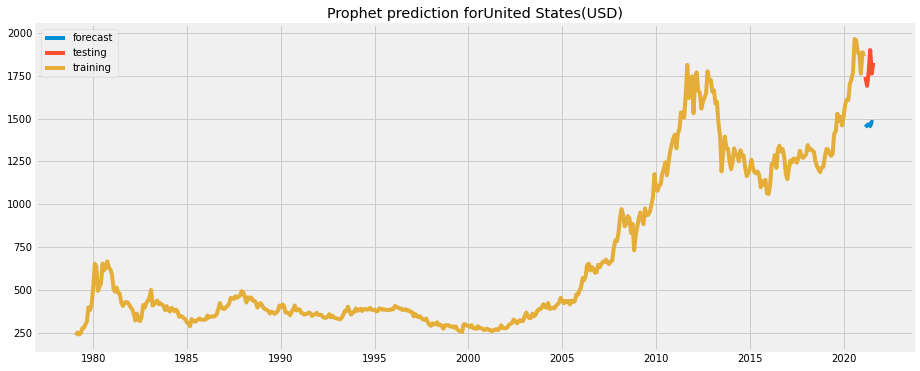

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


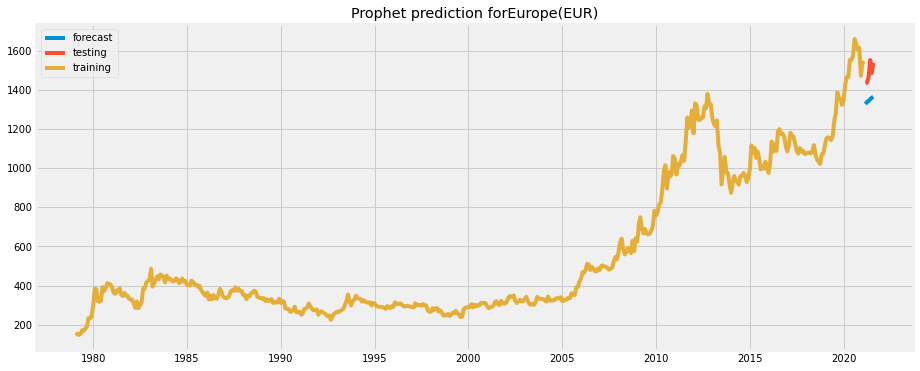

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


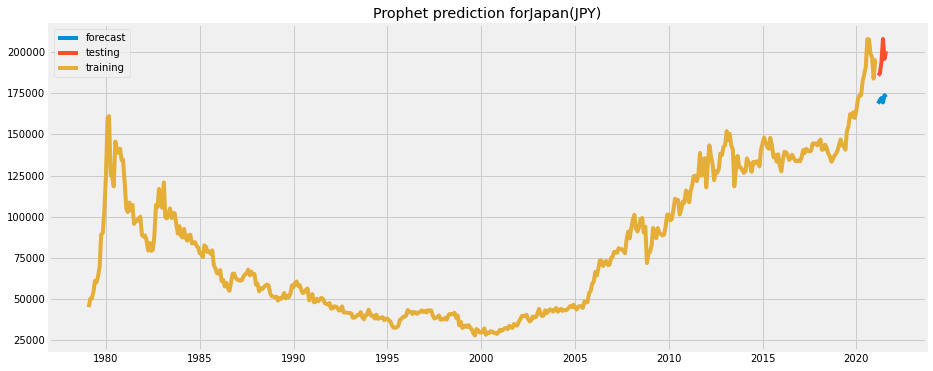

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


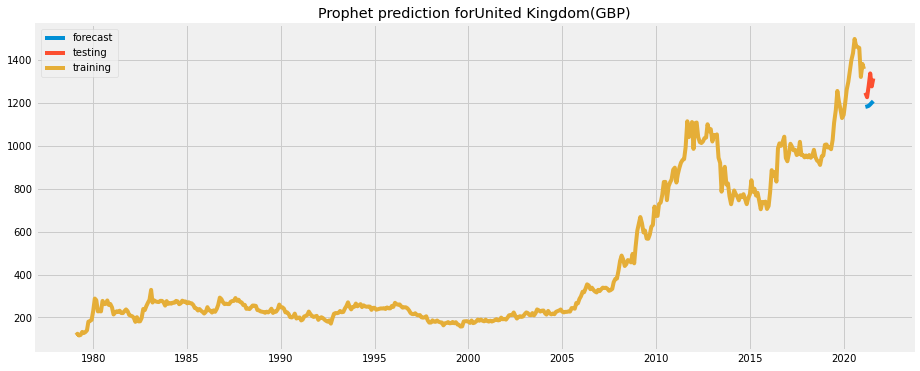

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


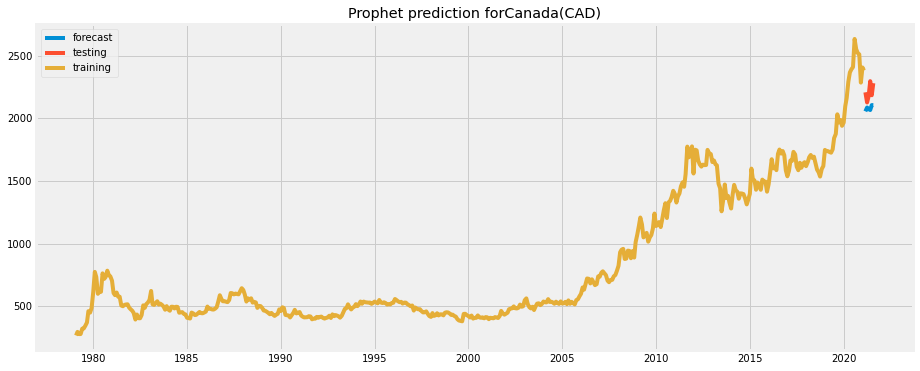

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


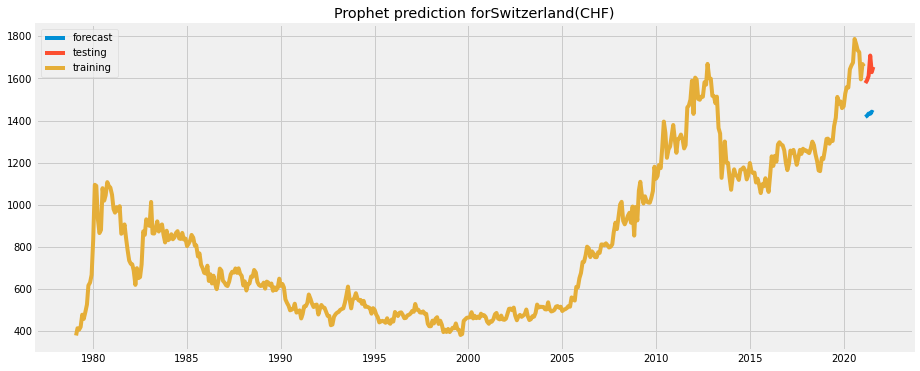

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


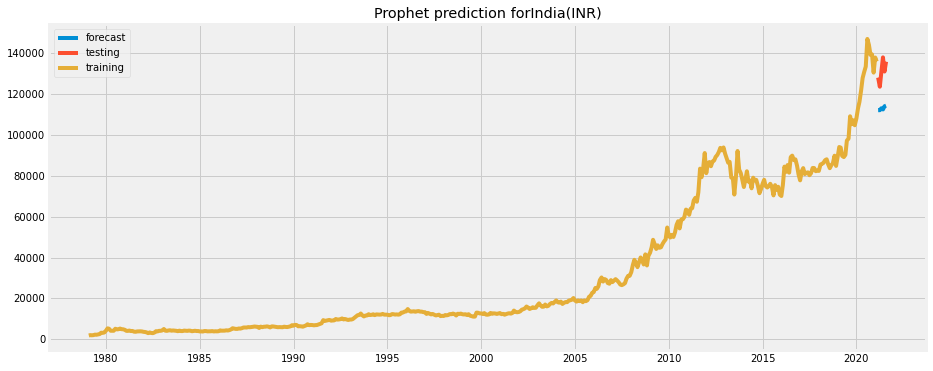

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


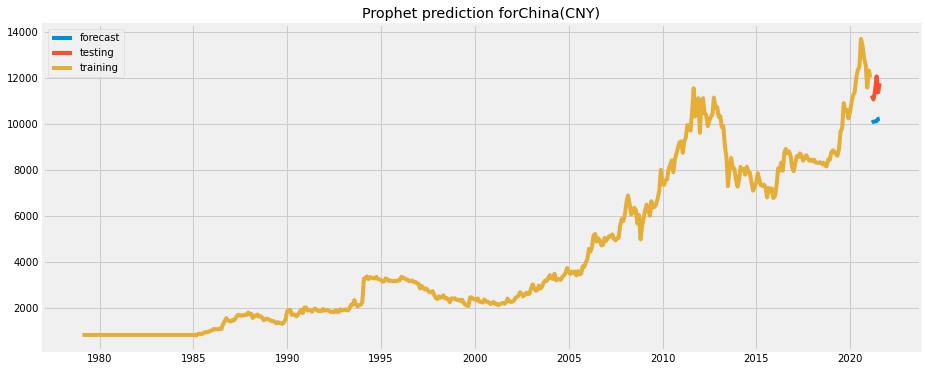

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


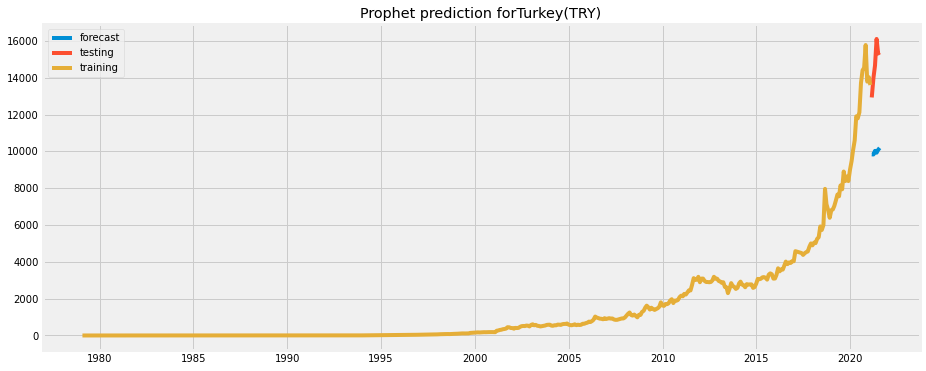

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


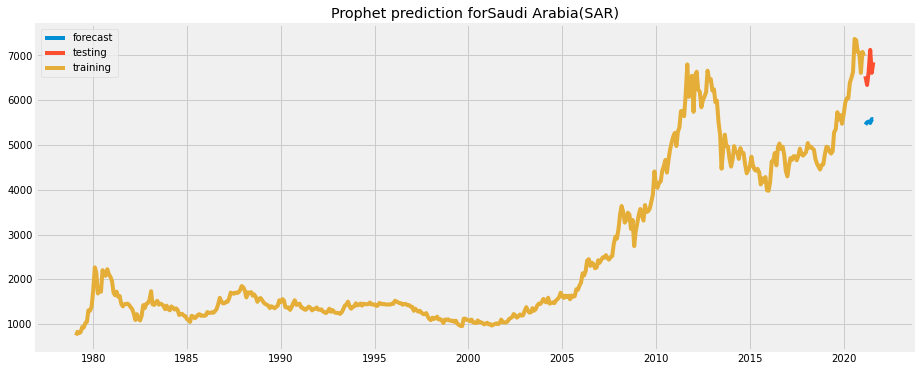

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


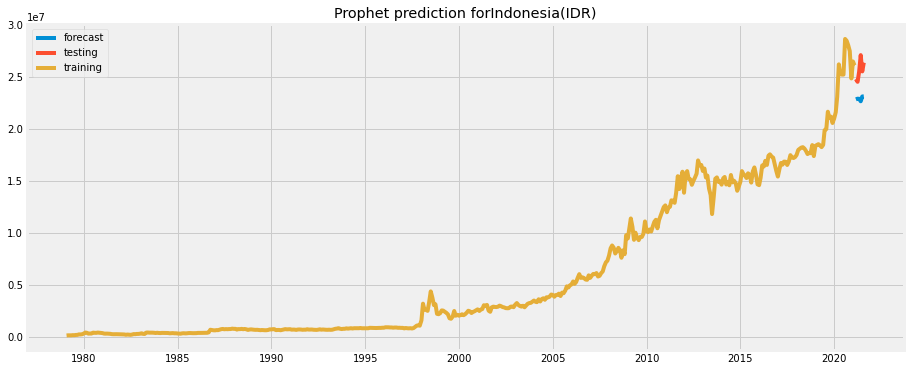

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


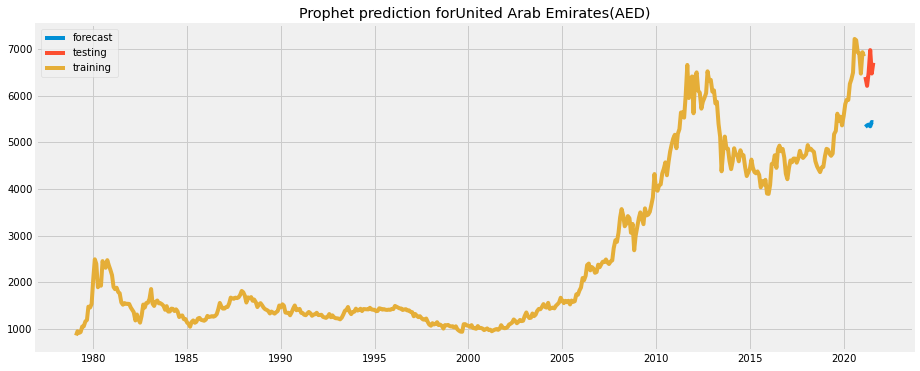

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


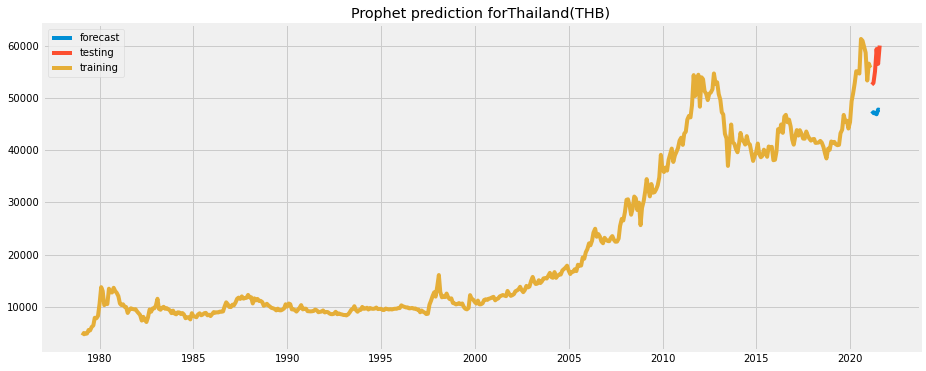

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


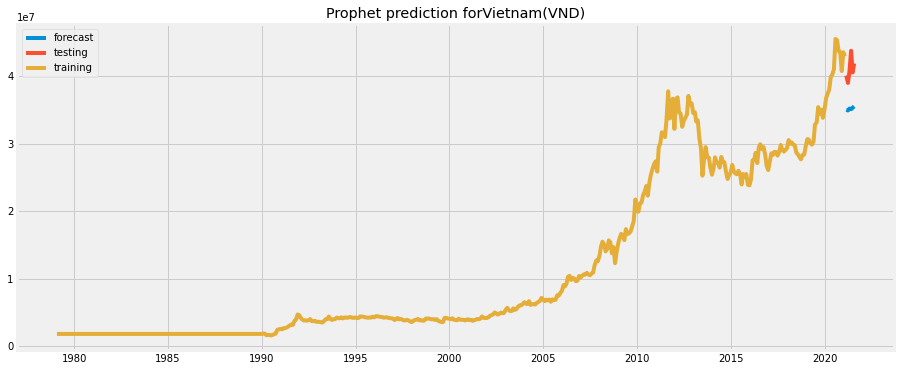

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


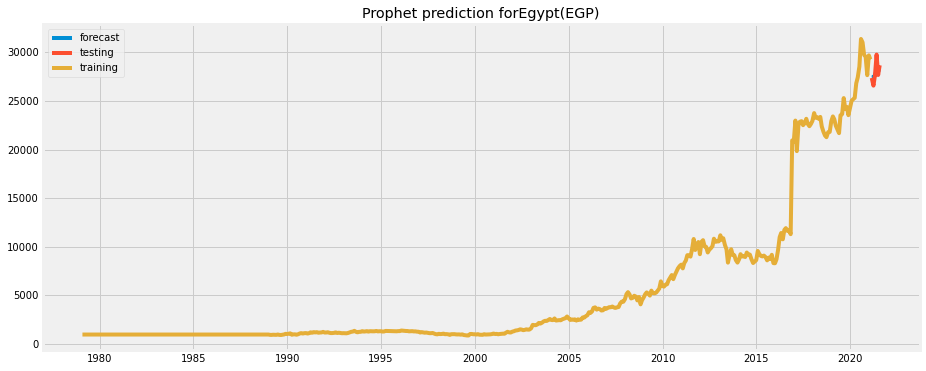

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


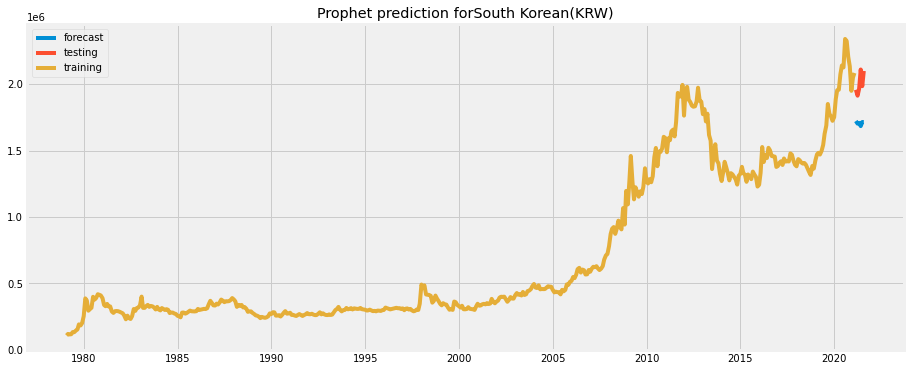

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


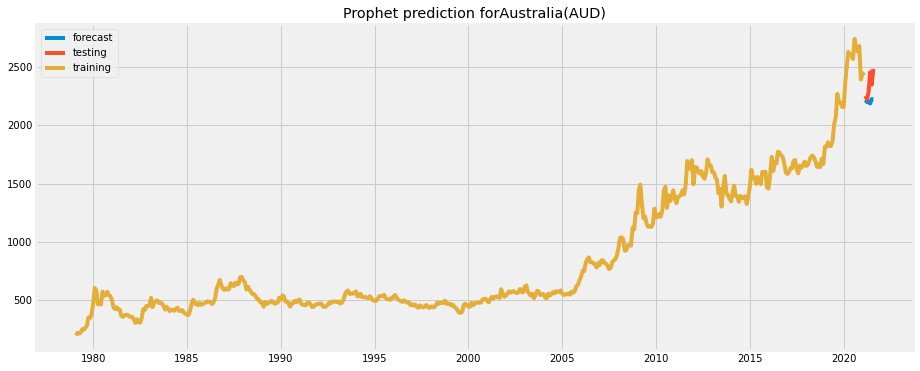

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


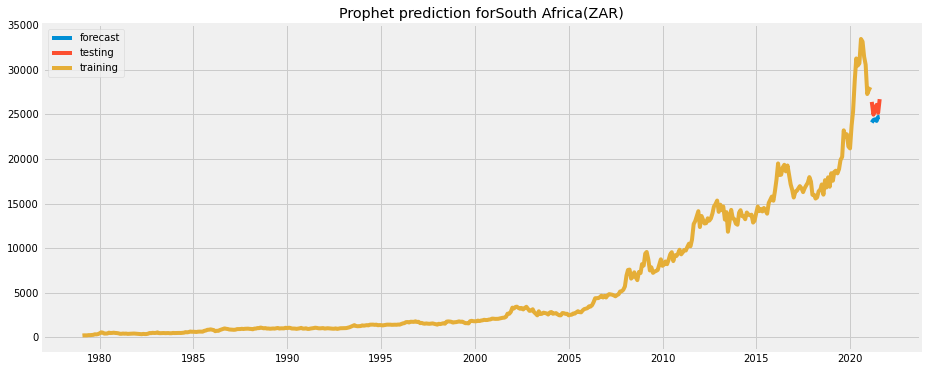

In [340]:
prophet_pred = []
for col in gold_price.columns:
    col_pred = prophet_forecasting(col)
    prophet_pred.append(col_pred)

In [382]:
test_size = 6
test_df = gold_price[-test_size:]
prophet_pred = np.asarray(prophet_pred).T
Prophet_pred = pd.DataFrame(prophet_pred, columns = test_df.columns)
Prophet_pred = Prophet_pred.set_index(test_df.index[test_df.shape[0]-test_size:]) 

In [383]:
Prophet_MSE_RMSE = MSE_RMSE_evaluation(Prophet_pred)
Prophet_MAE = MAE_evaluation(Prophet_pred)
Prophet_Rsquare = R_square_evaluation(Prophet_pred)

In [384]:
Prophet_pred

United States(USD)  Europe(EUR)     Japan(JPY)  \
Date                                                         
2021-02-26         1449.931378  1328.865120  168575.058591   
2021-03-31         1461.019219  1339.123710  170718.454762   
2021-04-30         1466.266060  1344.901096  171973.917124   
2021-05-31         1456.307869  1352.930979  169358.692762   
2021-06-30         1481.076411  1360.841413  173726.873322   
2021-07-30         1478.595180  1365.444369  172511.441952   

            United Kingdom(GBP)  Canada(CAD)  Switzerland(CHF)     India(INR)  \
Date                                                                            
2021-02-26          1180.691234  2054.624459       1416.895806  112117.942101   
2021-03-31          1182.756751  2085.191686       1423.028494  112141.258272   
2021-04-30          1185.364673  2072.297991       1433.103759  113071.484530   
2021-05-31          1192.224706  2065.319365       1432.250404  112502.593337   
2021-06-30          1200.052002  2104.704450       1441.963577  114045.356306   
2021-07-30          1207.323008  2103.868327       1437.583392  114345.329877   

              China(CNY)   Turkey(TRY)  Saudi Arabia(SAR)  Indonesia(IDR)  \
Date                                                                        
2021-02-26  10075.280315   9838.149752        5455.336870    2.287540e+07   
2021-03-31  10121.900265   9830.950329        5507.093367    2.293616e+07   
2021-04-30  10125.572237  10028.951917        5523.233193    2.292702e+07   
2021-05-31  10139.584049   9927.981562        5492.390710    2.268862e+07   
2021-06-30  10239.070643  10083.311691        5579.068728    2.315026e+07   
2021-07-30  10257.601325  10187.843183        5577.228993    2.316334e+07   

            United Arab Emirates(AED)  Thailand(THB)  Vietnam(VND)  \
Date                                                                 
2021-02-26                5330.576631   46915.920823  3.502361e+07   
2021-03-31                5363.480790   47255.604394  3.494168e+07   
2021-04-30                5379.756432   47036.001033  3.521605e+07   
2021-05-31                5343.108275   46856.197046  3.512559e+07   
2021-06-30                5435.870646   47756.316108  3.534507e+07   
2021-07-30                5430.089315   47693.024265  3.554380e+07   

              Egypt(EGP)  South Korean(KRW)  Australia(AUD)  South Africa(ZAR)  
Date                                                                            
2021-02-26  27412.234221       1.722945e+06     2191.096373       24089.132166  
2021-03-31  27430.159300       1.703619e+06     2207.727013       24374.153541  
2021-04-30  27654.042676       1.708571e+06     2195.721251       24442.386099  
2021-05-31  28125.771449       1.684875e+06     2187.060881       24265.101630  
2021-06-30  28119.536434       1.715480e+06     2224.439803       24704.473107  
2021-07-30  28246.186862       1.715225e+06     2222.227750       24732.189101

### Boosting <a name="Boosting"></a>

For boosting method, I will convert the time series forecasting problem in a regression problem and use XGBT as the model to solve this problem. In the previous chapter I extract the time series features and in this method I will use those features that can dadicately describe the time series as the input features for the XGBT model.

Meanwhile, I use sliding window method to turncut the time series and utilize this sliding window of sample to forecast the future one sample, and then move the window and do the similar thing.

In [216]:
# prepare melted rolling windows of dataframe for both training and testing that can apply feature extraction
gold_price_melt = pd.melt(gold_price, ignore_index=False)
gold_price_melt = gold_price_melt.reset_index()

data_df = gold_price
input_size = 6
test_size = 6

train_df_rolling = pd.DataFrame()
test_df_rolling = pd.DataFrame()
index = 0

for i in range(gold_price.shape[1]):
    for j in range(i*gold_price.shape[0], (i+1)*gold_price.shape[0]-window_size-test_size):
        if train_df_rolling.empty:
            train_df_rolling = gold_price_melt[:input_size]
            train_df_rolling['id'] = [index for t in range(input_size)]
            index += 1
            continue
        cur = gold_price_melt[j:j+input_size]
        cur['id'] = [index for t in range(input_size)]
        train_df_rolling = pd.concat([train_df_rolling, cur])
        index += 1
    for k in range((i+1)*gold_price.shape[0]-window_size-test_size, (i+1)*gold_price.shape[0]-window_size):
        if test_df_rolling.empty:
            test_df_rolling = gold_price_melt[gold_price.shape[0]-window_size-test_size:gold_price.shape[0]-window_size]
            test_df_rolling['id'] = [index for t in range(input_size)]
            index += 1
            continue
        cur = gold_price_melt[k:k+input_size]
        cur['id'] = [index for t in range(input_size)]
        test_df_rolling = pd.concat([test_df_rolling, cur])
        index += 1
        
train_df_rolling = train_df_rolling.drop(['variable'], axis=1)
test_df_rolling = test_df_rolling.drop(['variable'], axis=1)       

In [217]:
# Getting Comprehensive Features
train_features = extract_features(train_df_rolling, column_id="id", column_sort="Date", column_kind=None, column_value=None)
test_features = extract_features(test_df_rolling, column_id="id", column_sort="Date", column_kind=None, column_value=None)

columns = list(set(train_features.dropna(axis=1, how='any').columns).
               intersection(set(test_features.dropna(axis=1, how='any').columns)))
train_features = train_features[columns]
test_features = test_features[columns]

Feature Extraction:   0%|                                                                       | 0/20 [00:00<?, ?it/s]

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\py

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\py

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_co

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_co

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\py

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\py

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_co

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_co

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\py

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 3921, in <genexpr>
    for ta, input_ in zip(input_ta, flatted_inputs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\py

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_co

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\ops\tensor_array_ops.py", line 1149, in unstack
    return self._implementation.unstack(value, name=name)  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_core\python\util\tf_should_use.py", line 198, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))  File "C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\tensorflow_co

In [218]:
# Getting prediction target value for both training and testing dataset
data_df = gold_price
window_size = 6
test_size = 6

train_target_rolling = []
test_target_rolling = []

for col in gold_price.columns:
    train_target_rolling.extend(gold_price[col][window_size:gold_price.shape[0]-test_size])
    test_target_rolling.extend(gold_price[col][gold_price.shape[0]-test_size:])


In [219]:
import xgboost as xgb

# create an xgboost regression model
XGBmodel = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, enable_categorical=True)
XGBmodel.fit(train_features, train_target_rolling)
y_pred_xgbt = XGBmodel.predict(test_features)

[22:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "enable_categorical" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [220]:
y_pred_xgbt = np.asarray(y_pred_xgbt).reshape([gold_price.shape[1],test_size]).T

y_target_df = gold_price[-test_size:]

y_pred_xgbt = pd.DataFrame(y_pred_xgbt, columns = y_target_df.columns)

y_pred_xgbt = y_pred_xgbt.set_index(y_target_df.index)

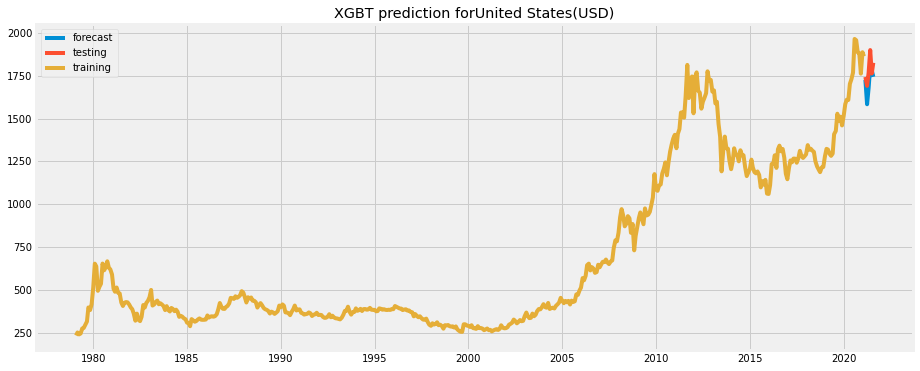

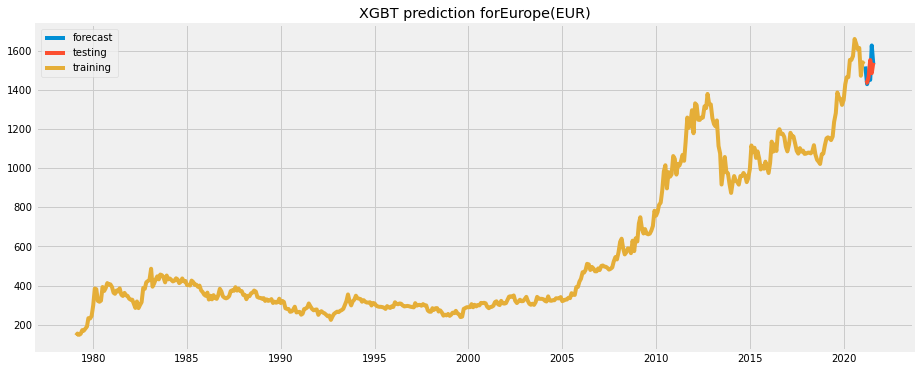

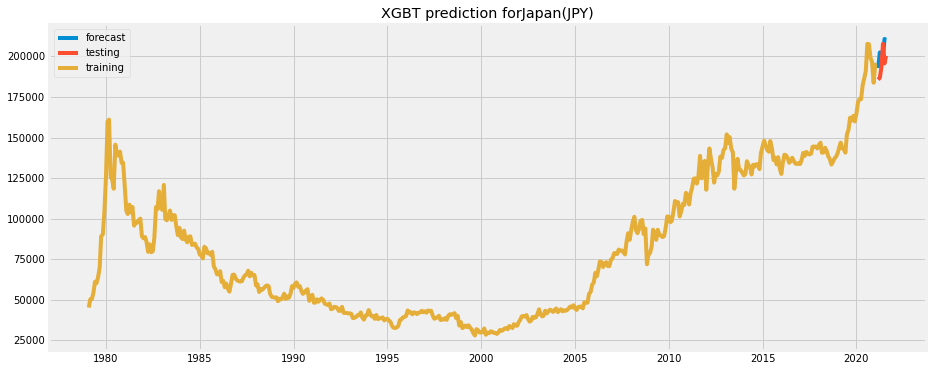

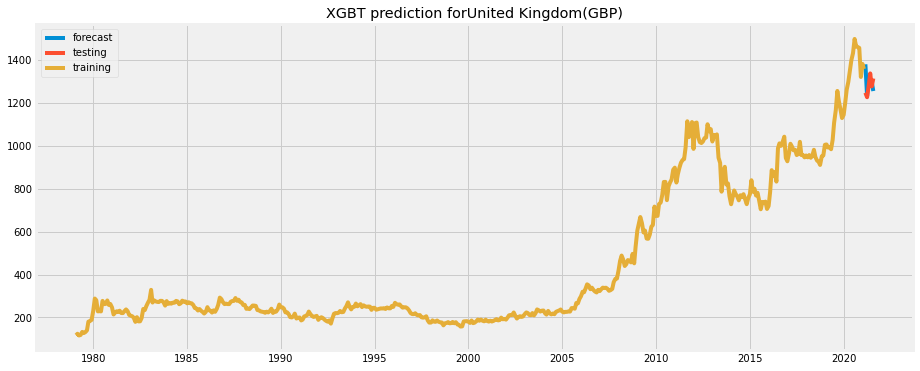

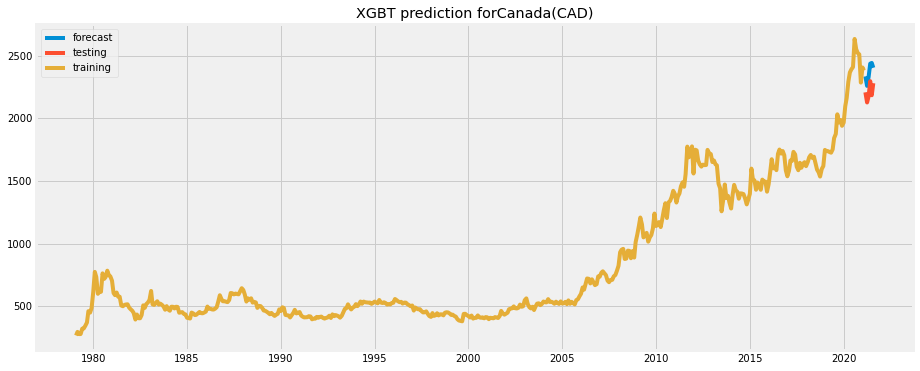

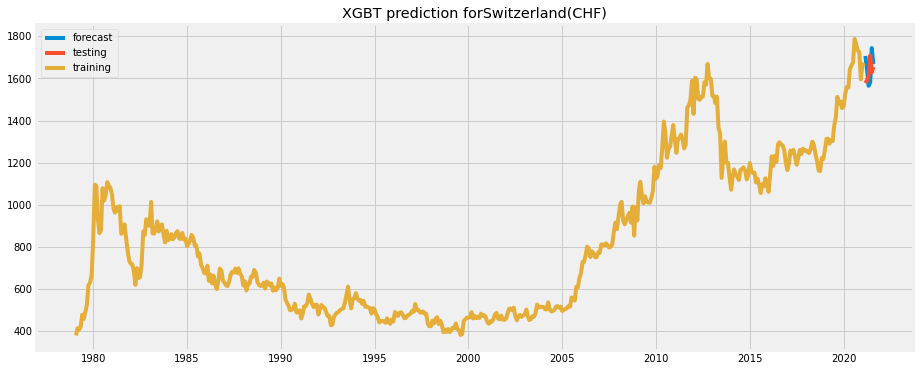

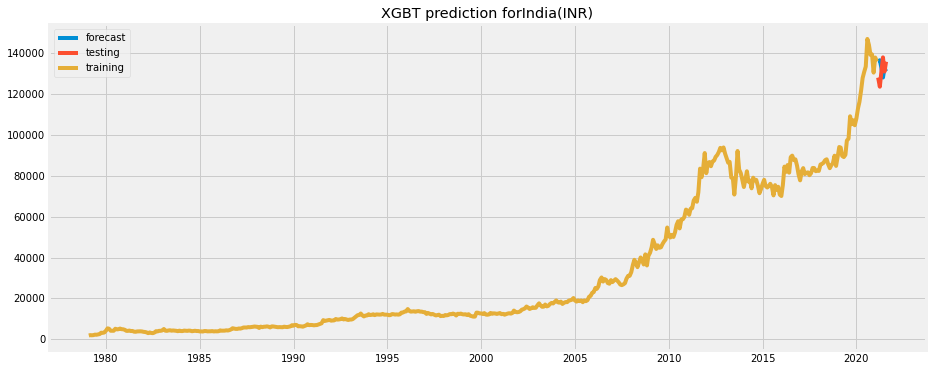

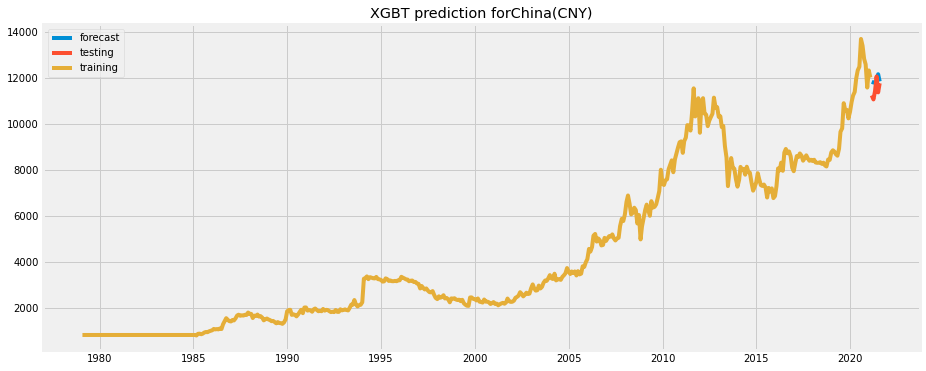

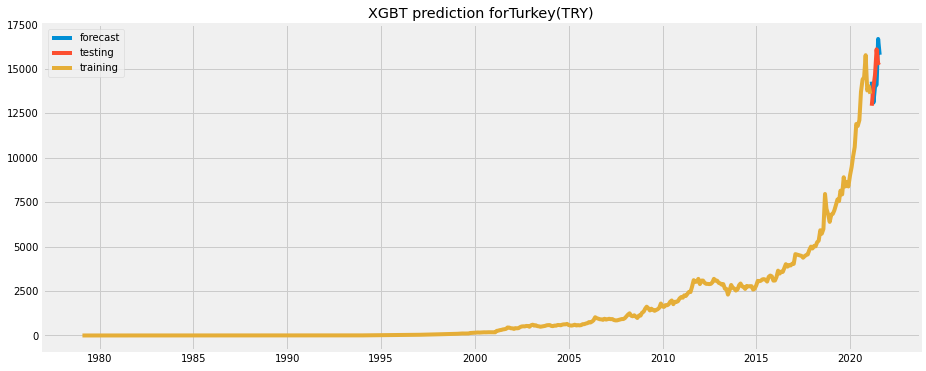

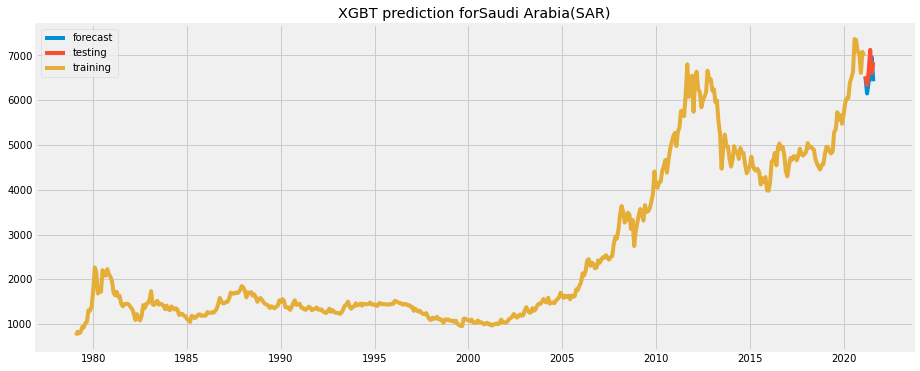

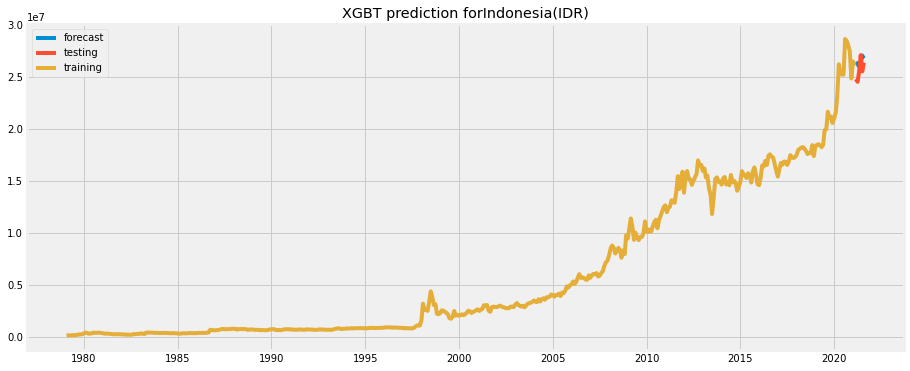

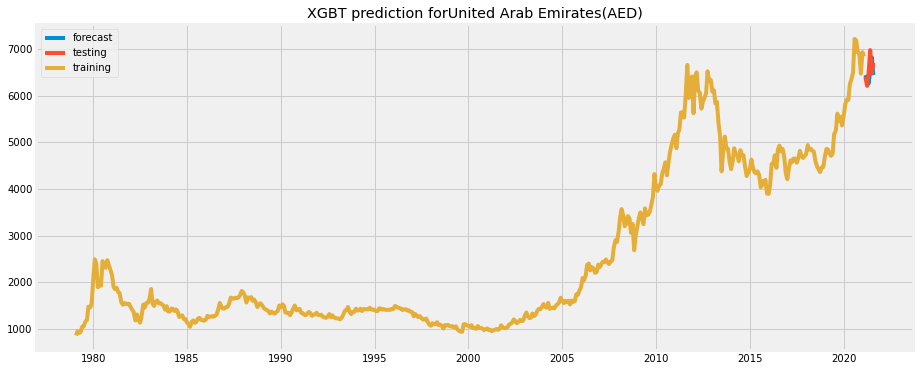

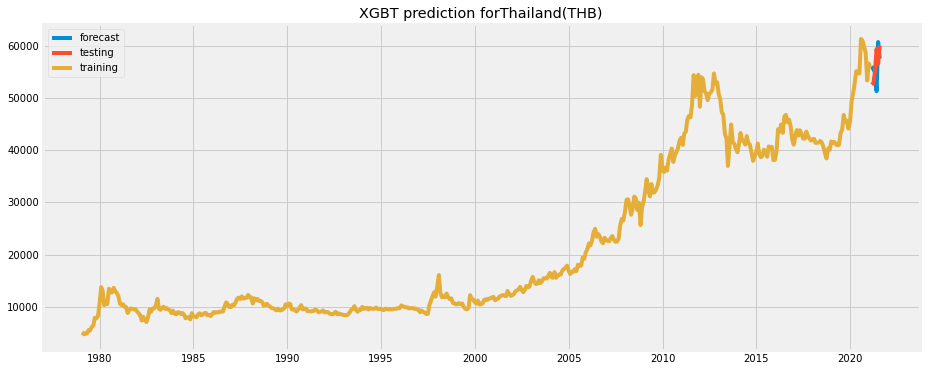

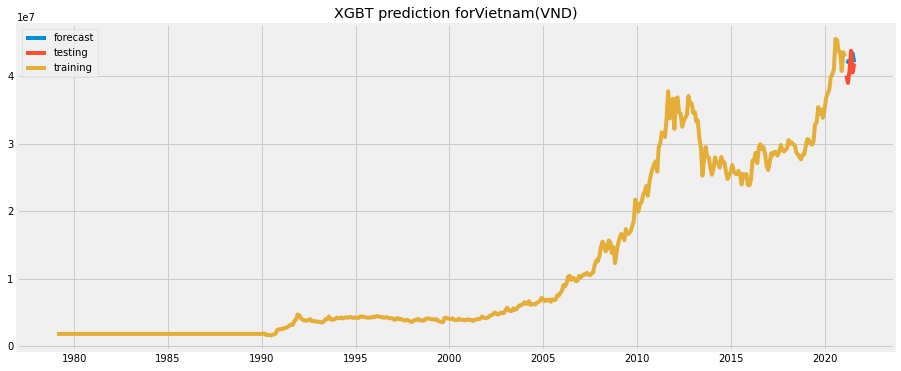

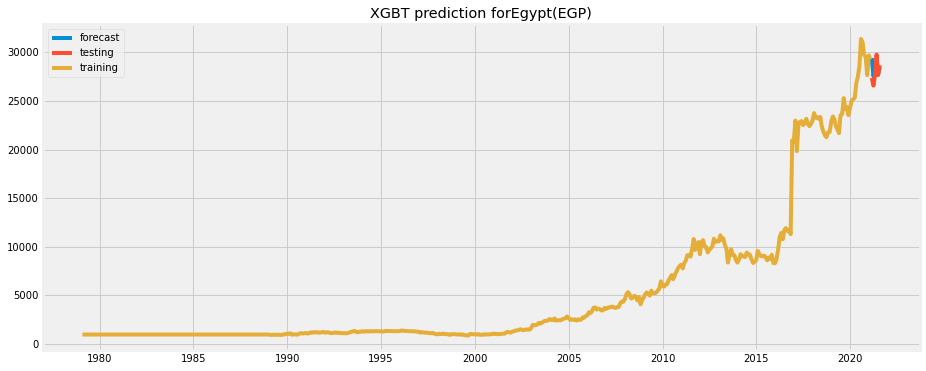

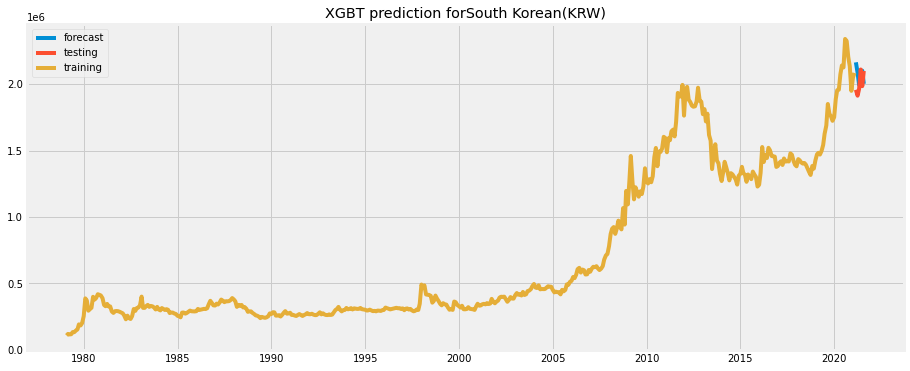

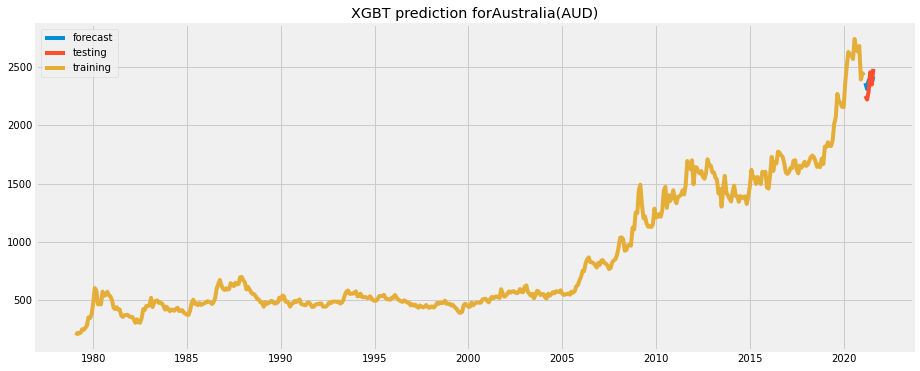

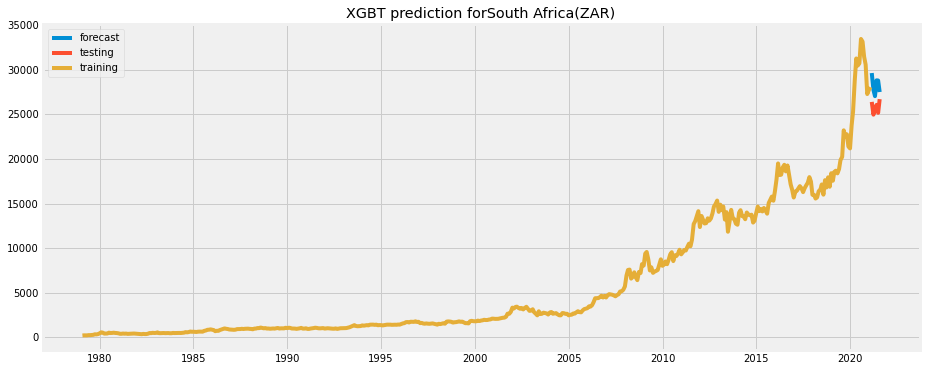

In [221]:
# Visualization 
for col in gold_price.columns:
    plt.figure(figsize=(14,6))
    plt.plot(y_pred_xgbt[col])
    plt.plot(y_target_df[col])
    plt.plot(gold_price[:gold_price.shape[0]-test_size][col])
    plt.legend(['forecast','testing', 'training'])
    plt.title("XGBT prediction for"+col)
    plt.show()

In [234]:
XGBT_pred = y_pred_xgbt

In [346]:
XGBT_MSE_RMSE = MSE_RMSE_evaluation(XGBT_pred)
XGBT_MAE = MAE_evaluation(XGBT_pred)
XGBT_Rsquare = R_square_evaluation(XGBT_pred)

In [344]:
XGBT_pred

United States(USD)  Europe(EUR)     Japan(JPY)  \
Date                                                         
2021-02-26         1725.653320  1521.191040  192832.687500   
2021-03-31         1583.816895  1430.416504  202486.703125   
2021-04-30         1679.380127  1461.218750  197725.765625   
2021-05-31         1805.374756  1452.348511  199949.078125   
2021-06-30         1782.547974  1628.423218  210771.515625   
2021-07-30         1743.743286  1531.796509  210281.640625   

            United Kingdom(GBP)  Canada(CAD)  Switzerland(CHF)     India(INR)  \
Date                                                                            
2021-02-26          1379.003540  2333.539551       1706.859497  135901.703125   
2021-03-31          1231.556519  2257.939941       1641.361328  136583.343750   
2021-04-30          1314.632446  2330.515625       1564.971680  133007.000000   
2021-05-31          1310.559937  2434.916992       1582.558472  128133.359375   
2021-06-30          1296.078857  2440.742676       1744.112305  132875.828125   
2021-07-30          1254.574707  2402.250977       1668.637329  131163.031250   

              China(CNY)   Turkey(TRY)  Saudi Arabia(SAR)  Indonesia(IDR)  \
Date                                                                        
2021-02-26  11850.896484  14286.668945        6524.730469      26471956.0   
2021-03-31  11820.801758  13105.776367        6151.958008      26259340.0   
2021-04-30  11825.246094  13993.821289        6406.903809      26015040.0   
2021-05-31  11830.143555  14111.587891        6563.750000      26411732.0   
2021-06-30  12181.194336  16688.041016        6956.828613      27092016.0   
2021-07-30  11870.017578  15799.087891        6423.803711      26812938.0   

            United Arab Emirates(AED)  Thailand(THB)  Vietnam(VND)  \
Date                                                                 
2021-02-26                6443.065918   56083.785156    42285988.0   
2021-03-31                6350.948730   55458.222656    42197236.0   
2021-04-30                6260.237305   54848.539062    41956124.0   
2021-05-31                6531.399414   51272.960938    42717760.0   
2021-06-30                6823.151367   60680.835938    43387656.0   
2021-07-30                6445.532715   57526.394531    42079076.0   

              Egypt(EGP)  South Korean(KRW)  Australia(AUD)  South Africa(ZAR)  
Date                                                                            
2021-02-26  29425.597656        2165086.500     2361.385986       29635.824219  
2021-03-31  27546.623047        2087034.500     2310.739502       27744.500000  
2021-04-30  28201.414062        1994410.000     2383.662598       27046.699219  
2021-05-31  29261.888672        2044558.625     2403.894287       28818.416016  
2021-06-30  27793.458984        2102397.000     2356.912109       28801.039062  
2021-07-30  28476.333984        2002959.250     2417.805908       27505.892578

## Comparison and Summary<a name="comparison"></a>
### MSE

In [377]:
print("ARIMA  : MSE = " + str(ARIMA_MSE_RMSE[0]) + ", and RMSE = " + str(ARIMA_MSE_RMSE[1]) + ".")
print("LSTM   : MSE = " + str(LSTM_MSE_RMSE[0]) + ", and RMSE = " + str(LSTM_MSE_RMSE[1]) + ".")
print("Prophet: MSE = " + str(Prophet_MSE_RMSE[0]) + ", and RMSE = " + str(Prophet_MSE_RMSE[1]) + ".")
print("XGBT   : MSE = " + str(XGBT_MSE_RMSE[0]) + ", and RMSE = " + str(XGBT_MSE_RMSE[1]) + ".")

ARIMA  : MSE = 8818715317015.846, and RMSE = 2969632.1854761485.
LSTM   : MSE = 12913626822801.795, and RMSE = 3593553.50910513.
Prophet: MSE = 2463260604947.4434, and RMSE = 1569477.8128242027.
XGBT   : MSE = 317255181303.28265, and RMSE = 563254.1001211467.


### MAE

In [378]:
print("ARIMA  : MAE = " + str(ARIMA_MAE) + ".")
print("LSTM   : MAE = " + str(LSTM_MAE) + ".")
print("Prophet: MAE = " + str(Prophet_MAE) + ".")
print("XGBT   : MAE = " + str(XGBT_MAE) + ".")

ARIMA  : MAE = 676966.0139725297.
LSTM   : MAE = 765548.5134006076.
Prophet: MAE = 494466.76562446024.
XGBT   : MAE = 165971.97704739042.


### R square

In [385]:
print("ARIMA  : R_square = " + str(ARIMA_Rsquare) + ".")
print("LSTM   : R_square = " + str(LSTM_Rsquare) + ".")
print("Prophet: R_square = " + str(Prophet_Rsquare) + ".")
print("XGBT   : R_square = " + str(XGBT_Rsquare) + ".")

ARIMA  : R_square = 0.923806813794984.
LSTM   : R_square = 0.8884270171196798.
Prophet: R_square = 0.9787175719821568.
XGBT   : R_square = 0.9972589337296209.


Sumarry:

    1, XGboost has the highest performance, then Prophet, then ARIMA and LSTM is the last.
    2, XGboost is based on the time series feature extraction, so cost the most time training the model.
    3, ARIMA need to build model for each individual time series.
    4, LSTM tends make aggressive prediction so suffers from large error brought by extreme value.
    5, Prophet use shortest time and provide stabel prediction, but its prediction has a bias.
    
    